# House Price Prediction | Machine Learning  Final Project
---


![](https://s3.eu-north-1.amazonaws.com/ammar-files/kaggle-kernels/House+Price+Prediction+%7C+An+End-to-End+Machine+Learning+Project/header-img.jpg)

<p>&nbsp;</p>

# Các Phần Chính

<a href="#introduction">Giới Thiệu</a>

<a href="#data-prep">Chuẩn bị dữ Liệu </a>

<a href="#eda">Exploratory Data Analysis</a>

<a href="#pred-type">Các Mô Hình Sử Dụng</a>

<a href="#model-building">Xây Dựng Và Đánh Giá Mô Hình </a>

<a href="#analysis-comparison">Phân Tích và So Sánh</a>

<a href="#comparison">Kết Luận</a>


# Phân Công Nhiệm Vụ Nhóm 11

| Họ và Tên            | Nhiệm Vụ                                               | Mức Độ Hoàn Thành | Ưu Điểm                                                                                    | Nhược Điểm                                                                                     |
|----------------------|--------------------------------------------------------|-------------------|---------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| Lê Lương Trường An  | + EDA và tiền xử lí dữ liệu                            | 100%              | + Hoàn thành tốt được nhiệm vụ làm mô hình trên.                                           | Trong quá trình làm vẫn còn nhiều thiếu sót, mô hình chưa được hoàn thiện tốt.            |
|                      | + Thực hiện xây dựng và đánh giá mô hình Ridge Regression và K- Nearest Neighbors   |                   | + Tham gia tích cực trong làm việc nhóm.                                                   |                                                                                                |
|                      | + Phân tích so sánh                                    |                   | + Hỗ trợ nhau trong việc thực hiện các mô hình.                                            |                                                                                                |
| Nguyễn Anh Tuấn     | + EDA và tiền xử lí dữ liệu                            | 100%              | + Hoàn thành tốt được nhiệm vụ làm mô hình trên.                                           | Trong quá trình làm vẫn còn nhiều thiếu sót, mô hình chưa được hoàn thiện tốt.            |
|                      | + Thực hiện xây dựng và đánh giá mô hình Support Vector Regression và Neural Network |                   | + Tham gia tích cực trong làm việc nhóm.                                                   |                                                                                                |
|                      | + Phân tích so sánh                                    |                   |                                                                                             |                                                                                                |
| Trần Sĩ Nguyên      | + EDA và tiền xử lí dữ liệu                            | 100%              | + Hoàn thành tốt được nhiệm vụ làm mô hình trên.                                           | Trong quá trình làm vẫn còn nhiều thiếu sót, mô hình chưa được hoàn thiện tốt.            |
|                      | + Thực hiện xây dựng và đánh giá mô hình Ridge Gradient Boosting và Elastic Net       |                   | + Tham gia tích cực trong làm việc nhóm.                                                   |                                                                                                |
|                      | + Phân tích so sánh                                    |                   | + Hỗ trợ nhau trong việc thực hiện các mô hình.                                            |                                                                                                |
| Hoàng Mạnh Đức      | + EDA và tiền xử lí dữ liệu                            | 100%              | + Hoàn thành tốt được nhiệm vụ làm mô hình trên.                                           | Trong quá trình làm vẫn còn nhiều thiếu sót, mô hình chưa được hoàn thiện tốt.            |
|                      | + Thực hiện xây dựng và đánh giá mô hình Decision Tree và Random Forest             |                   | + Tham gia tích cực trong làm việc nhóm.                                                   |                                                                                                |
|                      | + Phân tích so sánh                                    |                   |                                                                                             |                                                                                                |



In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set(style="ticks")
plt.rc('figure', figsize=(6, 3.7), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", 
       linewidth=0.4, grid=True, labelsize=10)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#EEEEEE', linewidth=0.25)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('savefig', pad_inches=0.3, dpi=300)

<h1 id="introduction">Giới thiệu</h1>

- Dự đoán giá nhà là một nhiệm vụ quan trọng và đầy thách thức trong lĩnh vực bất động sản và khoa học dữ liệu. Dự đoán chính xác về giá nhà có thể mang lại lợi ích cho nhiều bên liên quan, bao gồm người mua, người bán, nhà đầu tư và nhà hoạch định chính sách. Khả năng dự báo giá nhà với độ chính xác cao có thể giúp đưa ra quyết định sáng suốt hơn, lập kế hoạch tài chính tốt hơn và thị trường bất động sản hiệu quả hơn.

- Hàng ngàn ngôi nhà được bán mỗi ngày. Có một số câu hỏi mà người mua nào cũng tự hỏi mình như: Giá thực tế mà ngôi nhà này xứng đáng là bao nhiêu? Tôi có đang trả giá hợp lý không? Trong tập dữ liệu này, một mô hình học máy được đề xuất để dự đoán giá nhà dựa trên dữ liệu liên quan đến ngôi nhà (kích thước của nó, năm xây dựng, v.v.). 


<h1 id="data-prep">Chuẩn bị dữ liệu</h1>

Trong nghiên cứu này, chúng tôi sẽ sử dụng bộ dữ liệu về nhà ở do De Cock (2011) trình bày. Tập dữ liệu này mô tả doanh số bán nhà ở ở Ames, Iowa bắt đầu từ năm 2006 đến năm 2010. Tập dữ liệu chứa một số lượng lớn các biến liên quan đến việc xác định giá nhà. 
- Đường Link kaggle: https://www.kaggle.com/prevek18/ames-housing-dataset.

## Mô tả dữ liệu

Tập dữ liệu chứa các bản ghi `2930` (hàng) và các tính năng `82` (cột).

Ở đây, chúng tôi sẽ cung cấp một mô tả ngắn gọn về các tính năng của tập dữ liệu. Vì số lượng đặc điểm lớn (82), chúng tôi sẽ đính kèm tệp mô tả dữ liệu gốc vào bài viết này để biết thêm thông tin về tập dữ liệu 
- (Cũng có thể tải xuống từ https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

|Feature|Description|
|-------|-----------|
|SalePrice|  giá bán tài sản bằng đô la. Đây là biến mục tiêu mà bạn đang cố gắng dự đoán.|
|MSSubClass|  Loại nhà liên quan đến việc bán|
|MSZoning| Phân loại phân vùng chung|
|LotFrontage| Feet tuyến tính của đường phố kết nối với bất động sản|
|LotArea|Kích thước lô tính bằng feet vuông|
|Street| Loại đường vào nhà |
|Alley| Loại đường vào ngõ|
|LotShape| Hình dạng chung của tài sản|
|LandContour| Độ bằng phẳng của bất động sản|
|Utilities| Loại tiện ích sẵn có|
|LotConfig| Cấu hình lô|
|LandSlope| Độ dốc của tài sản|
|Neighborhood|  Các vị trí  lân cận thực tế trong giới hạn thành phố Ames|
|Condition1| Gần đường chính hoặc đường sắt|
|Condition2| Gần đường chính hoặc đường sắt (nếu có giây)|
|BldgType| Loại nhà ở|
|HouseStyle| Phong cách nhà ở|
|OverallQual| Chất lượng vật liệu và hoàn thiện tổng thể|
|OverallCond| Đánh giá tình trạng tổng thể|
|YearBuilt| Năm Xây Dựng|
|YearRemodAdd| Năm sửa sang/thay đổi hoặc thêm|
|RoofStyle| Loại mái|
|RoofMatl| Vật liệu mái|
|Exterior1st| Lớp phủ bên ngoài ngôi nhà|
|Exterior2nd| Lớp phủ bên ngoài ngôi nhà (nếu có nhiều hơn một vật liệu)|
|MasVnrType| Loại veneer xây|
|MasVnrArea| Diện tích ván lạng tính bằng feet vuông|
|ExterQual| Chất lượng vật liệu bên ngoài|
|ExterCond| Tình trạng hiện tại của vật liệu ở bên ngoài|
|Foundation| Loại móng|
|BsmtQual| Chiều cao tầng hầm|
|BsmtCond| Hiện trạng chung tầng hầm|
|BsmtExposure| Tường tầng hầm lối đi hoặc sân vườn|
|BsmtFinType1| Chất lượng khu vực hoàn thiện tầng hầm|
|BsmtFinSF1| Loại 1 hoàn thiện feet vuông|
|BsmtFinType2|  Chất lượng của khu vực hoàn thiện thứ hai (nếu có)|
|BsmtFinSF2| Loại 2 hoàn thiện feet vuông|
|BsmtUnfSF| Diện tích tầng hầm chưa hoàn thiện|
|TotalBsmtSF| Tổng mét vuông diện tích tầng hầm|
|Heating| Loại hệ thống sưởi|
|HeatingQC| Chất lượng và tình trạng sưởi ấm|
|CentralAir| Điều hòa trung tâm|
|Electrical| Hệ thống điện|
|1stFlrSF| feet vuông tầng một|
|2ndFlrSF| feet vuông tầng hai|
|LowQualFinSF| Feet vuông hoàn thiện chất lượng thấp (tất cả các tầng)|
|GrLivArea| Diện tích sinh hoạt trên mặt đất (feet vuông)|
|BsmtFullBath| Phòng tắm đầy đủ ở tầng hầm|
|BsmtHalfBath| Phòng tắm ở tầng hầm|
|FullBath| Phòng tắm đầy đủ trên lớp|
|HalfBath| Tắm nửa trên lớp|
|Bedroom| Số phòng ngủ trên tầng hầm|
|Kitchen| Số lượng bếp|
|KitchenQual| Chất lượng nhà bếp|
|TotRmsAbvGrd| Tổng số phòng trên loại (không bao gồm phòng tắm)|
|Functional| Đánh giá chức năng của ngôi nhà|
|Fireplaces| Số lượng lò sưởi|
|FireplaceQu| Chất lượng lò sưởi|
|GarageType| vị trí gara|
|GarageYrBlt| Năm gara được xây dựng|
|GarageFinish| Hoàn thiện nội thất gara|
|GarageCars| Kích thước của gara tính theo sức chứa ô tô|
|GarageArea| Kích thước của gara tính bằng feet vuông|
|GarageQual| Chất lượng gara|
|GarageCond| Tình trạng gara|
|PavedDrive| Đường lái xe trải nhựa|
|WoodDeckSF| Diện tích sàn gỗ tính bằng feet vuông|
|OpenPorchSF| Diện tích hiên mở tính bằng feet vuông|
|EnclosedPorch|  Diện tích hiên bao quanh tính bằng feet vuông|
|3SsnPorch| Diện tích hiên nhà ba mùa tính bằng feet vuông|
|ScreenPorch| Màn hình diện tích hiên nhà tính bằng feet vuông|
|PoolArea| Diện tích hồ bơi tính bằng mét vuông|
|PoolQC| Chất lượng bể bơi|
|Fence| Chất lượng hàng rào|
|MiscFeature| Tính năng khác không được đề cập trong các danh mục khác|
|MiscVal| Giá trị $ của tính năng linh tinh|
|MoSold| Tháng bán được|
|YrSold| Năm bán được|
|SaleType| Loại hình bán hàng|
|SaleCondition| Tình trạng bán hàng|

## Đọc Dữ liệu

Bước đầu tiên là đọc tập dữ liệu từ tệp csv mà chúng tôi đã tải xuống.

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("AmesHousing.csv")

In [3]:
# Cấu hình định dạng số float và hiện thị 5 dòng dầu tiên trong dataset
pd.options.display.float_format = '{:20.2f}'.format
dataset.head(n=5)

Order        PID  MS SubClass MS Zoning         Lot Frontage  Lot Area  \
0      1  526301100           20        RL               141.00     31770   
1      2  526350040           20        RH                80.00     11622   
2      3  526351010           20        RL                81.00     14267   
3      4  526353030           20        RL                93.00     11160   
4      5  527105010           60        RL                74.00     13830   

  Street Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence  \
0   Pave   NaN       IR1          Lvl  ...         0     NaN    NaN   
1   Pave   NaN       Reg          Lvl  ...         0     NaN  MnPrv   
2   Pave   NaN       IR1          Lvl  ...         0     NaN    NaN   
3   Pave   NaN       Reg          Lvl  ...         0     NaN    NaN   
4   Pave   NaN       IR1          Lvl  ...         0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    2010       WD           Normal     215000  
1          NaN        0       6    2010       WD           Normal     105000  
2         Gar2    12500       6    2010       WD           Normal     172000  
3          NaN        0       4    2010       WD           Normal     244000  
4          NaN        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

Bây giờ, hãy lấy thông tin thống kê về các cột số trong tập dữ liệu của chúng tôi. 
- Tính toán giá trị trung bình(mean): hiểu được giá trị trung bình của các biến số, giúp bạn nắm được xu hướng chung của dữ liệu.
- Độ lệch chuẩn(std): biết mức độ phân tán của dữ liệu xung quanh giá trị trung bình. Độ lệch chuẩn cao cho thấy dữ liệu phân tán rộng, trong khi độ lệch chuẩn thấp cho thấy dữ liệu tập trung gần giá trị trung bình.
- Mức tối thiểu(min), mức tối đa(max) : Cung cấp thông tin về phạm vi giá trị của dữ liệu. Điều này giúp xác định các giá trị ngoại lai (outliers) và kiểm tra các lỗi nhập liệu có thể có.
- Phân vị thứ 50 (trung vị) cho *mỗi cột số* trong tập dữ liệu: Hiểu được giá trị trung bình của dữ liệu mà không bị ảnh hưởng bởi các giá trị ngoại lai. Đây là thước đo trung tâm tốt hơn khi dữ liệu có nhiều ngoại lai.

In [4]:
dataset.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

mean                  std  \
Order                        1465.50               845.96   
PID                     714464496.99         188730844.65   
MS SubClass                    57.39                42.64   
Lot Frontage                   69.22                23.37   
Lot Area                    10147.92              7880.02   
Overall Qual                    6.09                 1.41   
Overall Cond                    5.56                 1.11   
Year Built                   1971.36                30.25   
Year Remod/Add               1984.27                20.86   
Mas Vnr Area                  101.90               179.11   
BsmtFin SF 1                  442.63               455.59   
BsmtFin SF 2                   49.72               169.17   
Bsmt Unf SF                   559.26               439.49   
Total Bsmt SF                1051.61               440.62   
1st Flr SF                   1159.56               391.89   
2nd Flr SF                    335.46               428.40   
Low Qual Fin SF                 4.68                46.31   
Gr Liv Area                  1499.69               505.51   
Bsmt Full Bath                  0.43                 0.52   
Bsmt Half Bath                  0.06                 0.25   
Full Bath                       1.57                 0.55   
Half Bath                       0.38                 0.50   
Bedroom AbvGr                   2.85                 0.83   
Kitchen AbvGr                   1.04                 0.21   
TotRms AbvGrd                   6.44                 1.57   
Fireplaces                      0.60                 0.65   
Garage Yr Blt                1978.13                25.53   
Garage Cars                     1.77                 0.76   
Garage Area                   472.82               215.05   
Wood Deck SF                   93.75               126.36   
Open Porch SF                  47.53                67.48   
Enclosed Porch                 23.01                64.14   
3Ssn Porch                      2.59                25.14   
Screen Porch                   16.00                56.09   
Pool Area                       2.24                35.60   
Misc Val                       50.64               566.34   
Mo Sold                         6.22                 2.71   
Yr Sold                      2007.79                 1.32   
SalePrice                  180796.06             79886.69   

                                 min                  50%                  max  
Order                           1.00              1465.50              2930.00  
PID                     526301100.00         535453620.00        1007100110.00  
MS SubClass                    20.00                50.00               190.00  
Lot Frontage                   21.00                68.00               313.00  
Lot Area                     1300.00              9436.50            215245.00  
Overall Qual                    1.00                 6.00                10.00  
Overall Cond                    1.00                 5.00                 9.00  
Year Built                   1872.00              1973.00              2010.00  
Year Remod/Add               1950.00              1993.00              2010.00  
Mas Vnr Area                    0.00                 0.00              1600.00  
BsmtFin SF 1                    0.00               370.00              5644.00  
BsmtFin SF 2                    0.00                 0.00              1526.00  
Bsmt Unf SF                     0.00               466.00              2336.00  
Total Bsmt SF                   0.00               990.00              6110.00  
1st Flr SF                    334.00              1084.00              5095.00  
2nd Flr SF                      0.00                 0.00              2065.00  
Low Qual Fin SF                 0.00                 0.00              1064.00  
Gr Liv Area                   334.00              1442.00              5642.00  
Bsmt Full Bath                  0.00                

Ví dụ: từ bảng trên, chúng ta có thể thấy rằng diện tích lô đất trung bình của các ngôi nhà trong tập dữ liệu của chúng tôi là 10.147,92 ft<sup>2</sup> với độ lệch chuẩn là 7.880,02 ft<sup>2</sup>. Chúng ta cũng có thể thấy rằng diện tích lô tối thiểu là 1.300 ft<sup>2</sup> và diện tích lô tối đa là 215.245 ft<sup>2</sup> với trung bình là 9.436,5 ft<sup>2</sup> . Tương tự, chúng ta có thể nhận được nhiều thông tin về các biến tập dữ liệu của mình từ bảng.

- Mục đích tính toán các thông số trên có thể xác định được các yếu tố có ảnh hưởng đến giá trị của bất động sản.
Ví dụ, nếu bạn đang mua một bất động sản, bạn có thể muốn tìm kiếm một bất động sản có chất lượng cao, tình trạng tốt, lô đất lớn. Điều này sẽ giúp đảm bảo rằng bạn đang nhận được giá trị tốt nhất cho khoản đầu tư của mình.

Sau đó, chúng tôi chuyển sang xem thông tin thống kê về các cột không phải số trong tập dữ liệu của chúng tôi:

In [5]:
dataset.describe(include=[object]).transpose() \
    .drop("count", axis=1)

unique      top  freq
MS Zoning           7       RL  2273
Street              2     Pave  2918
Alley               2     Grvl   120
Lot Shape           4      Reg  1859
Land Contour        4      Lvl  2633
Utilities           3   AllPub  2927
Lot Config          5   Inside  2140
Land Slope          3      Gtl  2789
Neighborhood       28    NAmes   443
Condition 1         9     Norm  2522
Condition 2         8     Norm  2900
Bldg Type           5     1Fam  2425
House Style         8   1Story  1481
Roof Style          6    Gable  2321
Roof Matl           8  CompShg  2887
Exterior 1st       16  VinylSd  1026
Exterior 2nd       17  VinylSd  1015
Mas Vnr Type        5     None  1752
Exter Qual          4       TA  1799
Exter Cond          5       TA  2549
Foundation          6    PConc  1310
Bsmt Qual           5       TA  1283
Bsmt Cond           5       TA  2616
Bsmt Exposure       4       No  1906
BsmtFin Type 1      6      GLQ   859
BsmtFin Type 2      6      Unf  2499
Heating             6     GasA  2885
Heating QC          5       Ex  1495
Central Air         2        Y  2734
Electrical          5    SBrkr  2682
Kitchen Qual        5       TA  1494
Functional          8      Typ  2728
Fireplace Qu        5       Gd   744
Garage Type         6   Attchd  1731
Garage Finish       3      Unf  1231
Garage Qual         5       TA  2615
Garage Cond         5       TA  2665
Paved Drive         3        Y  2652
Pool QC             4       Ex     4
Fence               4    MnPrv   330
Misc Feature        5     Shed    95
Sale Type          10      WD   2536
Sale Condition      6   Normal  2413

Trong bảng chúng ta có, `count` đại diện cho số lượng giá trị không null trong mỗi cột, `unique` đại diện cho số lượng giá trị duy nhất, `top` đại diện cho phần tử thường xuyên nhất và `freq` đại diện cho tần suất xuất hiện nhiều nhất phần tử thường xuyên.

## Làm sạch dữ liệu

### Xử lý các giá trị bị thiếu

Chúng ta nên giải quyết vấn đề thiếu giá trị vì một số mô hình học máy không chấp nhận dữ liệu thiếu giá trị. Đầu tiên, hãy xem số lượng giá trị còn thiếu trong tập dữ liệu của chúng tôi. Chúng tôi muốn xem số lượng và tỷ lệ phần trăm các giá trị bị thiếu cho mỗi cột thực sự chứa các giá trị bị thiếu.

In [6]:
# Lấy số giá trị còn thiếu trong mỗi cột
num_missing = dataset.isna().sum()
# Loại trừ các cột chứa 0 giá trị bị thiếu
num_missing = num_missing[num_missing > 0]
# Lấy phần trăm các giá trị còn thiếu
percent_missing = num_missing * 100 / dataset.shape[0]
# Nối số lượng và tỷ lệ phần trăm của các giá trị bị thiếu 
# vào một khung dữ liệu và sắp xếp nó
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

Missing Values           Percentage
Pool QC                   2917                99.56
Misc Feature              2824                96.38
Alley                     2732                93.24
Fence                     2358                80.48
Fireplace Qu              1422                48.53
Lot Frontage               490                16.72
Garage Cond                159                 5.43
Garage Qual                159                 5.43
Garage Finish              159                 5.43
Garage Yr Blt              159                 5.43
Garage Type                157                 5.36
Bsmt Exposure               83                 2.83
BsmtFin Type 2              81                 2.76
BsmtFin Type 1              80                 2.73
Bsmt Qual                   80                 2.73
Bsmt Cond                   80                 2.73
Mas Vnr Area                23                 0.78
Mas Vnr Type                23                 0.78
Bsmt Half Bath               2                 0.07
Bsmt Full Bath               2                 0.07
Total Bsmt SF                1                 0.03
Bsmt Unf SF                  1                 0.03
Garage Cars                  1                 0.03
Garage Area                  1                 0.03
BsmtFin SF 2                 1                 0.03
BsmtFin SF 1                 1                 0.03
Electrical                   1                 0.03

Bây giờ chúng ta bắt đầu xử lý những giá trị còn thiếu này.

##### Pool QC

Tỷ lệ phần trăm giá trị bị thiếu trong cột `Pool QC` là 99,56%, tỷ lệ này rất cao. Giá trị còn thiếu trong cột này biểu thị rằng ngôi nhà tương ứng không có hồ bơi. Để xác minh điều này, chúng ta hãy xem các giá trị của cột `Pool Area`:

In [7]:
dataset["Pool Area"].value_counts()

0      2917
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
800       1
512       1
738       1
Name: Pool Area, dtype: int64

Chúng ta có thể thấy rằng có 2917 mục trong cột `Pool Area` có giá trị 0. Điều này xác minh giả thuyết rằng mỗi ngôi nhà không có hồ bơi đều thiếu giá trị trong cột `Pool QC` và giá trị 0 trong `Pool Area` cột. Vì vậy, hãy điền các giá trị còn thiếu vào cột `Pool QC` bằng `"No Pool"`:

In [8]:
dataset["Pool QC"].fillna("No Pool", inplace=True)

##### Misc Feature

Tỷ lệ giá trị bị thiếu trong cột Pool QC là 96,38%, cũng rất cao. Chúng ta hãy xem các giá trị của cột `Misc Val`:

In [9]:
dataset["Misc Val"].value_counts()

0        2827
400        18
500        13
450         9
600         8
700         7
2000        7
1500        3
1200        3
650         3
480         2
3000        2
2500        2
4500        2
455         1
1512        1
17000       1
1000        1
15500       1
460         1
8300        1
1300        1
560         1
620         1
900         1
1150        1
6500        1
1400        1
750         1
800         1
12500       1
350         1
490         1
80          1
54          1
3500        1
300         1
420         1
Name: Misc Val, dtype: int64

Chúng ta có thể thấy rằng cột `Misc Val` có 2827 mục nhập có giá trị 0. `Misc Feature` có 2824 giá trị bị thiếu. Sau đó, như với `Pool QC`, chúng ta có thể nói rằng mỗi ngôi nhà không có "Misc Feature" sẽ có giá trị bị thiếu trong cột `Misc Feature` và giá trị 0 trong cột `Misc Val`. Vì vậy, hãy điền các giá trị còn thiếu vào cột `Misc Feature` bằng `"No Feature"`:

In [10]:
dataset['Misc Feature'].fillna('No feature', inplace=True)

##### Alley,  Fence, and Fireplace Qu

Theo tài liệu về tập dữ liệu, các cột `NA` trong các cột `Ngõ`, `Hàng rào` và `Lò sưởi Qu` biểu thị rằng ngôi nhà không có ngõ, hàng rào hoặc lò sưởi. Vì vậy, chúng tôi điền các giá trị còn thiếu vào các cột này bằng `"No Alley"`, `"No Fence"` và `"No Fireplace"` tương ứng:

In [11]:
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)

##### Lot Frontage

Như chúng ta đã thấy trước đây, `Lô mặt tiền` đại diện cho những đoạn đường thẳng nối với ngôi nhà. Vì vậy, chúng ta giả định rằng các giá trị còn thiếu trong cột này cho biết ngôi nhà không được kết nối với bất kỳ con phố nào và chúng tôi điền các giá trị còn thiếu bằng 0:

In [12]:
dataset['Lot Frontage'].fillna(0, inplace=True)

##### Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area

##### Điều kiện nhà để xe, Chất lượng nhà để xe, Hoàn thiện nhà để xe, Nhà để xe theo năm, Loại nhà để xe, Ô tô trong nhà để xe và Khu vực nhà để xe

Theo tài liệu về tập dữ liệu, `NA` trong `Garage Cond`, `Garage Qual`, `Garage Finish` và `Garage Type` cho biết rằng không có gara trong nhà. Vì vậy, chúng tôi điền các giá trị còn thiếu vào các cột này bằng `"No Garage"`. Chúng ta nhận thấy rằng các cột `Garage Cond`, `Garage Qual`, `Garage Finish`, `Garage Yr Blt` có 159 giá trị bị thiếu, nhưng `Loại Garage` có 157 và cả `Garage Cars` và `Garage Area` đều thiếu một giá trị giá trị. Chúng ta hãy xem hàng chứa giá trị còn thiếu trong `Garage Cars`:

In [13]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][garage_columns]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
2236      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  
2236         NaN         NaN

Chúng ta có thể thấy rằng đây chính là hàng chứa giá trị còn thiếu trong `Garage Area` và tất cả các cột trong nhà để xe ngoại trừ `Garage Type` đều rỗng trong hàng này, vì vậy chúng tôi sẽ điền các giá trị còn thiếu trong `Garage Cars` và ` Garage Area` với 0.

Thấy rằng có 2 hàng trong đó các cột `Garage Type` không rỗng trong khi các cột `Garage Cond`, `Garage Qual`, `Garage Finish` và `Garage Yr Blt` là null. Chúng ta hãy nhìn vào hai hàng này:

In [14]:
dataset[~pd.isna(dataset['Garage Type']) & 
        pd.isna(dataset['Garage Qual'])][garage_columns]

Garage Type  Garage Yr Blt Garage Finish          Garage Cars  \
1356      Detchd            NaN           NaN                 1.00   
2236      Detchd            NaN           NaN                  NaN   

              Garage Area Garage Qual Garage Cond  
1356               360.00         NaN         NaN  
2236                  NaN         NaN         NaN

Chúng ta cũng sẽ thay thế các giá trị của `Garage Type` bằng `"No Garage"` trong hai hàng này.

Đối với `Garage Yr Blt`, chúng ta sẽ điền vào các giá trị còn thiếu bằng 0 vì đây là cột số:

In [15]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Garage Type']) & 
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)
    
dataset['Garage Yr Blt'].fillna(0, inplace=True)

##### Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1



Theo tài liệu về tập dữ liệu, `NA` trong bất kỳ cột nào trong số năm cột đầu tiên cho biết rằng ngôi nhà không có tầng hầm. Vì vậy, chúng ta điền các giá trị còn thiếu vào các cột này bằng `"No gara"`. Chúng ta nhận thấy rằng năm cột đầu tiên trong số này có 80 giá trị bị thiếu, nhưng `BsmtFin Loại 2` có 81, `Bsmt Exposure` có 83, `Bsmt Half Bath` và `Bsmt Full Bath`, mỗi cột có 2 và mỗi cột còn lại có 1. Chúng ta hãy xem các hàng trong đó `Bsmt Half Bath` là null:

In [16]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1         BsmtFin SF 1  \
1341       NaN       NaN           NaN            NaN                  NaN   
1497       NaN       NaN           NaN            NaN                 0.00   

     BsmtFin Type 2         BsmtFin SF 2          Bsmt Unf SF  \
1341            NaN                  NaN                  NaN   
1497            NaN                 0.00                 0.00   

            Total Bsmt SF  Bsmt Full Bath  Bsmt Half Bath  
1341                  NaN             NaN             NaN  
1497                 0.00             NaN             NaN

Chúng ta có thể thấy rằng đây là những hàng giống nhau chứa các giá trị bị thiếu trong `Bsmt Full Bath` và một trong hai hàng này chứa giá trị bị thiếu trong mỗi `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin Cột SF 2` và `BsmtFin SF 1`. Chúng tôi cũng nhận thấy rằng `Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Qual` và `Bsmt Cond` là null trong các hàng này, vì vậy chúng tôi sẽ điền các giá trị còn thiếu vào `Bsmt Half Bath` , `Bsmt Full Bath`, `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2` và `BsmtFin SF 1` có các cột bằng 0.

Chúng tôi thấy rằng có 3 hàng trong đó `Bsmt Exposure` là null trong khi `BsmtFin Type 1`, `Bsmt Qual` và `Bsmt Cond` không rỗng. Chúng ta hãy nhìn vào ba hàng này:

In [17]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1         BsmtFin SF 1  \
66          Gd        TA           NaN            Unf                 0.00   
1796        Gd        TA           NaN            Unf                 0.00   
2779        Gd        TA           NaN            Unf                 0.00   

     BsmtFin Type 2         BsmtFin SF 2          Bsmt Unf SF  \
66              Unf                 0.00              1595.00   
1796            Unf                 0.00               725.00   
2779            Unf                 0.00               936.00   

            Total Bsmt SF       Bsmt Full Bath       Bsmt Half Bath  
66                1595.00                 0.00                 0.00  
1796               725.00                 0.00                 0.00  
2779               936.00                 0.00                 0.00

Chúng tôi sẽ điền các giá trị còn thiếu vào `Bsmt Exposure` cho ba hàng này bằng `"No"`. Theo tài liệu về tập dữ liệu, `"No"` đối với `Bsmt Exposure` có nghĩa là "No Exposure`":

Bây giờ chúng ta hãy xem hàng trong đó `BsmtFin Type 2` là null trong khi `BsmtFin Type 1`, `Bsmt Qual` và `Bsmt Cond` không rỗng:

In [18]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1         BsmtFin SF 1  \
444        Gd        TA            No            GLQ              1124.00   

    BsmtFin Type 2         BsmtFin SF 2          Bsmt Unf SF  \
444            NaN               479.00              1603.00   

           Total Bsmt SF       Bsmt Full Bath       Bsmt Half Bath  
444              3206.00                 1.00                 0.00

Chúng tôi sẽ điền giá trị còn thiếu vào `BsmtFin Loại 2` cho hàng này bằng `"Unf"`. Theo tài liệu về tập dữ liệu, `"Unf"` cho `BsmtFin Loại 2` có nghĩa là "Unfinished":

In [19]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF", 
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)

##### Mas Vnr Area and Mas Vnr Type


Mỗi cột trong số hai cột này có 23 giá trị bị thiếu. 
Chúng ta sẽ điền vào các giá trị còn thiếu này bằng `"None"` cho `Mas Vnr Type` và bằng 0 cho `Mas Vnr Area`. Chúng tôi sử dụng `"None"` cho `Mas Vnr Type` vì trong tài liệu tập dữ liệu, `"None"` cho `Mas Vnr Type` có nghĩa là "no" (tức là không có veneer nề):

In [20]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

##### Electrical


In [21]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

Bây giờ hãy kiểm tra xem có giá trị nào còn thiếu trong tập dữ liệu của chúng tôi không:

In [22]:
dataset.isna().values.sum()

0

Sau khi xử lí các giá trị bị thiếu ta sẽ hiện thị các cột đã được làm sạch
## Loại bỏ ngoại lệ

Ta thấy trong tập dữ liệu trên năm giá trị bất thường và các giá trị ngoại lệ trong tập dữ liệu và khuyến khích loại bỏ các giá trị ngoại lệ này. 
- Chúng ta lập biểu đồ `SalePrice` dựa trên `Gr Liv Area` để phát hiện các điểm ngoại lệ. 

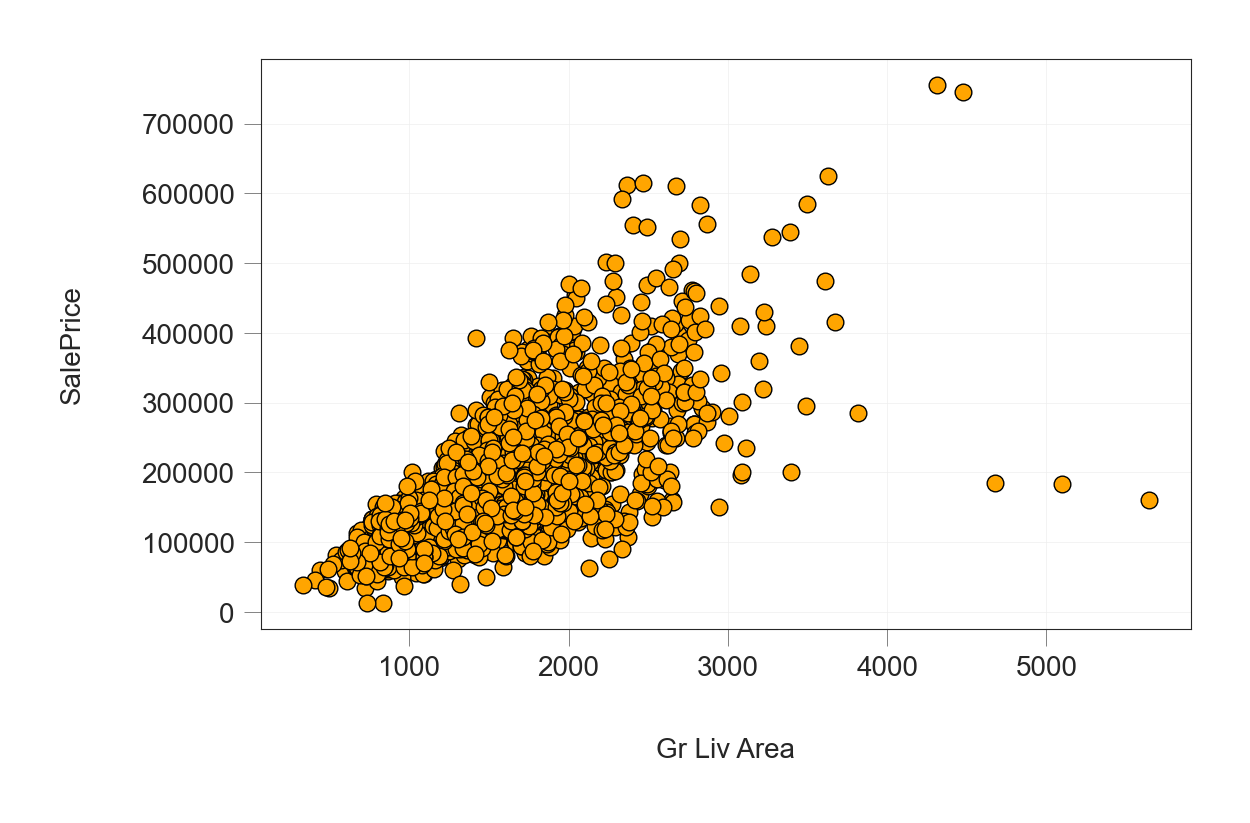

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

Từ điểm dữ liệu ta thấy các điểm dữ liệu trên 4000 có các điểm ngoại lệ. Bây giờ, chúng tôi sẽ xóa chúng khỏi tập dữ liệu của chúng tôi. Chúng tôi có thể làm như vậy bằng cách giữ các điểm dữ liệu có `Gr Liv Area` dưới 4.000. Nhưng trước tiên chúng ta hãy xem các hàng tập dữ liệu tương ứng với các giá trị bất thường này:

In [24]:
outlirt_columns = ["Gr Liv Area"] + \
                  [col for col in dataset.columns if "Sale" in col]
dataset[dataset["Gr Liv Area"] > 4000][outlirt_columns]

Gr Liv Area Sale Type Sale Condition  SalePrice
1498         5642       New        Partial     160000
1760         4476       WD         Abnorml     745000
1767         4316       WD          Normal     755000
2180         5095       New        Partial     183850
2181         4676       New        Partial     184750

Đây là 5 điểm ngoại lệ hơn 4000 và sau đây ta sẽ tiến hành loại bỏ nó

In [25]:
dataset = dataset[dataset["Gr Liv Area"] < 4000]

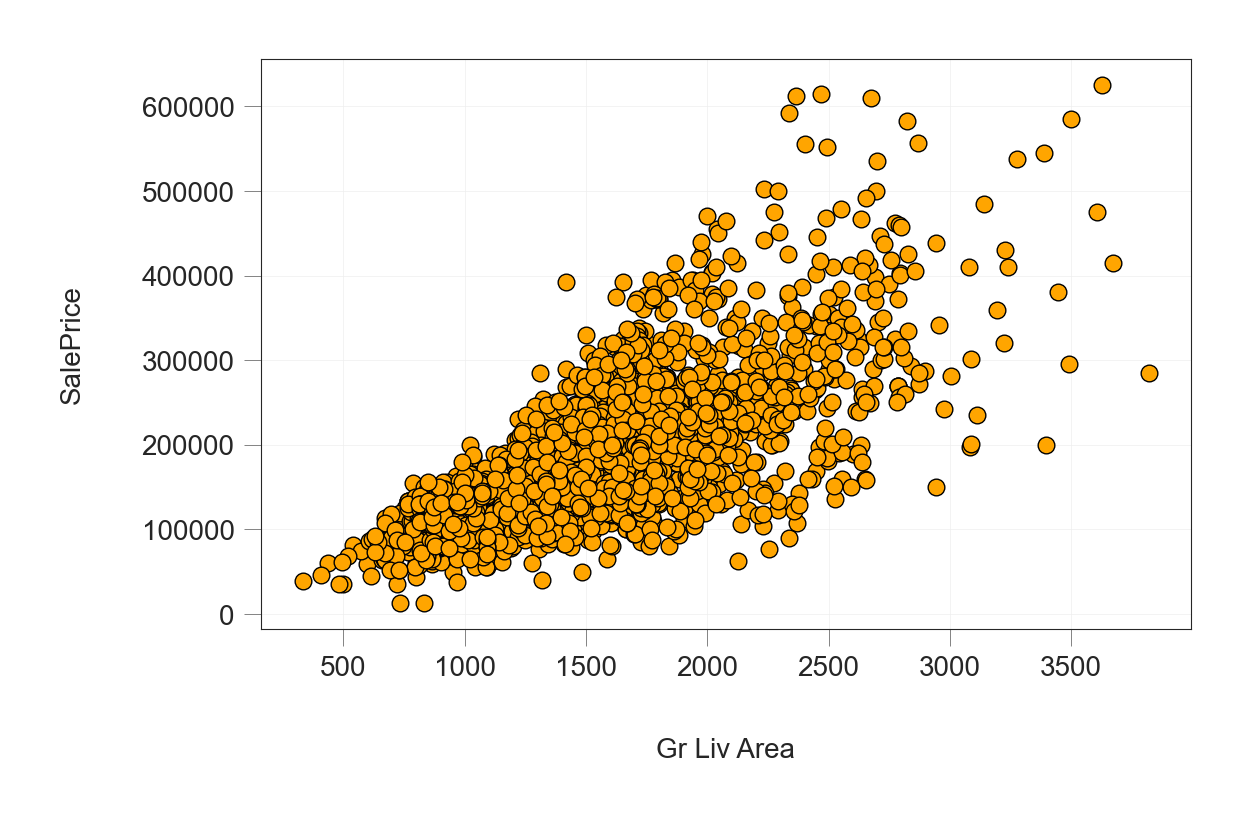

In [26]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

Để tránh các vấn đề trong quá trình lập mô hình sau này, chúng ta sẽ đặt lại chỉ mục tập dữ liệu của mình sau khi xóa các hàng ngoại lệ để không còn khoảng trống trong chỉ mục tập dữ liệu.

In [27]:
dataset.reset_index(drop=True, inplace=True)



## Xóa một số cột không quan trọng

Ở đây có 2 cột cần xóa là `Order` và `PID` bởi nó không tác động đến sự phân tích hay mô hình:

In [28]:
dataset.drop(['Order', 'PID'], axis=1, inplace=True)

<h1 id="eda">Exploratory Data Analysis</h1>



## Phân phối biến mục tiêu

Tập dữ liệu của chúng tôi chứa rất nhiều biến, nhưng biến quan trọng nhất để chúng tôi khám phá là biến mục tiêu. Chúng ta cần hiểu sự phân bố của nó. Đầu tiên, chúng ta bắt đầu bằng việc vẽ biểu đồ violin cho biến mục tiêu. Chiều rộng của violin đại diện cho tần số. Điều này có nghĩa là nếu một cây vĩ cầm có chiều rộng lớn nhất trong khoảng từ 300 đến 400 thì vùng từ 300 đến 400 chứa nhiều điểm dữ liệu hơn các vùng khác:

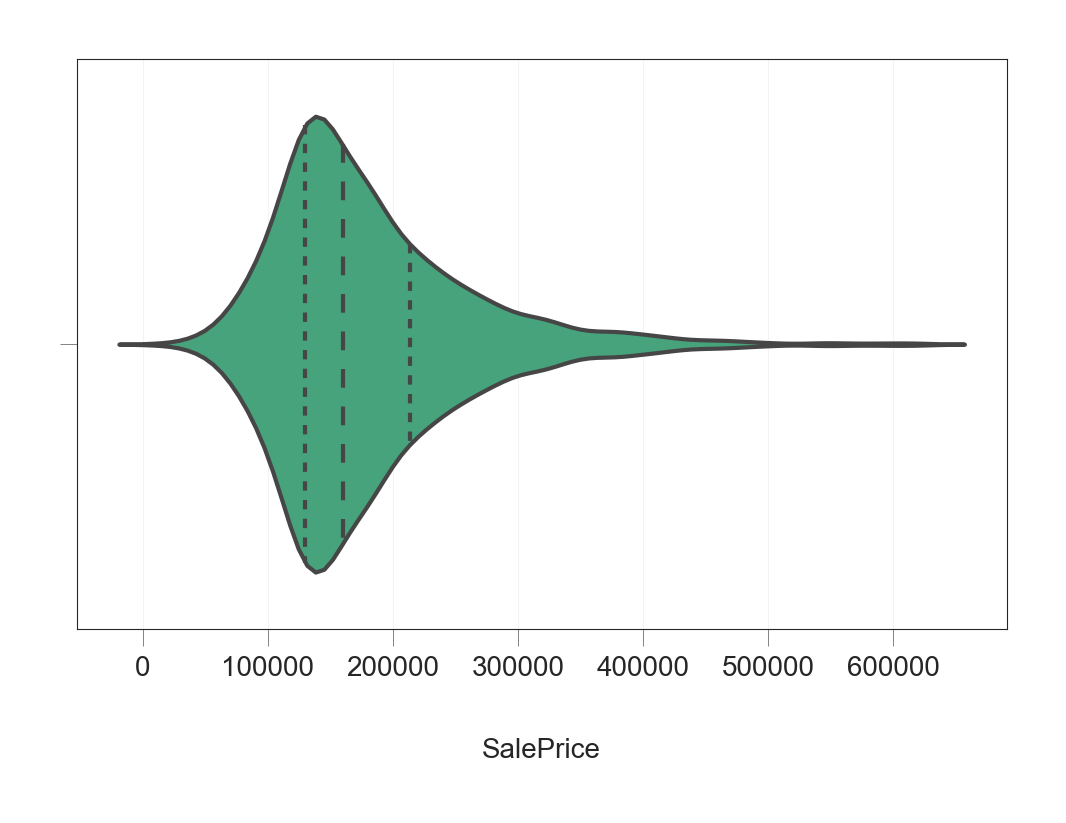

In [29]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

Từ đồ thị, chúng ta có thể thấy hầu hết giá nhà rơi vào khoảng 100.000 đến 250.000. Các đường đứt nét biểu thị vị trí của ba phần tư Q1, Q2 (trung vị) và Q3. Bây giờ hãy xem sơ đồ hình hộp của `SalePrice`:

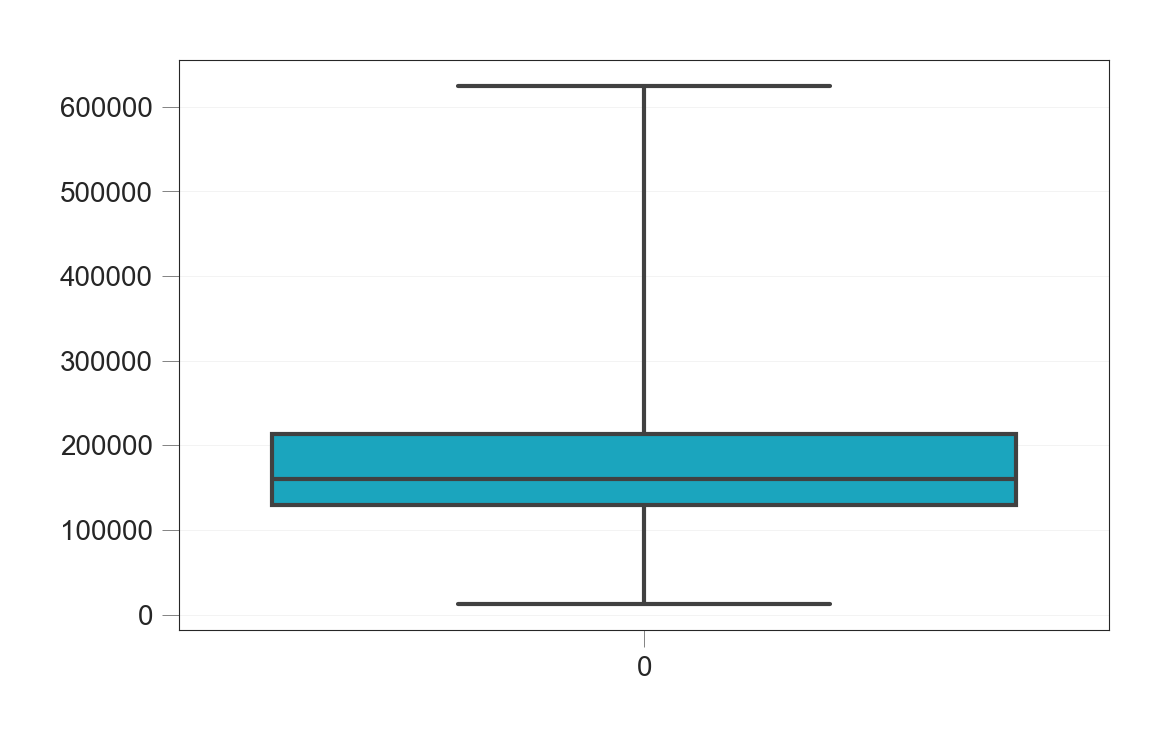

In [30]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

Điều này cho chúng ta thấy giá trị tối thiểu và tối đa của `SalePrice`. Nó cũng cho chúng ta thấy ba phần tư được biểu thị bằng hộp và đường thẳng đứng bên trong nó. Cuối cùng, chúng tôi vẽ biểu đồ của biến để có cái nhìn chi tiết hơn về phân phối:

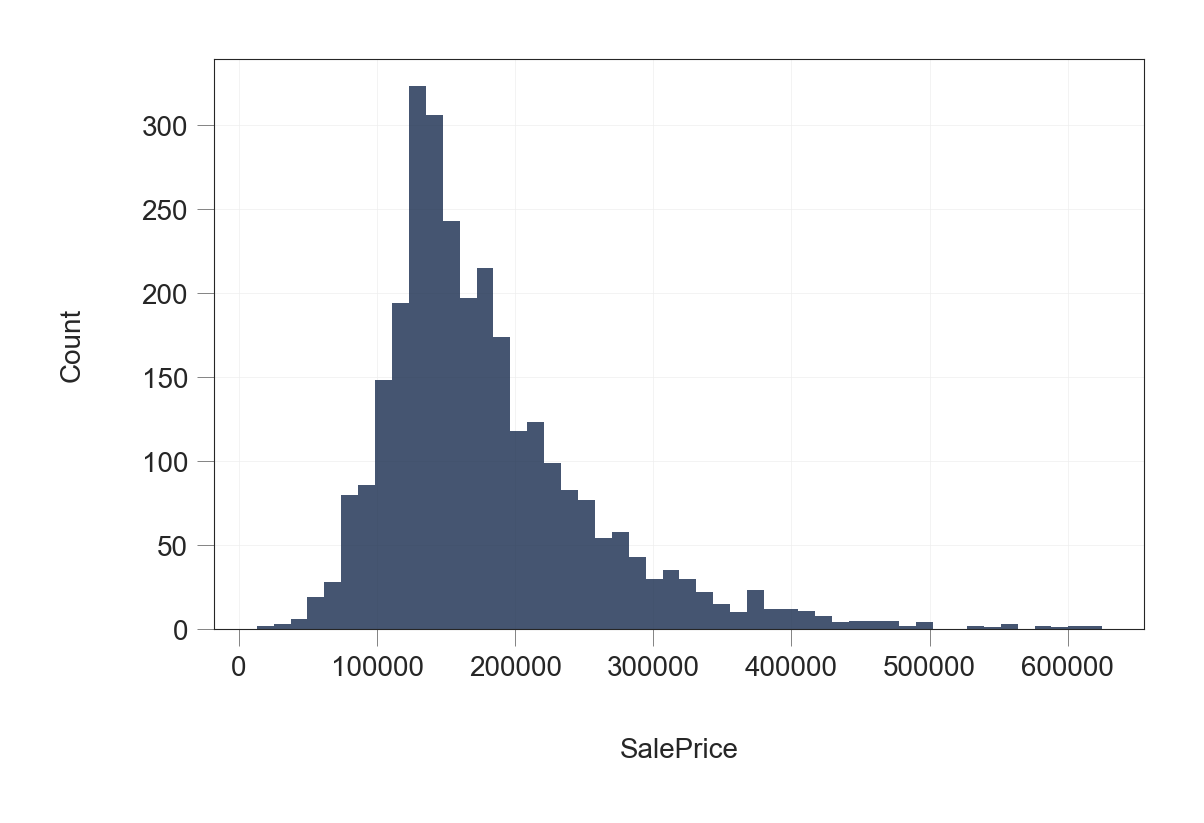

In [31]:
sns.distplot(dataset['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

## Mối tương quan giữa các biến

Chúng tôi muốn xem các biến tập dữ liệu có mối tương quan với nhau như thế nào và các biến dự đoán có mối tương quan với biến mục tiêu như thế nào. 
- Ví dụ: chúng tôi muốn xem `Lot Area` và `SalePrice` có mối tương quan với nhau như thế nào: 
     - Chúng có tăng và giảm cùng nhau không (tương quan dương)? 
     - Cái này tăng thì cái kia giảm hay ngược lại (tương quan âm)? 
     - Hay chúng không tương quan?

Tương quan được biểu thị dưới dạng giá trị giữa -1 và +1 trong đó 
- +1 biểu thị mối tương quan dương cao nhất
- -1 biểu thị mối tương quan âm cao nhất 
-  0 biểu thị rằng không có mối tương quan.

Chúng tôi sẽ hiển thị mối tương quan giữa các biến tập dữ liệu của chúng tôi (chỉ biến số và biến boolean):

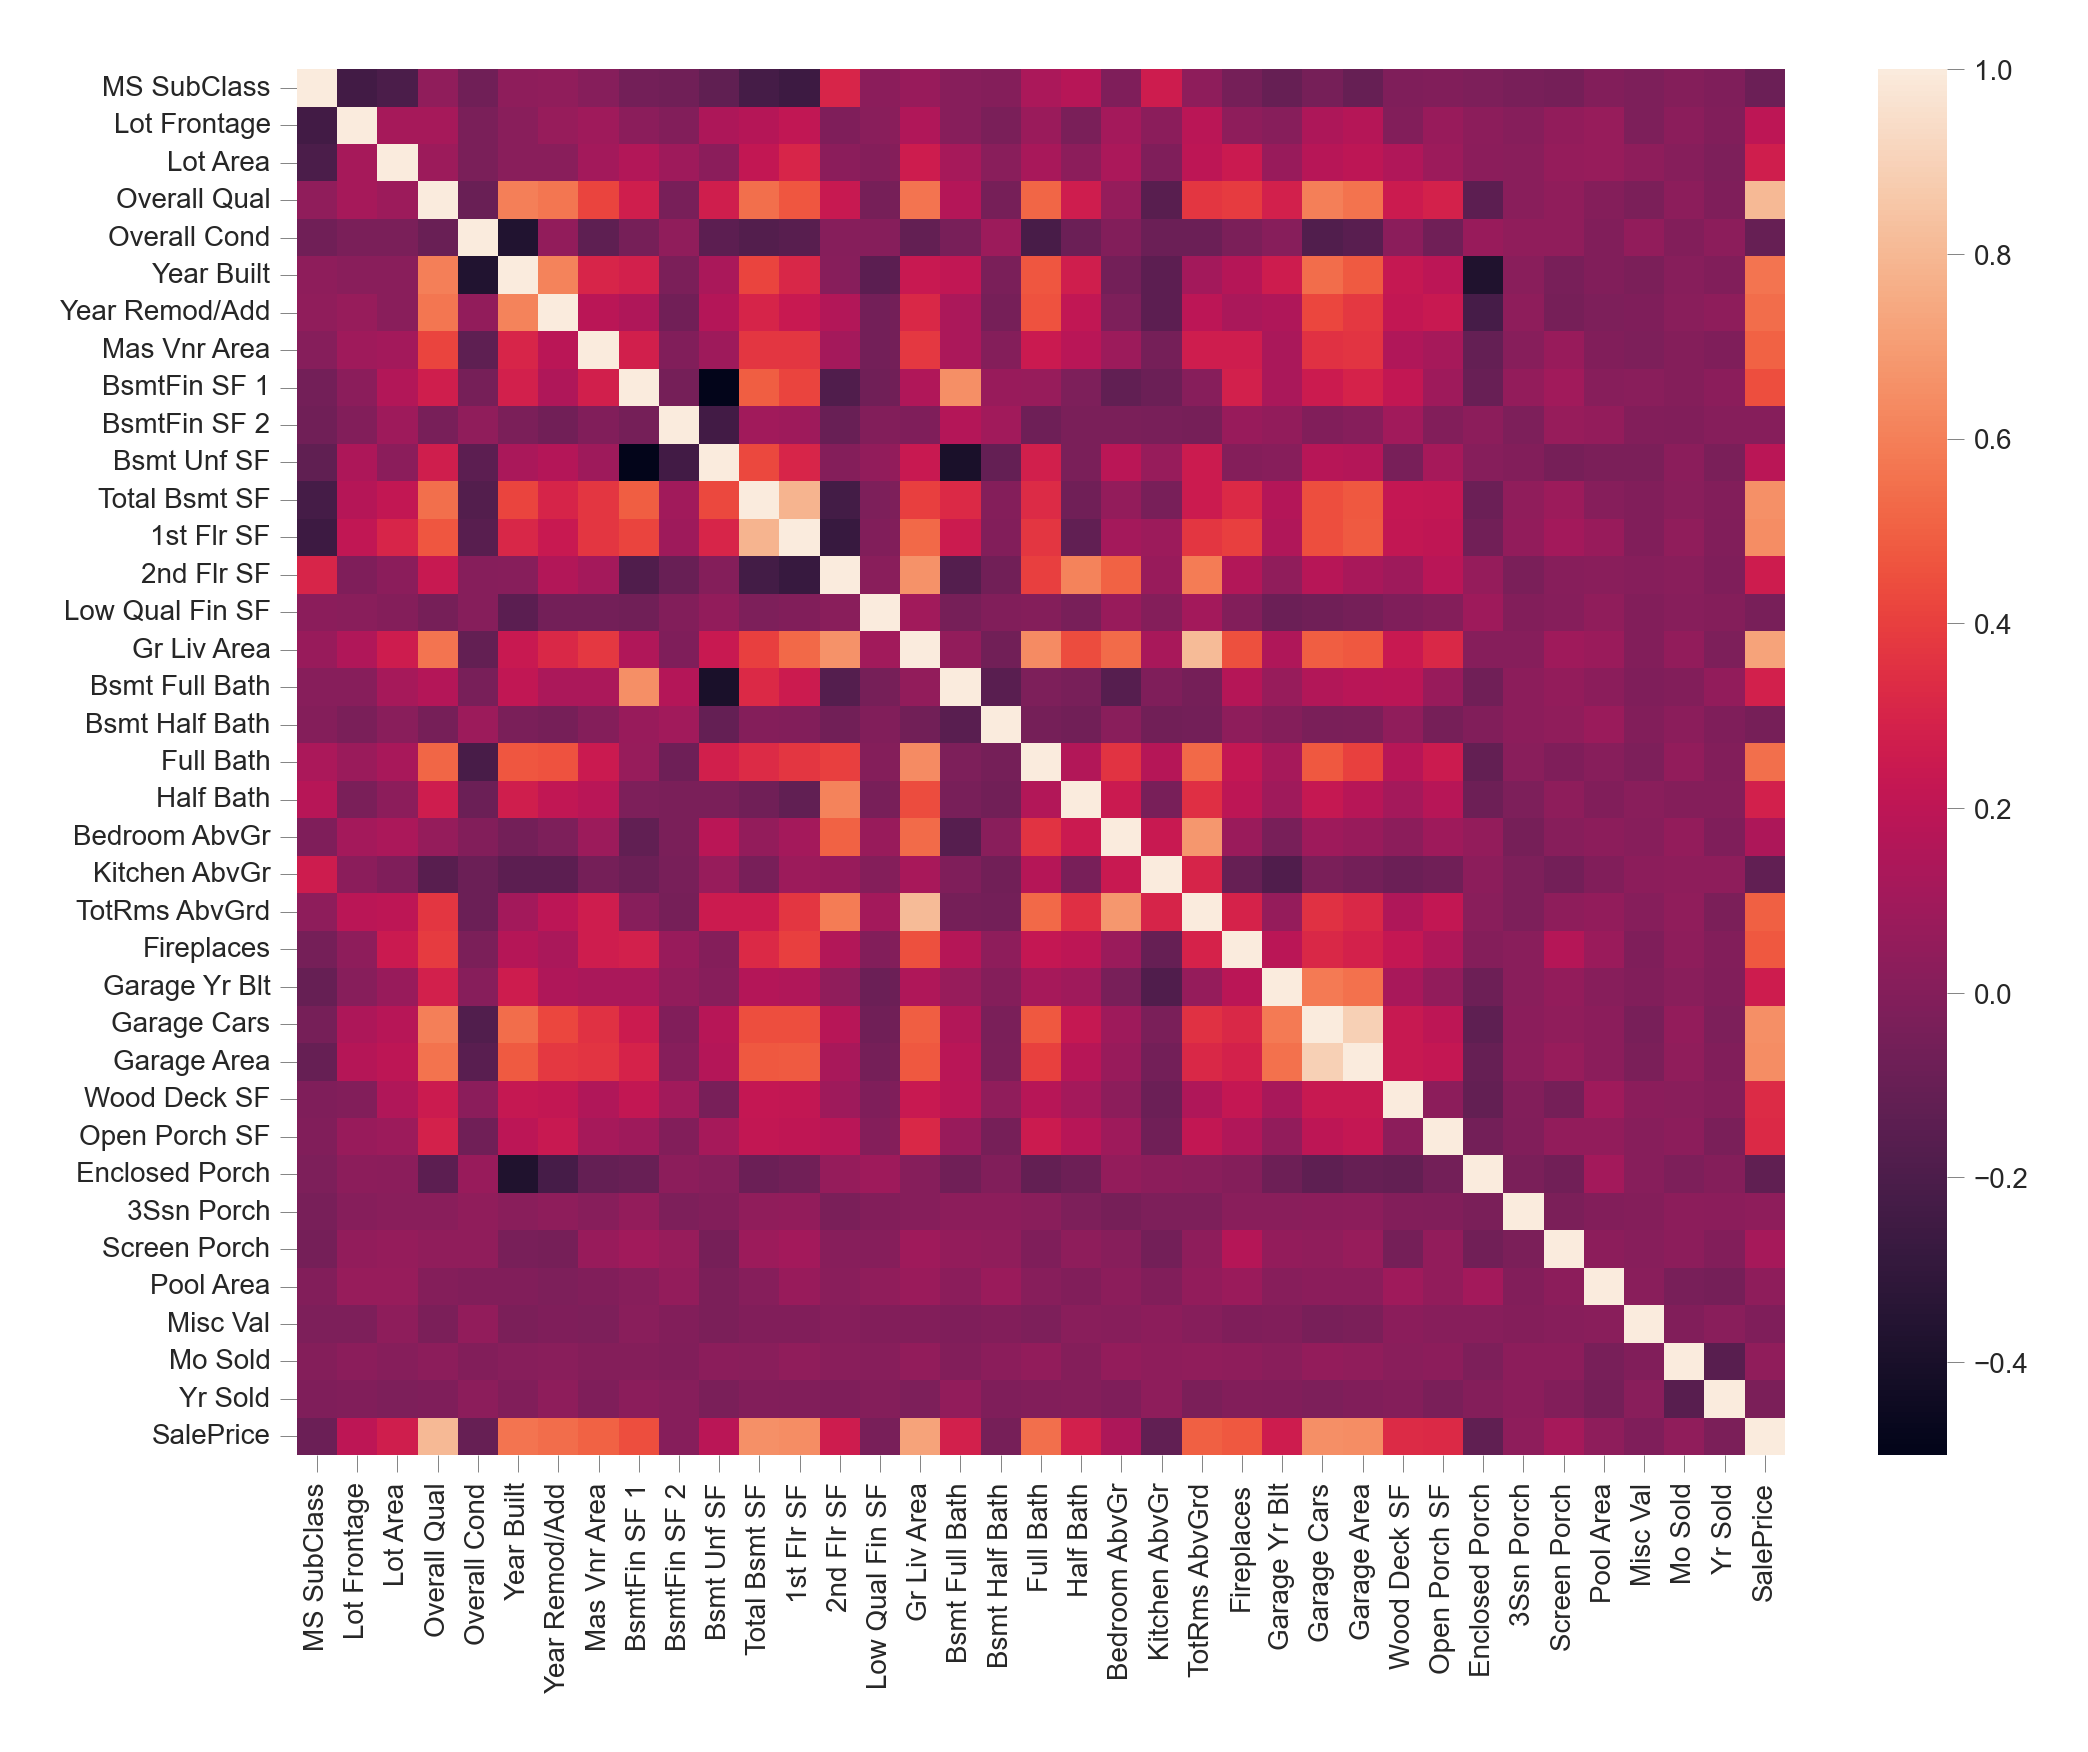

In [32]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(numeric_only=True), ax=ax);

Chúng ta có thể thấy rằng có nhiều biến tương quan trong tập dữ liệu của chúng ta. Chúng tôi nhận thấy `Garage Cars` và `Garage Area` có mối tương quan dương cao, điều này là hợp lý vì khi diện tích gara tăng lên thì sức chứa ô tô cũng tăng theo. Chúng tôi cũng thấy rằng `Gr Liv Area` và `TotRms AbvGrd` có mối tương quan thuận chiều cao, điều này cũng có ý nghĩa vì khi diện tích sống trên mặt đất tăng lên, dự kiến số phòng trên mặt đất cũng sẽ tăng lên. 

Về tương quan nghịch, chúng ta có thể thấy rằng `Bsmt Unf SF` có tương quan nghịch với `BsmtFin SF 1` và điều đó hợp lý vì khi chúng ta có nhiều diện tích chưa hoàn thiện hơn, điều này có nghĩa là chúng ta có ít diện tích hoàn thiện hơn. Chúng tôi cũng lưu ý rằng `Bsmt Unf SF` có tương quan nghịch với `Bsmt Full Bath`, điều này cũng hợp lý.

Quan trọng nhất, ta hãy xem xét các biến dự đoán có tương quan với biến mục tiêu (`SalePrice`). Bằng cách nhìn vào hàng cuối cùng của bản đồ nhiệt, chúng tôi thấy rằng biến mục tiêu có mối tương quan thuận chiều cao với `Overall Qual` và `Gr Liv Area`. Chúng tôi cũng thấy rằng biến mục tiêu có mối tương quan thuận với `Year Built`, `Year Remod/Add`, `Khu vực Mas Vnr`, `Tổng Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars` và `Garage Area`.


### Mối quan hệ giữa biến mục tiêu và các biến khác

#### Tương quan dương cao

Đầu tiên, chúng tôi muốn hình dung mối quan hệ giữa biến mục tiêu và các biến có mối tương quan cao và tích cực với nó, theo những gì chúng tôi thấy trong bản đồ nhiệt. Cụ thể, các biến này là `Overall Qual` và `Gr Liv Area`. Chúng ta bắt đầu với mối quan hệ giữa biến mục tiêu và `Overall Qual`, nhưng trước đó, hãy xem sự phân bổ của từng biến đó. Hãy bắt đầu với biến mục tiêu `SalePrice`:

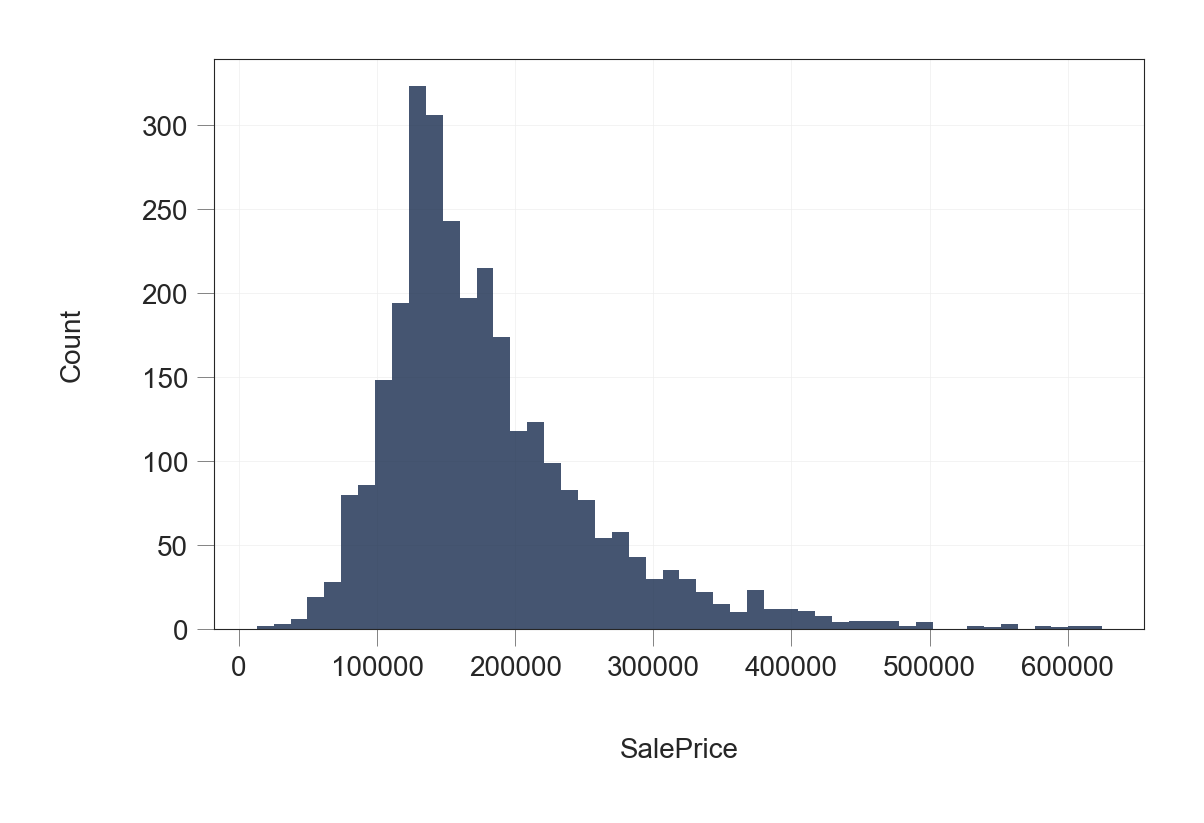

In [33]:
sns.distplot(dataset['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

Chúng ta có thể thấy rằng hầu hết giá nhà rơi vào khoảng từ 100.000 đến 200.000. Chúng tôi cũng thấy rằng có một số ngôi nhà đắt tiền ở bên phải khu đất. Bây giờ, chúng ta chuyển sang xem sự phân bố của biến `Overall Qual`:

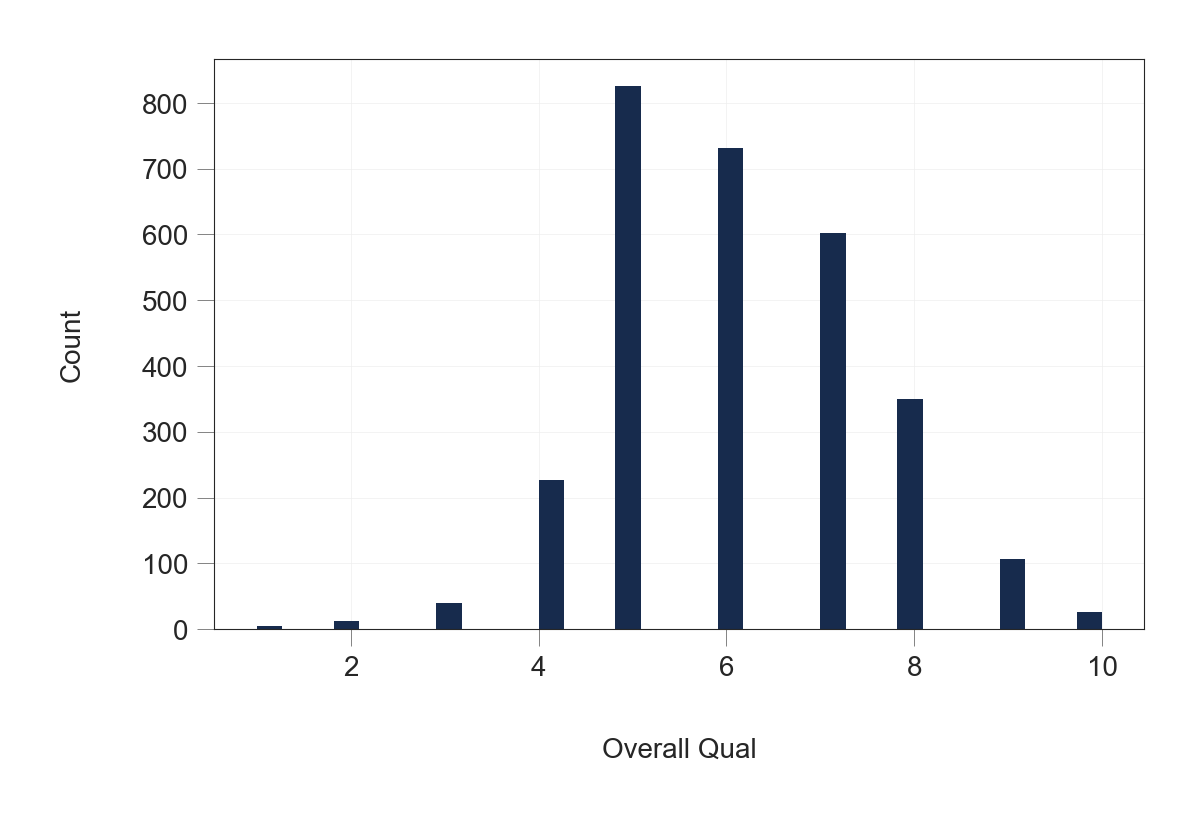

In [34]:
sns.distplot(dataset['Overall Qual'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");

Chúng tôi thấy rằng `Overall Qual` nhận giá trị số nguyên từ 1 đến 10 và hầu hết các ngôi nhà đều có chất lượng tổng thể từ 5 đến 7. Bây giờ, chúng tôi vẽ đồ thị phân tán của `SalePrice` và `Overall Qual` để xem mối quan hệ giữa chúng :

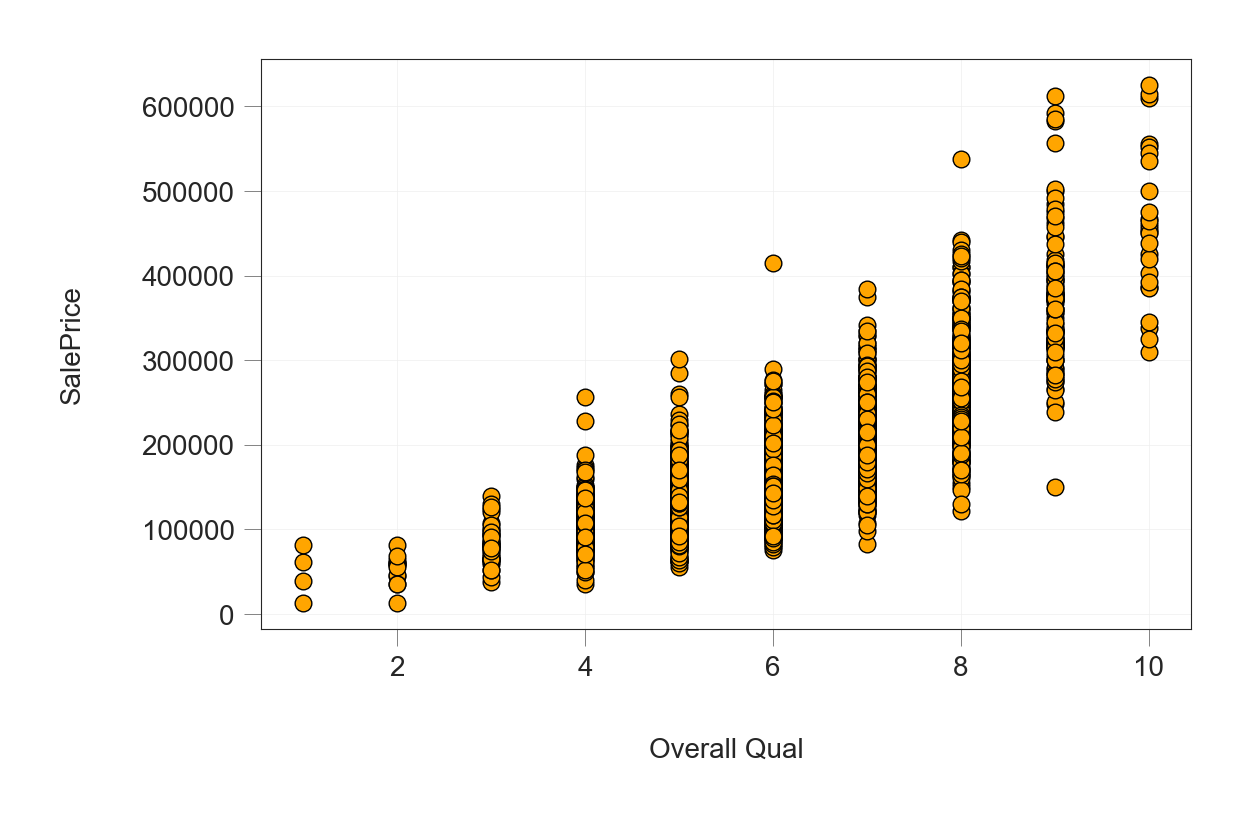

In [35]:
plt.scatter(x=dataset['Overall Qual'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

Chúng ta có thể thấy rằng chúng thực sự có mối tương quan tích cực; nhìn chung, khi chất lượng tổng thể tăng lên thì giá bán cũng tăng theo. Điều này xác minh những gì chúng tôi nhận được từ bản đồ nhiệt ở trên.

Bây giờ, chúng ta muốn xem mối quan hệ giữa biến mục tiêu và biến `Gr Liv Area` đại diện cho khu vực sinh sống trên mặt đất. Trước tiên chúng ta hãy xem sự phân bố của `Gr Liv Area`:

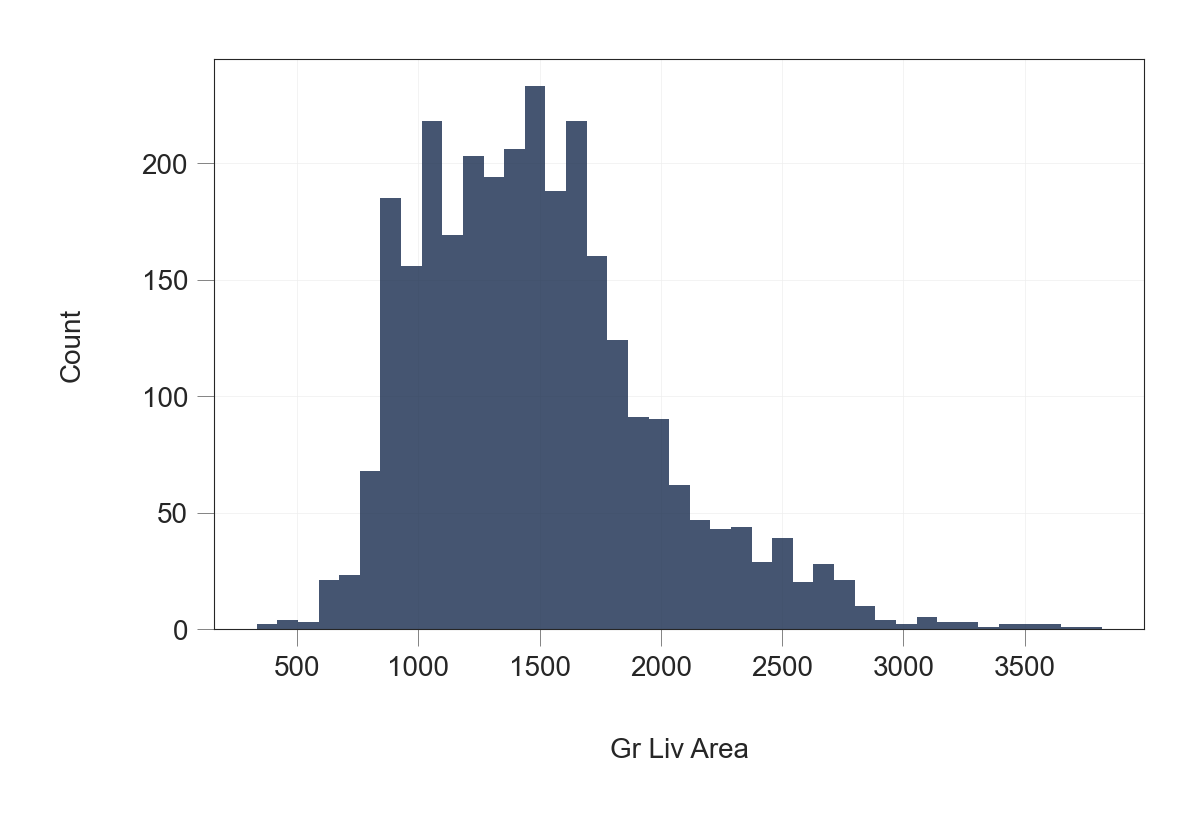

In [36]:
sns.distplot(dataset['Gr Liv Area'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

Chúng ta có thể thấy rằng khu vực sinh sống trên mặt đất rơi vào khoảng từ 800 đến 1800 ft<sup>2</sup>. Bây giờ, chúng ta hãy xem mối quan hệ giữa `Gr Liv Area` và biến mục tiêu:

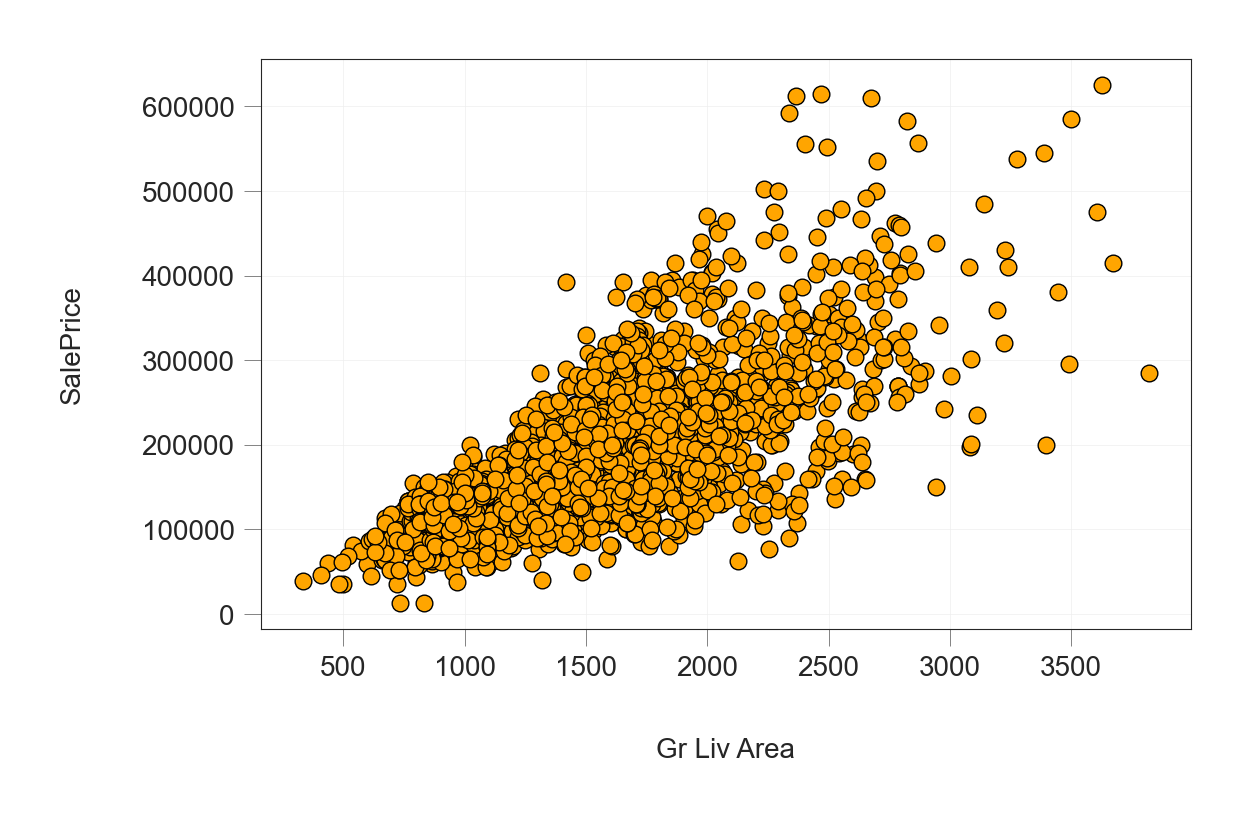

In [37]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

Biểu đồ phân tán ở trên cho thấy rõ ràng mối tương quan tích cực mạnh mẽ giữa `Gr Liv Area` và `SalePrice` xác minh những gì chúng tôi tìm thấy bằng bản đồ nhiệt.

#### Tương quan dương vừa phải

Tiếp theo, chúng ta muốn hình dung mối quan hệ giữa biến mục tiêu và các biến có mối tương quan thuận với nó, nhưng mối tương quan không mạnh lắm. Cụ thể, các biến này là `Năm xây dựng`, `Năm sửa đổi/Thêm`, `Khu vực Mas Vnr`, `Tổng Bsmt SF`, `1st Flr SF`, `Tắm đầy đủ`, `Garage Cars` và `Garage Area` . Chúng tôi bắt đầu với bốn điều đầu tiên. Chúng ta hãy xem sự phân phối của từng người trong số họ:

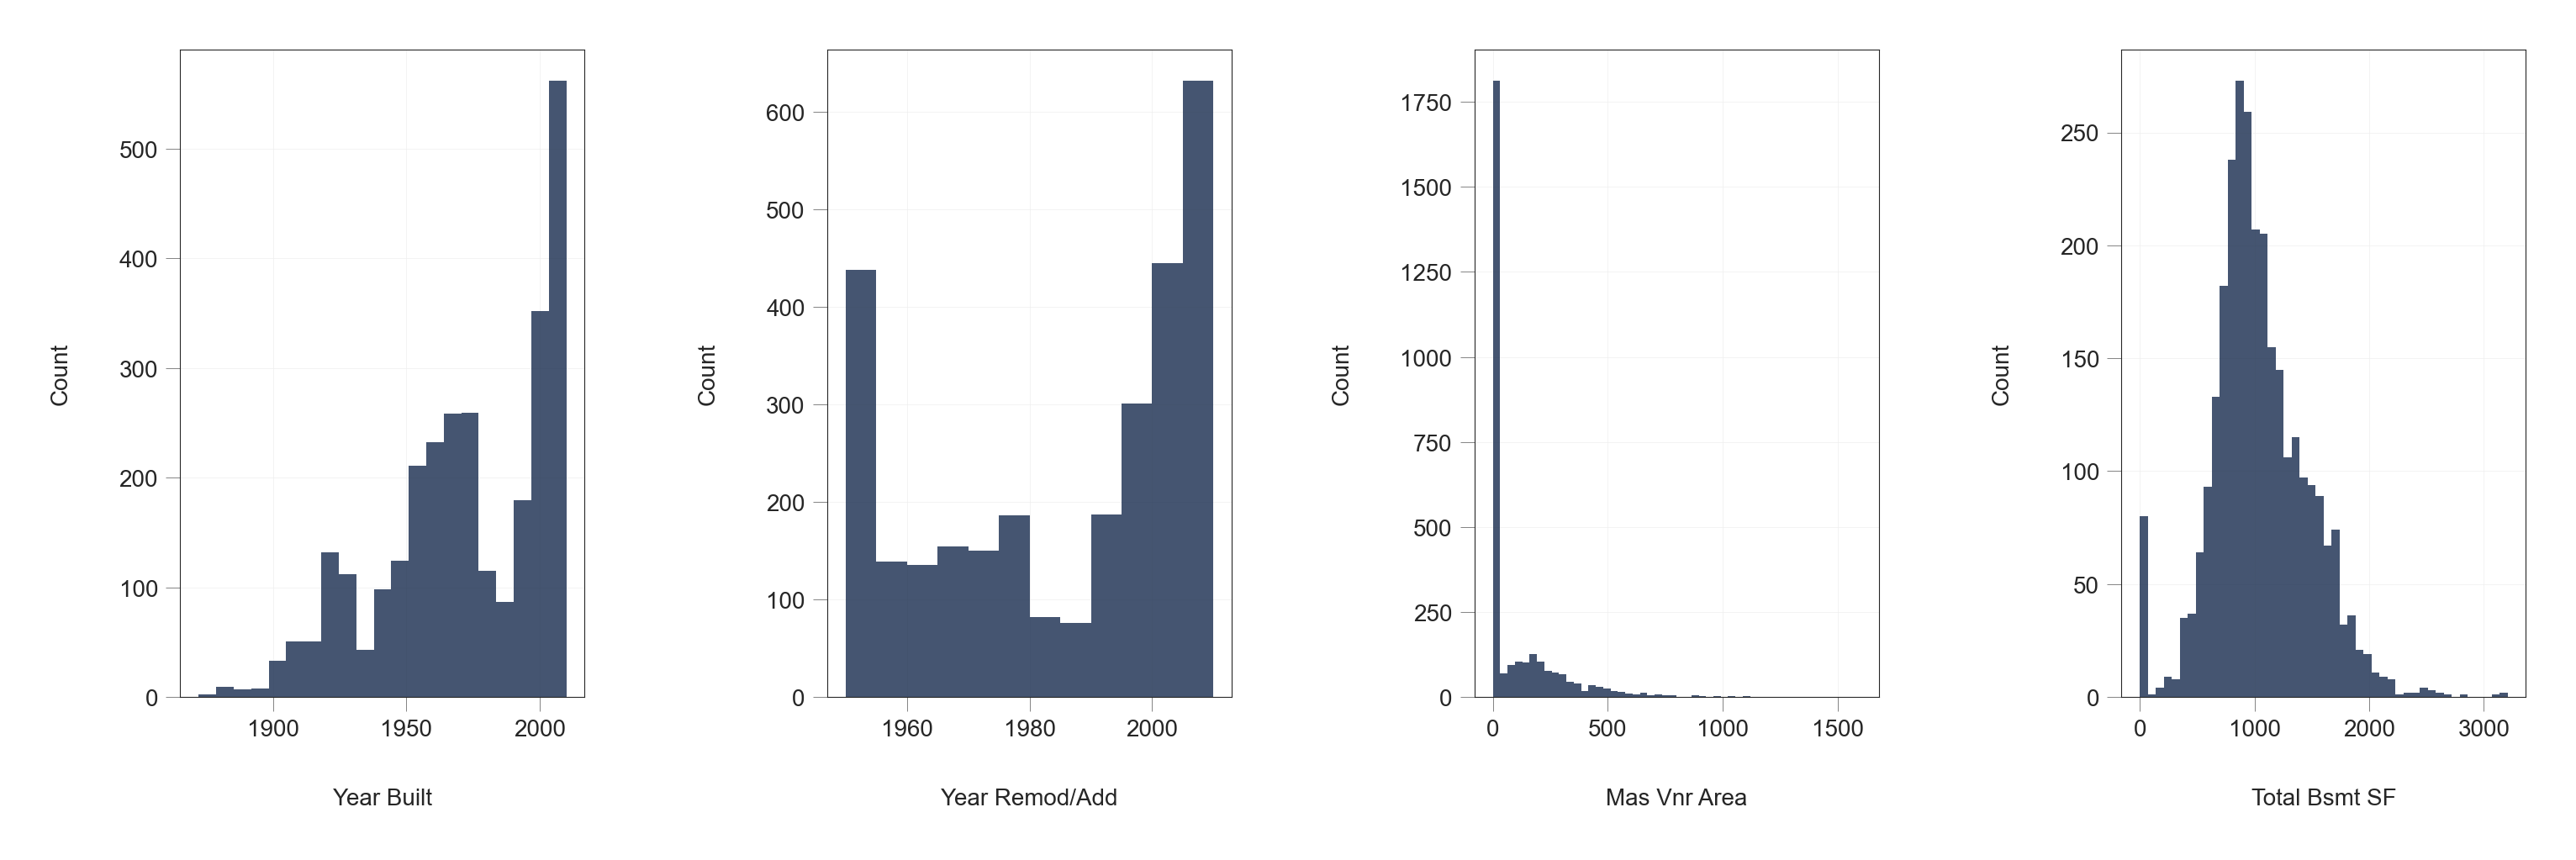

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Year Built", "Year Remod/Add", 
                             "Mas Vnr Area", "Total Bsmt SF"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

Bây giờ chúng ta hãy xem mối quan hệ của chúng với biến mục tiêu bằng cách sử dụng biểu đồ phân tán:

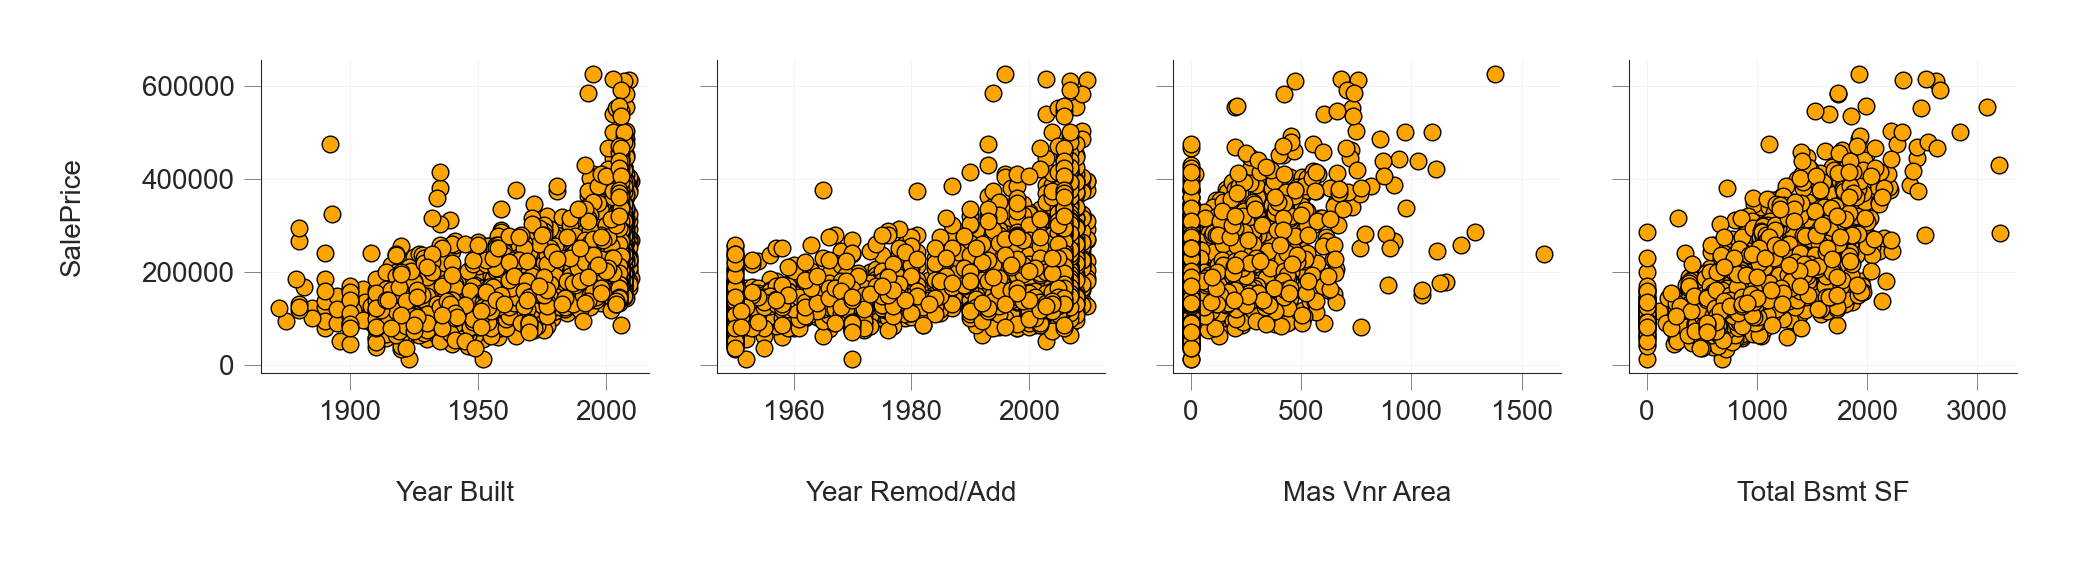

In [39]:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

Tiếp theo, chúng tôi chuyển sang bốn phần cuối cùng. Chúng ta hãy xem sự phân phối của từng người trong số họ:

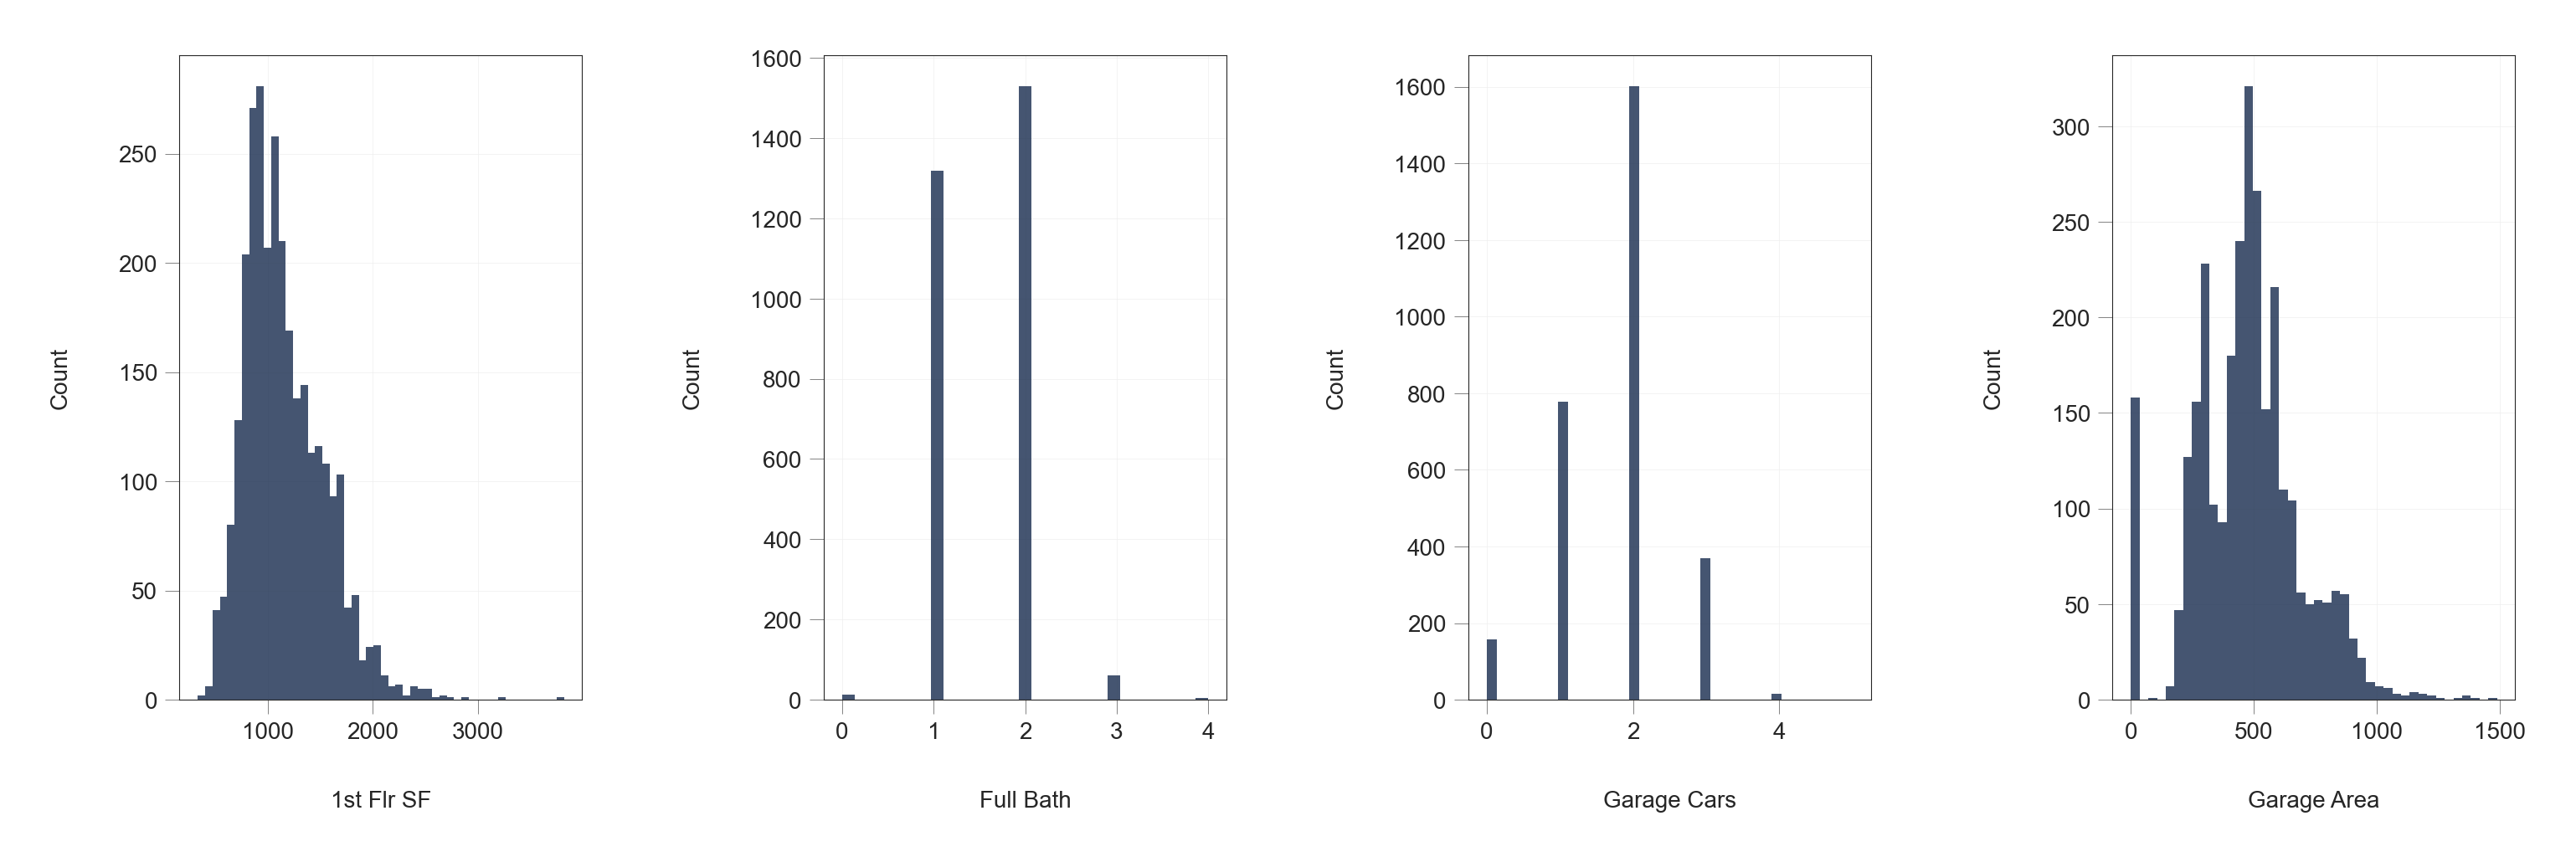

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1st Flr SF", "Full Bath", 
                             "Garage Cars", "Garage Area"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");

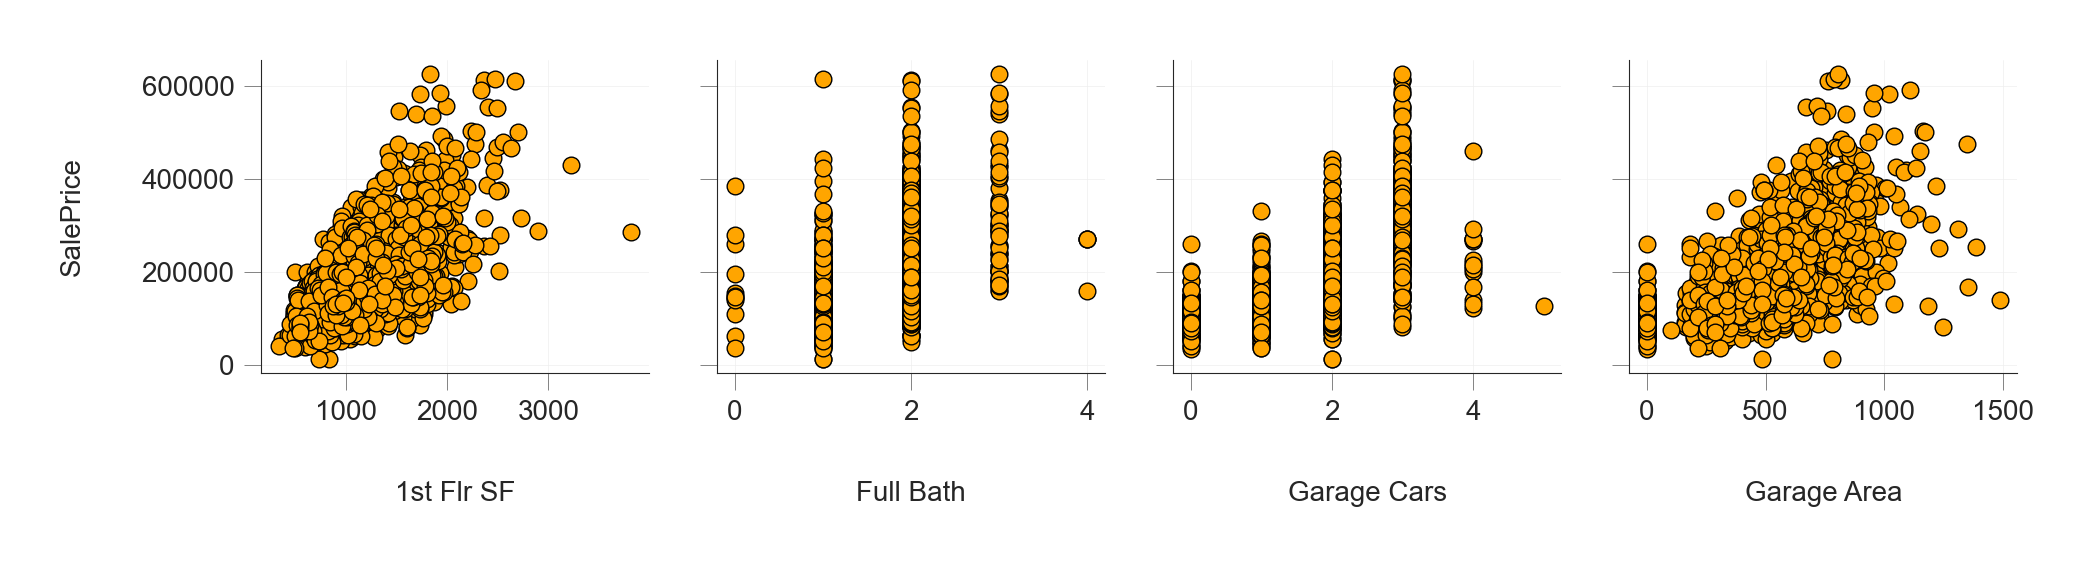

In [41]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

Từ đồ thị trên, chúng ta có thể thấy rằng tám biến này thực sự có mối tương quan thuận với biến mục tiêu. Tuy nhiên, rõ ràng là chúng không có mối tương quan cao như `Chất lượng tổng thể` và `Gr Liv Area`.

### Mối quan hệ giữa các biến dự đoán

#### Tương quan dương

Ngoài biến mục tiêu, khi vẽ sơ đồ nhiệt, chúng tôi đã phát hiện ra mối tương quan tích cực cao giữa `Garage Cars` và `Garage Area` cũng như giữa `Gr Liv Area` và `TotRms AbvGrd`. Chúng tôi cũng muốn hình dung những mối tương quan này. Chúng ta đã thấy sự phân bố của từng loại ngoại trừ `TotRms AbvGrd`. Trước tiên chúng ta hãy xem sự phân bố của `TotRms AbvGrd`:

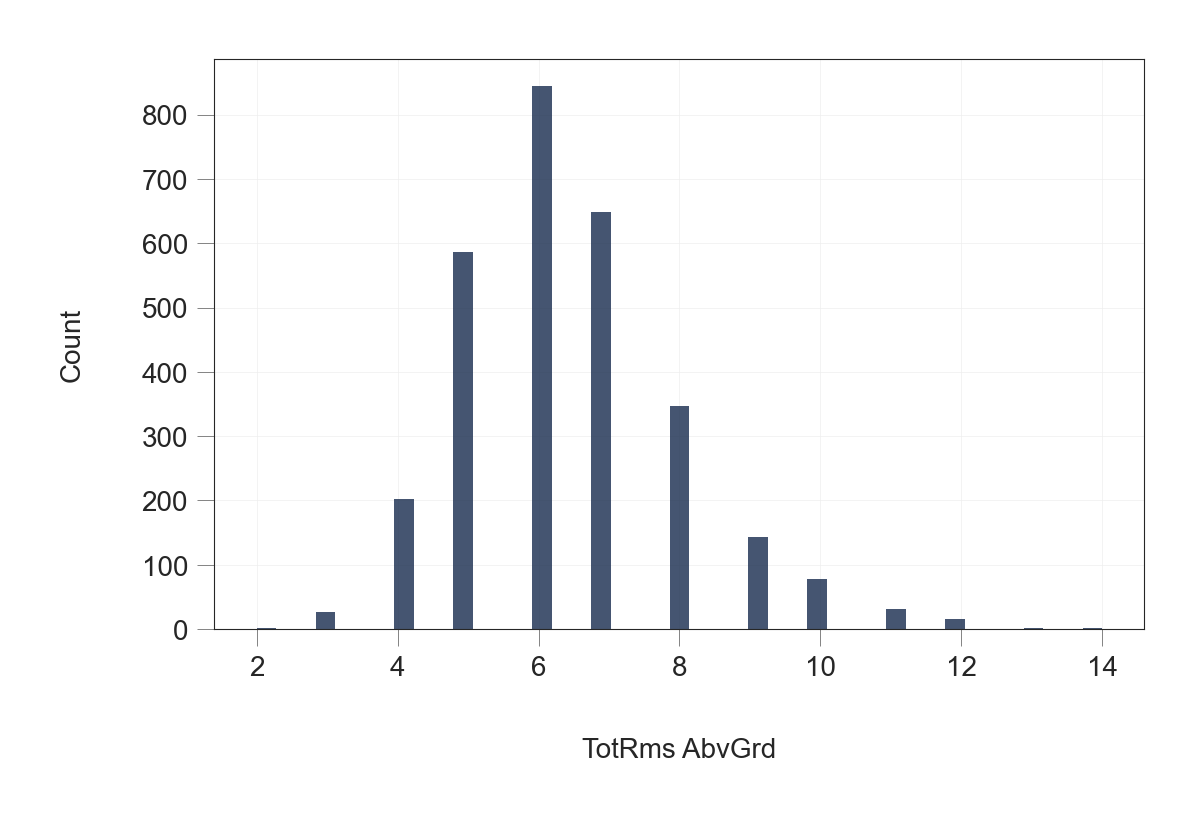

In [42]:
sns.distplot(dataset['TotRms AbvGrd'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

Bây giờ, chúng ta hình dung mối quan hệ giữa `Garage Cars` và `Garage Area` và giữa `Gr Liv Area` và `TotRms AbvGrd`:

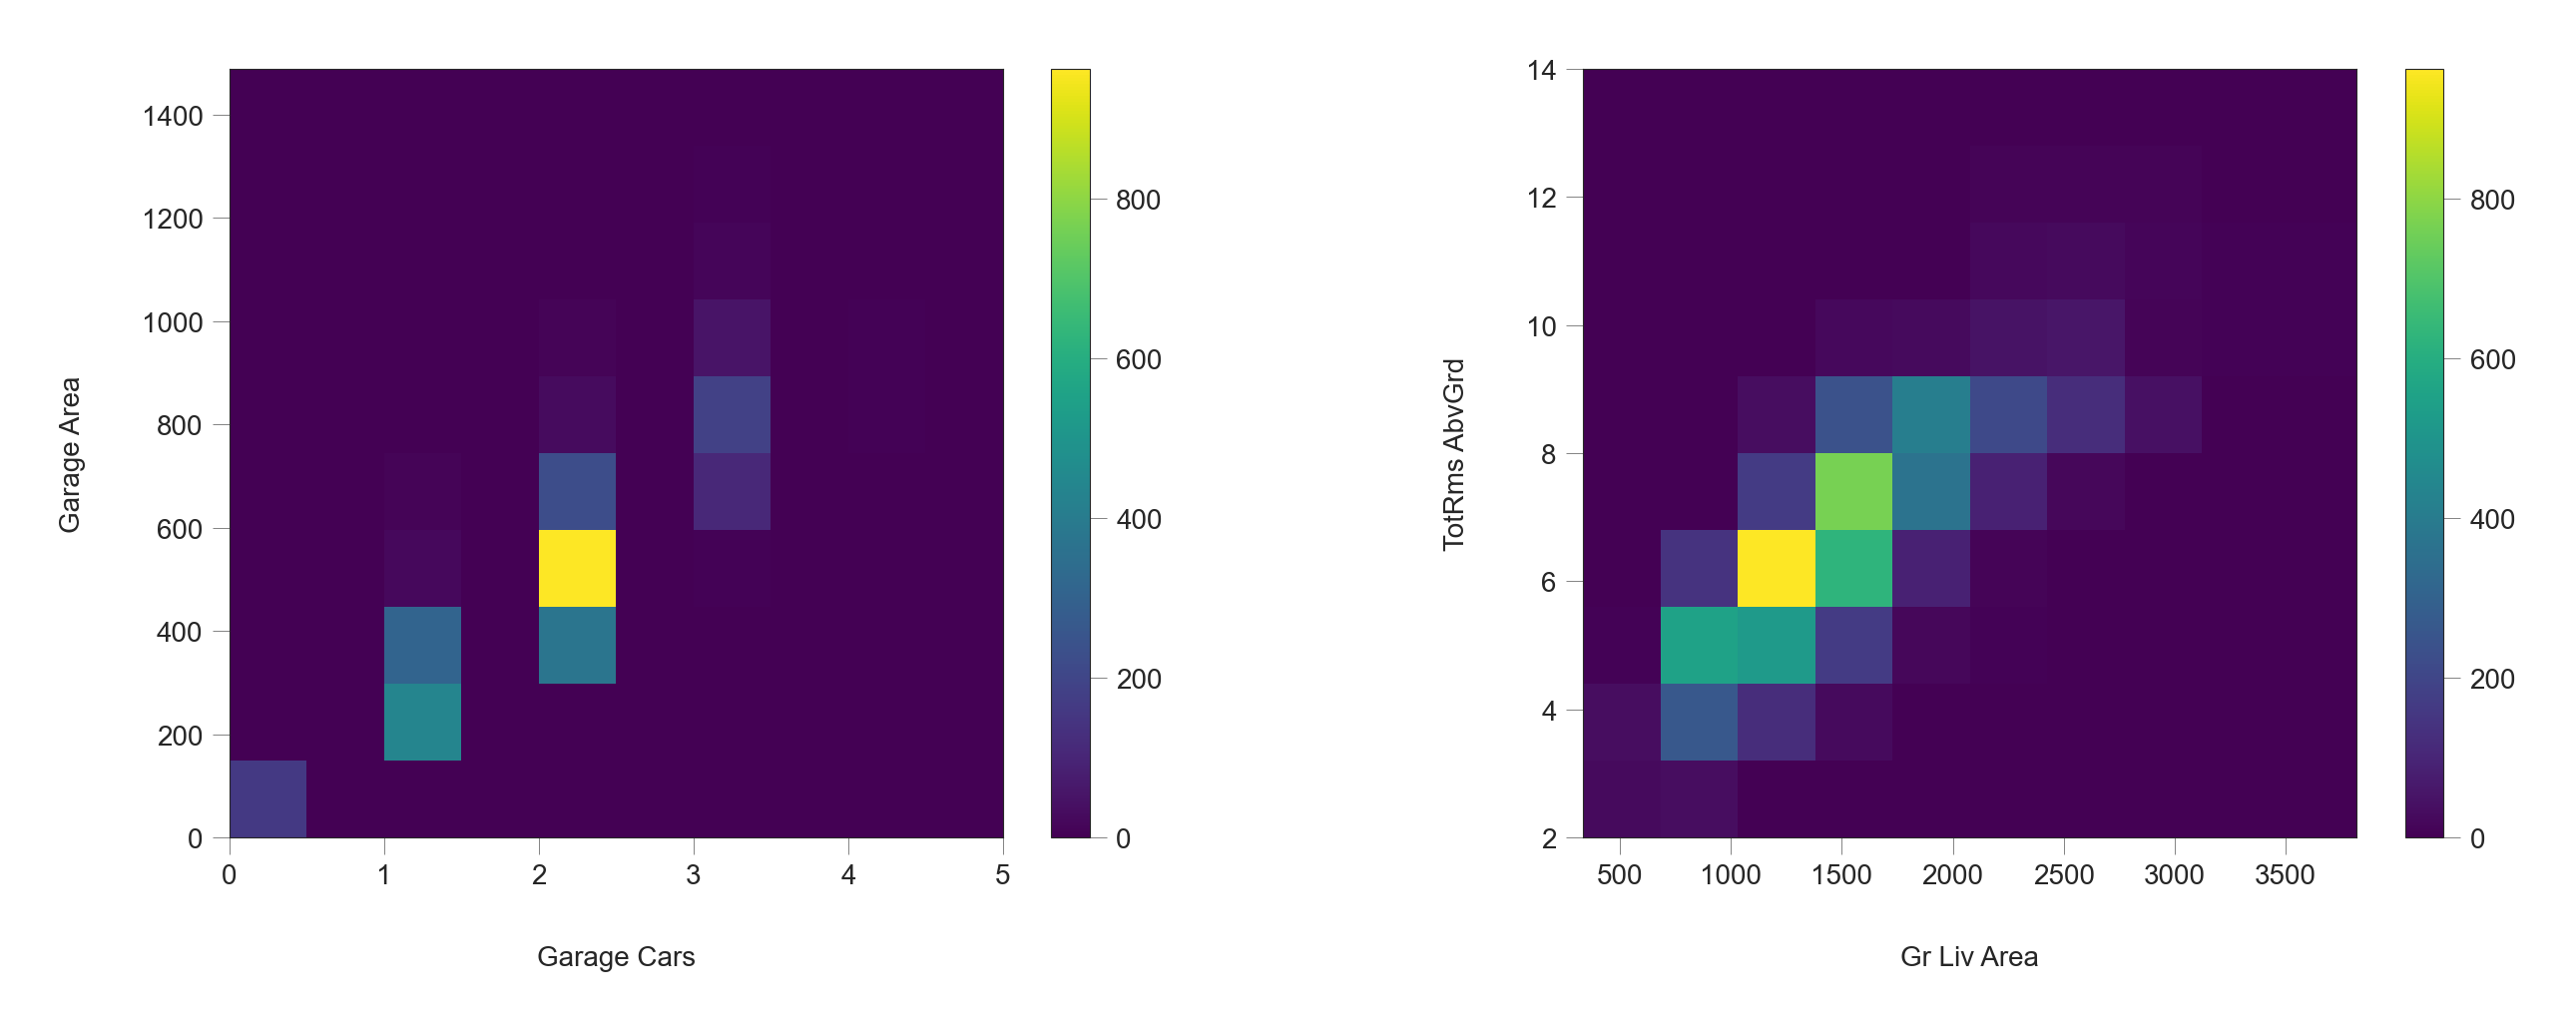

In [43]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Garage Cars"], 
                    dataset["Garage Area"],
                    cmap="viridis");
axes[0].set(xlabel="Garage Cars", ylabel="Garage Area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"], 
                    dataset["TotRms AbvGrd"],
                    cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="TotRms AbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

Chúng ta có thể thấy mối tương quan chặt chẽ giữa mỗi cặp. 
- Đối với `Garage Cars` và `Garage Area`, 
  - Chúng ta thấy rằng dữ liệu tập trung cao nhất khi `Garage Cars` là 2 và `Garage Area` nằm trong khoảng từ 450 đến 600 ft<sup>2</sup>. 
- Đối với `Gr Liv Area` và `TotRms AbvGrd`,
  - Chúng tôi nhận thấy rằng mức độ tập trung cao nhất là khi `Garage Liv Area` nằm trong khoảng từ 800 đến 2000 ft<sup>2</sup> và `TotRms AbvGrd` là 6.

#### Tương quan âm

Khi vẽ sơ đồ nhiệt, chúng tôi cũng phát hiện ra mối tương quan nghịch đáng kể giữa `Bsmt Unf SF` và `BsmtFin SF 1`, cũng như giữa `Bsmt Unf SF` và `Bsmt Full Bath`. Trước tiên chúng ta hãy xem sự phân phối của các biến này:

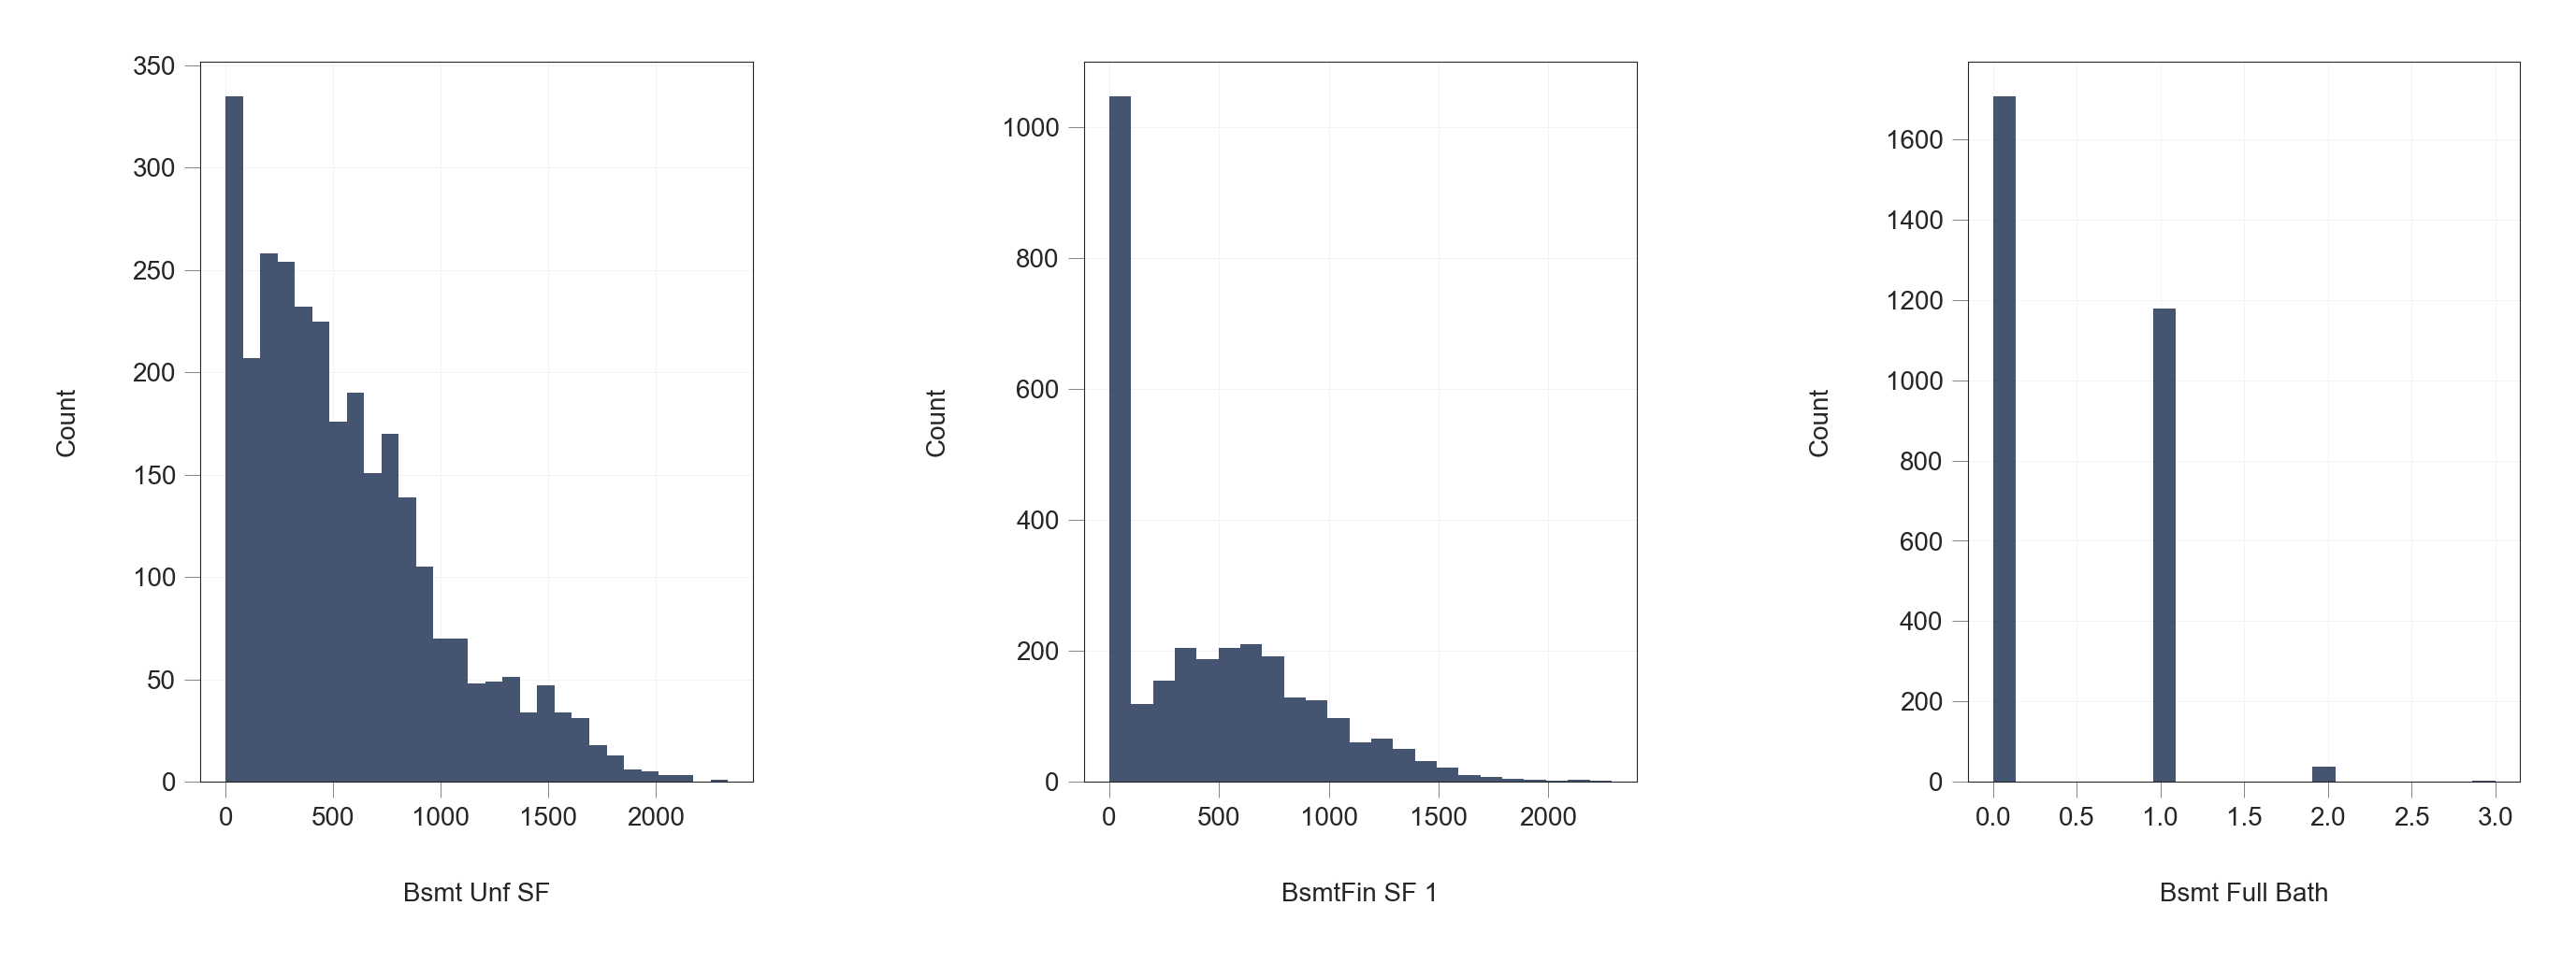

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Bsmt Unf SF", "BsmtFin SF 1", "Bsmt Full Bath"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

Bây giờ, chúng ta hình dung mối quan hệ giữa mỗi cặp bằng cách sử dụng biểu đồ phân tán:

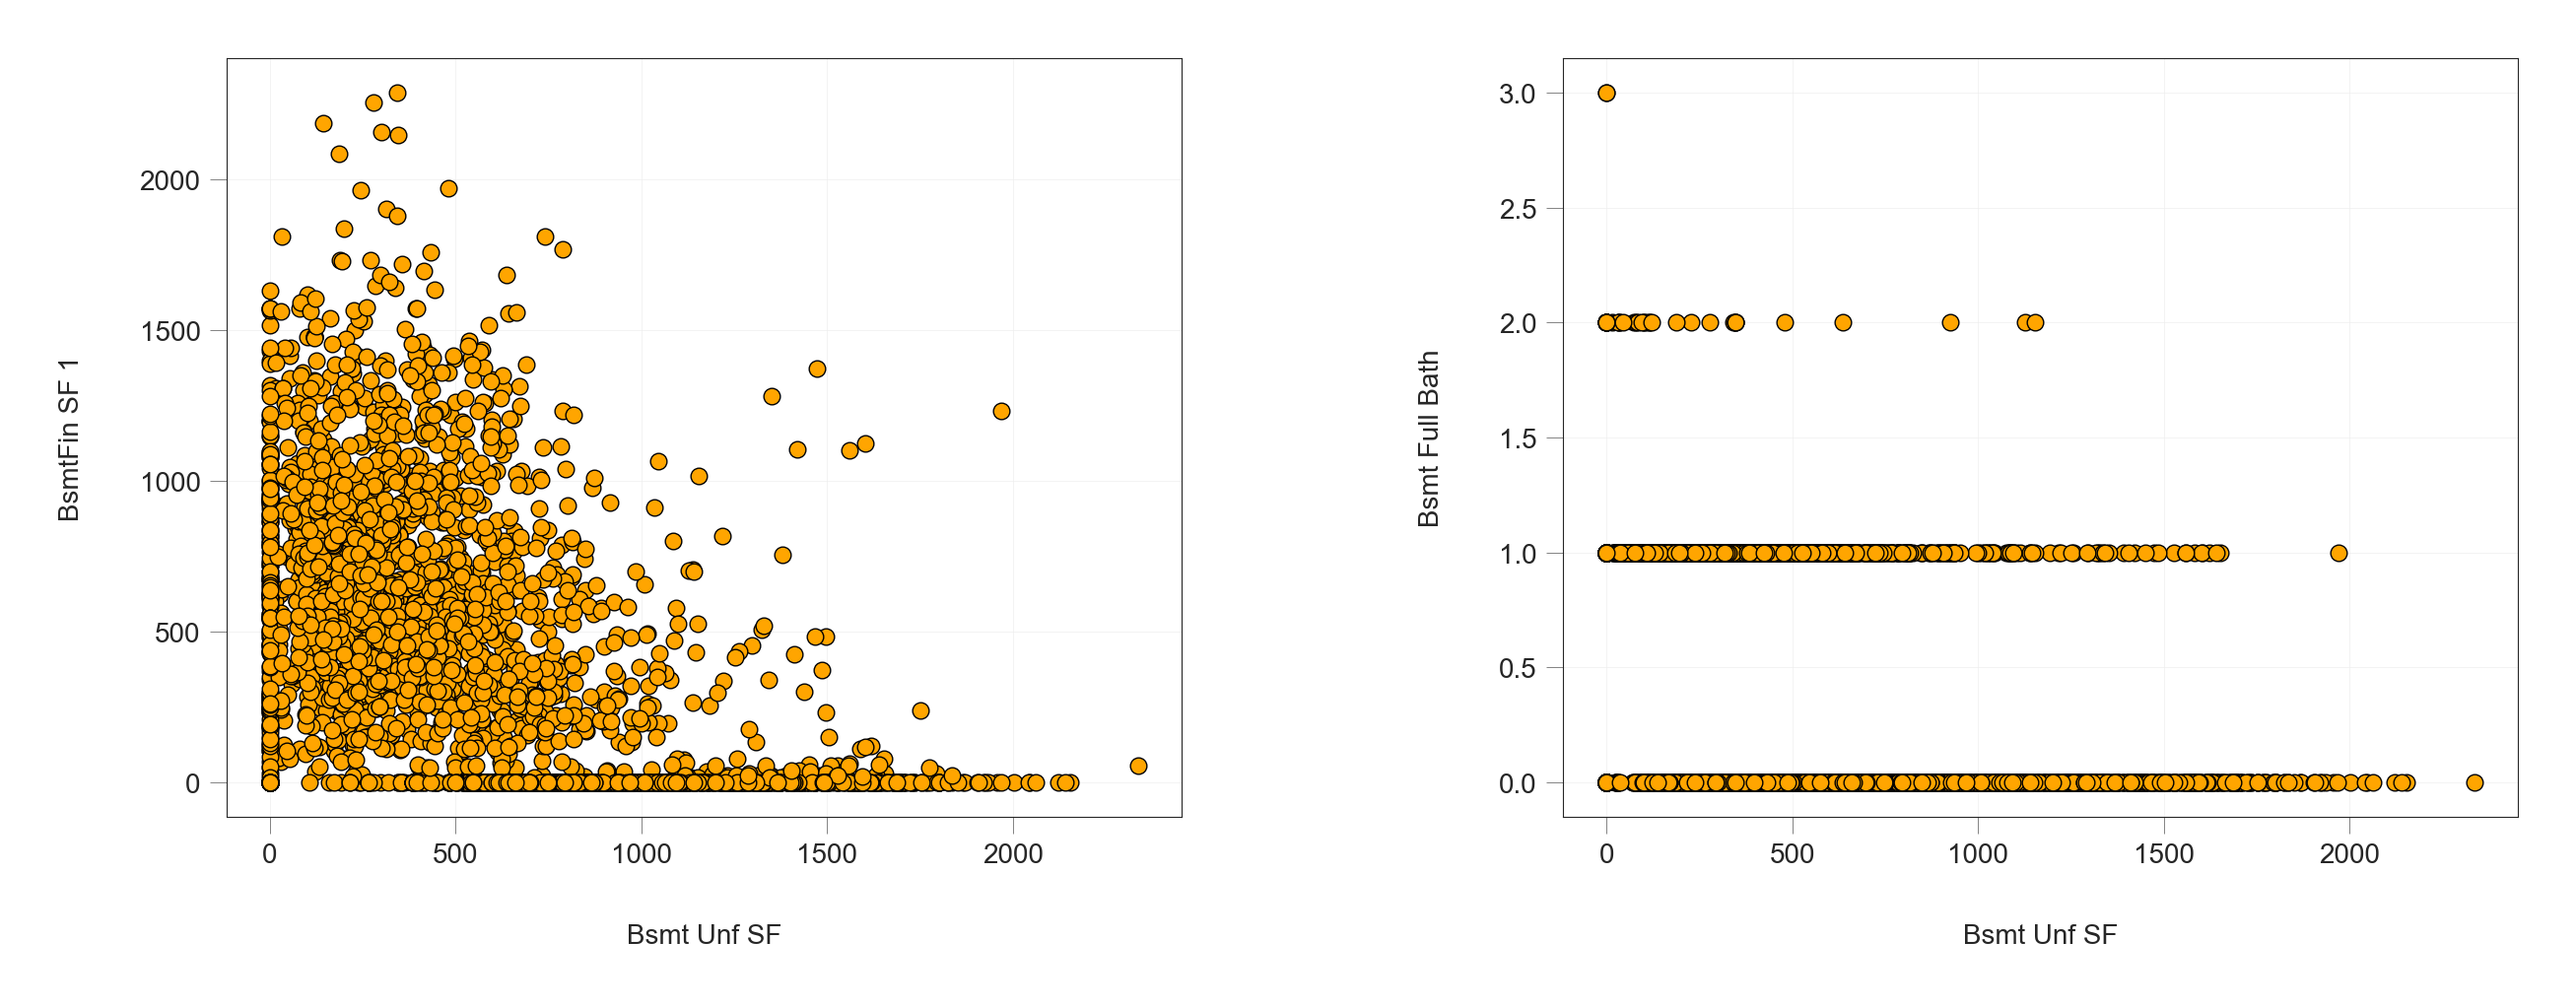

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(dataset["Bsmt Unf SF"], dataset["BsmtFin SF 1"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[0].set(xlabel="Bsmt Unf SF", ylabel="BsmtFin SF 1");
axes[1].scatter(dataset["Bsmt Unf SF"], dataset["Bsmt Full Bath"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[1].set(xlabel="Bsmt Unf SF", ylabel="Bsmt Full Bath");

Từ đồ thị, chúng ta có thể thấy mối tương quan nghịch giữa từng cặp biến này.
- Biểu đồ trái:
Nhiều ngôi nhà có diện tích tầng hầm đã hoàn thiện gần bằng 0, trong khi diện tích tầng hầm chưa hoàn thiện cao.
Có một mối quan hệ nghịch đảo nhẹ: khi diện tích tầng hầm chưa hoàn thiện tăng lên, diện tích tầng hầm đã hoàn thiện có xu hướng giảm xuống, nhưng mối quan hệ này không mạnh.
- Biểu đồ phải:
Số lượng phòng tắm hoàn chỉnh trong tầng hầm (Bsmt Full Bath) thường là 0, 1 hoặc 2, và rất ít ngôi nhà có hơn 2 phòng tắm hoàn chỉnh trong tầng hầm.
Không có mối quan hệ rõ ràng giữa diện tích tầng hầm chưa hoàn thiện và số lượng phòng tắm hoàn chỉnh trong tầng hầm.
## Feature Engineering



### Tạo các tính năng phái sinh mới

Đầu tiên, chúng tôi nhận thấy mối tương quan tích cực cao giữa biến mục tiêu `SalePrice` và từng biến `Overall Qual` và `Gr Liv Area`. Điều này cho thấy hai đặc điểm sau rất quan trọng trong việc dự đoán giá bán. Vì vậy, chúng ta sẽ tạo ra các đặc điểm đa thức từ những đặc điểm này: Đối với mỗi đặc điểm trong số này, chúng ta sẽ rút ra một đặc điểm có giá trị là bình phương của các giá trị ban đầu và một đặc điểm khác có giá trị là lập phương của các giá trị ban đầu. Hơn nữa, chúng tôi sẽ tạo một tính năng có giá trị là tích của hai giá trị tính năng của chúng tôi:

In [46]:
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3
dataset["OverallQual_GrLivArea"] = \
    dataset["Overall Qual"] * dataset["Gr Liv Area"]

Ngoài ra, chúng tôi nhận thấy rằng có một số tính năng dự đoán có mối tương quan cao với nhau. Để tránh các vấn đề phát sinh
- Chúng ta sẽ xóa một đặc điểm khỏi mỗi cặp yếu tố dự đoán có mối tương quan cao. 
  Chúng ta có hai cặp: 
     - cặp đầu tiên bao gồm `Garage Cars` và `Garage Area` ta xóa tính năng `Garage Cars`
     - cặp còn lại bao gồm `Gr Liv Area` và `TotRms AbvGrd` ta sẽ xóa tính năng `TotRms AbvGrd`
 

In [47]:
dataset.drop(["Garage Cars", "TotRms AbvGrd"], axis=1, inplace=True)

### Xử lý các biến thứ tự

Có một số tính năng thứ tự trong tập dữ liệu của chúng tôi. Ví dụ: tính năng `Bsmt Cond` có các giá trị có thể có sau:

In [48]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['Gd', 'TA', 'No Basement', 'Po', 'Fa', 'Ex']


Trong đó "Gd" có nghĩa là "Tốt", "TA" có nghĩa là "Điển hình", "Po" có nghĩa là "Kém", "Fa" có nghĩa là "Khá" và "Ex" có nghĩa là "Xuất sắc" . 
- Nhưng vấn đề là các mô hình học máy sẽ không biết rằng tính năng này đại diện cho một thứ hạng; nó sẽ được coi là các tính năng phân loại khác. Vì vậy, để giải quyết vấn đề này, chúng tôi sẽ ánh xạ từng giá trị có thể có của tính năng này thành một số. Chúng ta sẽ ánh xạ `"No Basement"` thành 0, `"Po"` thành 1, `"Fa"` thành 2, `"TA"` thành 3, `"Gd"` thành 4, và `"Ex"` đến 5.

Các tính năng thứ tự trong tập dữ liệu là: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating QC, Central Air, Kitchen Qual, Functional, Fireplace Qu, GarageFinish, Garage Qual, Garage Cond, Pool QC, Land Slope and Fence
--> Chúng tôi sẽ ánh xạ các giá trị của từng giá trị đó thành các số tương ứng như được mô tả cho `Bsmt Cond` ở trên và theo tài liệu về tập dữ liệu

In [49]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)

dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})
dataset['Functional'] = dataset['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

### One-Hot Encoding For Categorical Features

- Các mô hình học máy chỉ chấp nhận các số làm đầu vào và vì tập dữ liệu của chúng tôi chứa các đặc điểm phân loại nên chúng tôi cần mã hóa chúng để tập dữ liệu của mình phù hợp cho việc lập mô hình. Chúng ta sẽ mã hóa các đặc điểm phân loại của mình bằng kỹ thuật mã hóa one-hot để biến biến phân loại thành một số biến nhị phân dựa trên số lượng danh mục duy nhất trong biến phân loại; mỗi biến nhị phân kết quả chỉ có 0 và 1 là giá trị có thể có của nó. 

- Chúng ta hãy lấy biến `Paved Drive` làm ví dụ cho biết đường lái xe được trải nhựa như thế nào:
   - `Y` có nghĩa là "Đã trải nhựa"
   - `P` có nghĩa là "Mặt đường một phần" 
   - `N` có nghĩa là "Bụi bẩn/sỏi". 
- Chúng ta hãy xem giá trị `Paved Drive` cho một vài hàng đầu tiên trong tập dữ liệu của chúng tôi:

In [50]:
dataset[['Paved Drive']].head()

Paved Drive
0           P
1           Y
2           Y
3           Y
4           Y

Bây giờ, chúng tôi thực hiện mã hóa một lần:

In [51]:
dataset = pd.get_dummies(dataset)

Chúng ta hãy xem điều gì đã xảy ra với biến `Paved Drive` bằng cách xem các hàng tương tự ở trên:

In [52]:
pavedDrive_oneHot = [c for c in dataset.columns if c.startswith("Paved")]
dataset[pavedDrive_oneHot].head()

Paved Drive_N  Paved Drive_P  Paved Drive_Y
0              0              1              0
1              0              0              1
2              0              0              1
3              0              0              1
4              0              0              1

Ví dụ: chúng ta có thể thấy rằng giá trị của `P` trong cột `Paved Drive` ban đầu được chuyển đổi thành 1 trong `Paved Drive_P` và các số 0 trong `Paved Drive_N` và `Paved Drive_Y` sau một lần mã hóa nóng.

Tất cả các cột phân loại đều được chuyển đổi theo cùng một cách.

Bây giờ, sau khi chúng ta đã làm sạch và chuẩn bị tập dữ liệu của mình, nó đã sẵn sàng để lập mô hình.

### Phân Cụm

In [53]:
dataset[['SalePrice']].head()

SalePrice
0     215000
1     105000
2     172000
3     244000
4     189900

In [54]:
from sklearn.cluster import KMeans 
dataset

MS SubClass         Lot Frontage  Lot Area  Land Slope  Overall Qual  \
0              20               141.00     31770           0             6   
1              20                80.00     11622           0             5   
2              20                81.00     14267           0             6   
3              20                93.00     11160           0             7   
4              60                74.00     13830           0             5   
...           ...                  ...       ...         ...           ...   
2920           80                37.00      7937           0             6   
2921           20                 0.00      8885           1             5   
2922           85                62.00     10441           0             5   
2923           20                77.00     10010           1             5   
2924           60                74.00      9627           1             7   

      Overall Cond  Year Built  Year Remod/Add         Mas Vnr Area  \
0                5        1960            1960               112.00   
1                6        1961            1961                 0.00   
2                6        1958            1958               108.00   
3                5        1968            1968                 0.00   
4                5        1997            1998                 0.00   
...            ...         ...             ...                  ...   
2920             6        1984            1984                 0.00   
2921             5        1983            1983                 0.00   
2922             5        1992            1992                 0.00   
2923             5        1974            1975                 0.00   
2924             5        1993            1994                94.00   

      Exter Qual  ...  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0              2  ...              0              0              0   
1              2  ...              0              0              0   
2              2  ...              0              0              0   
3              3  ...              0              0              0   
4              2  ...              0              0              0   
...          ...  ...            ...            ...            ...   
2920           2  ...              0              0              0   
2921           2  ...              0              0              0   
2922           2  ...              0              0              0   
2923           2  ...              0              0              0   
2924           2  ...              0              0              0   

      Sale Type_WD   Sale Condition_Abnorml  Sale Condition_AdjLand  \
0                 1                       0                       0   
1                 1                       0                       0   
2                 1                       0                       0   
3                 1                       0                       0   
4                 1                       0                       0   
...             ...                     ...                     ...   
2920              1                       0                       0   
2921              1                       0                       0   
2922              1                       0                       0   
2923              1                       0                       0   
2924              1                       0                       0   

      Sale Condition_Alloca  Sale Condition_Family  Sale Condition_Normal  \
0                         0                      0                      1   
1                         0                      0                      1   
2                         0                      0                      1   
3                         0                      0                      1   
4                         0                      0                      1   
...                     ...                    ...          

Giảm chiều dữ liệu trong dataset xuống còn 2 chiều bằng cách sử dụng PCA, sau đó lưu kết quả vào df2. PCA giúp giữ lại càng nhiều phương sai của dữ liệu gốc càng tốt trong không gian 2 chiều mới này.

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components = 2) 

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(dataset)
df1 = pd.DataFrame(X_scaled) 
pca.fit(dataset)
df2 = pca.fit_transform(df1)
df2

array([[ 0.11960365, -1.83416506],
       [-0.57347396, -0.2710087 ],
       [-0.14301755, -1.8732636 ],
       ...,
       [-0.60638092,  0.23602066],
       [-0.44708392, -1.1538858 ],
       [ 0.77135662, -0.09598461]])

Thực hiện K-means clustering với số lượng cụm từ 1 đến 10, tính toán Tổng Squared Error (SSE) cho mỗi số lượng cụm, và sau đó vẽ biểu đồ elbow để tìm số lượng cụm tối ưu. 

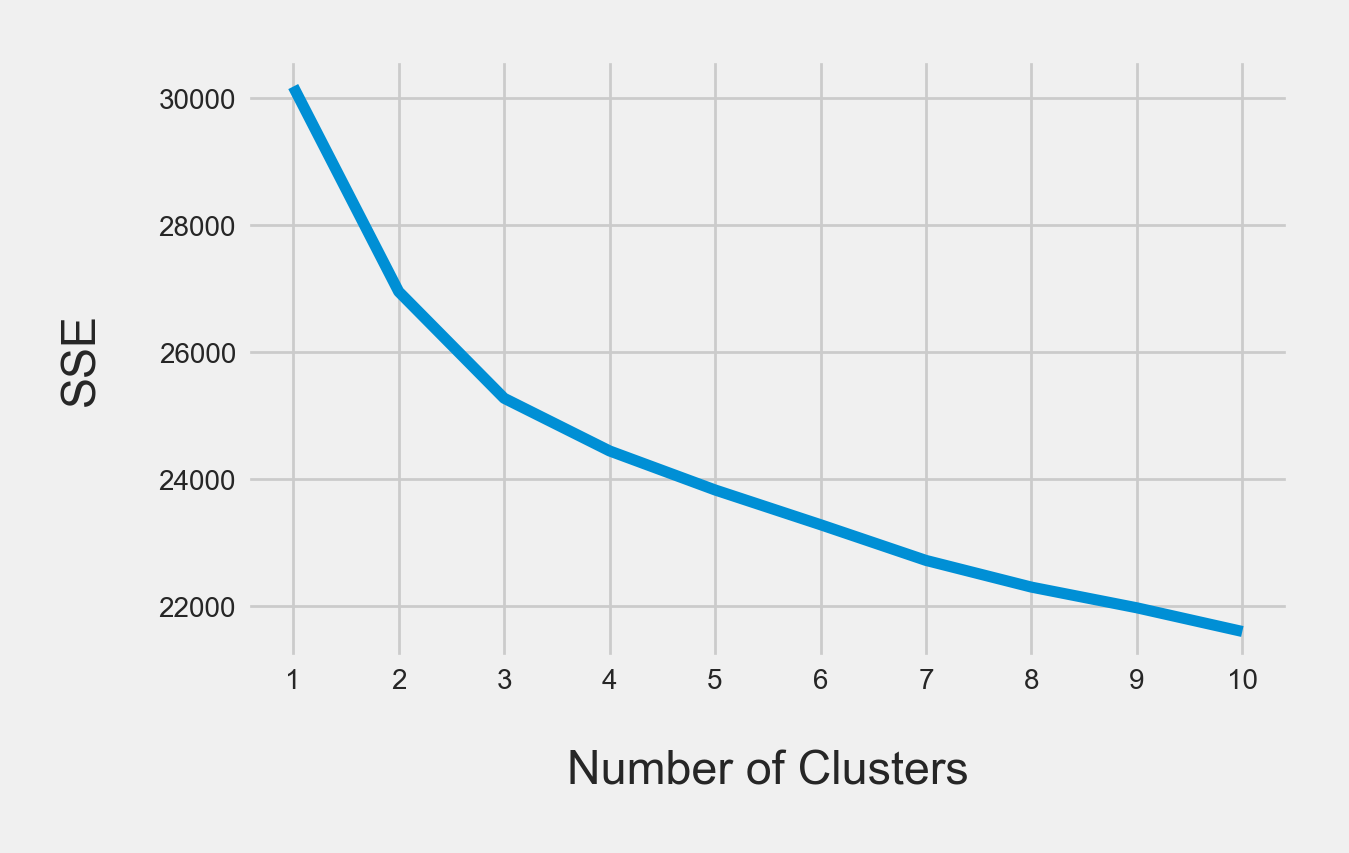

In [56]:

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [57]:
kmeans =  KMeans(n_clusters=3, max_iter=600, algorithm = 'lloyd')
kmeans.fit(df1)

KMeans(max_iter=600, n_clusters=3)

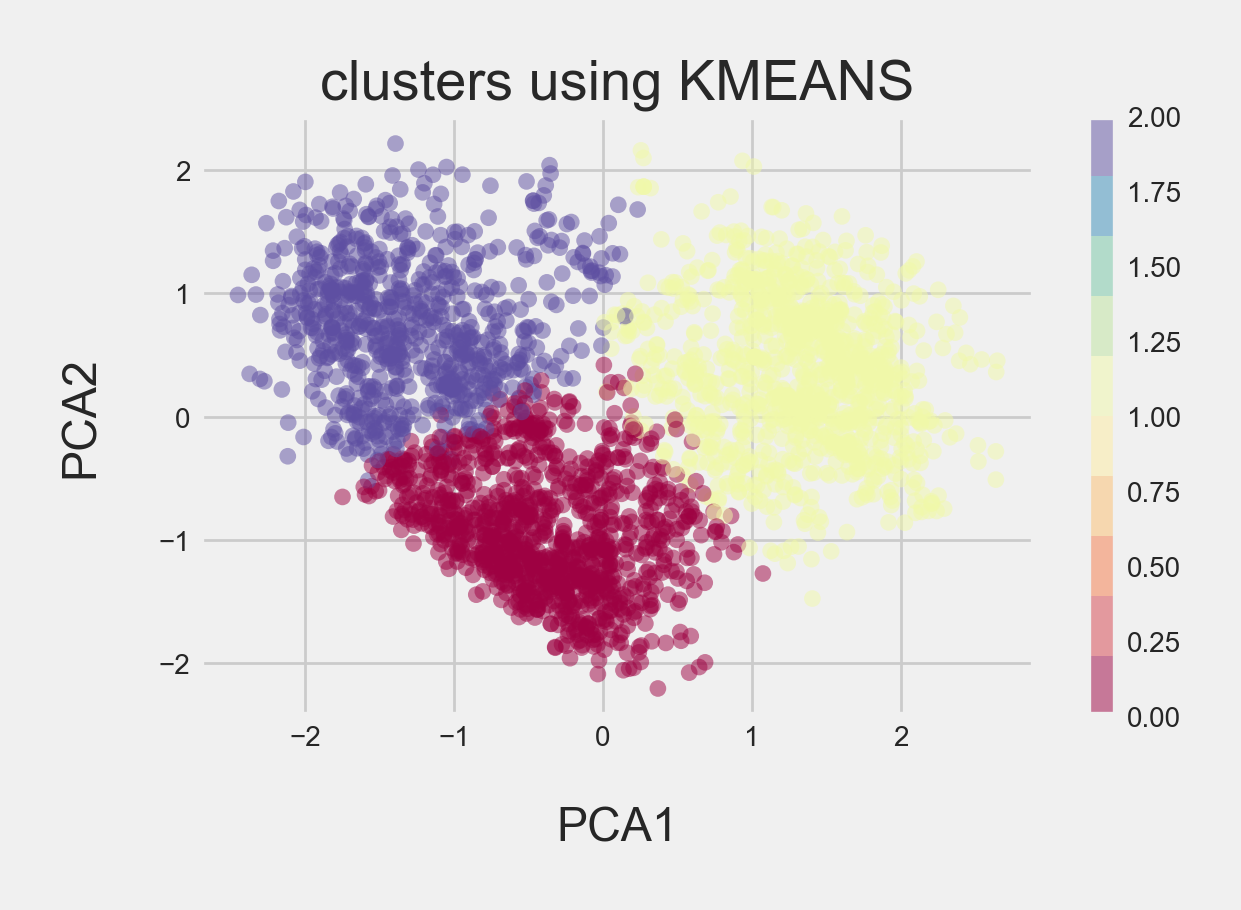

In [58]:
plt.scatter(df2[:, 0], df2[:, 1],
            c= kmeans.labels_.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Spectral', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('clusters using KMEANS') 
plt.colorbar();

In [59]:
dataset["cluster"] = kmeans.labels_.astype(float)
dataset

MS SubClass         Lot Frontage  Lot Area  Land Slope  Overall Qual  \
0              20               141.00     31770           0             6   
1              20                80.00     11622           0             5   
2              20                81.00     14267           0             6   
3              20                93.00     11160           0             7   
4              60                74.00     13830           0             5   
...           ...                  ...       ...         ...           ...   
2920           80                37.00      7937           0             6   
2921           20                 0.00      8885           1             5   
2922           85                62.00     10441           0             5   
2923           20                77.00     10010           1             5   
2924           60                74.00      9627           1             7   

      Overall Cond  Year Built  Year Remod/Add         Mas Vnr Area  \
0                5        1960            1960               112.00   
1                6        1961            1961                 0.00   
2                6        1958            1958               108.00   
3                5        1968            1968                 0.00   
4                5        1997            1998                 0.00   
...            ...         ...             ...                  ...   
2920             6        1984            1984                 0.00   
2921             5        1983            1983                 0.00   
2922             5        1992            1992                 0.00   
2923             5        1974            1975                 0.00   
2924             5        1993            1994                94.00   

      Exter Qual  ...  Sale Type_Oth  Sale Type_VWD  Sale Type_WD   \
0              2  ...              0              0              1   
1              2  ...              0              0              1   
2              2  ...              0              0              1   
3              3  ...              0              0              1   
4              2  ...              0              0              1   
...          ...  ...            ...            ...            ...   
2920           2  ...              0              0              1   
2921           2  ...              0              0              1   
2922           2  ...              0              0              1   
2923           2  ...              0              0              1   
2924           2  ...              0              0              1   

      Sale Condition_Abnorml  Sale Condition_AdjLand  Sale Condition_Alloca  \
0                          0                       0                      0   
1                          0                       0                      0   
2                          0                       0                      0   
3                          0                       0                      0   
4                          0                       0                      0   
...                      ...                     ...                    ...   
2920                       0                       0                      0   
2921                       0                       0                      0   
2922                       0                       0                      0   
2923                       0                       0                      0   
2924                       0                       0                      0   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  \
0                         0                      1                       0   
1                         0                      1                       0   
2                         0                      1                       0   
3                         0                      1                       0   
4                         0         

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [61]:
df1 = dataset.copy()
X= df1.drop('cluster', axis =1)
y= df1['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.36%


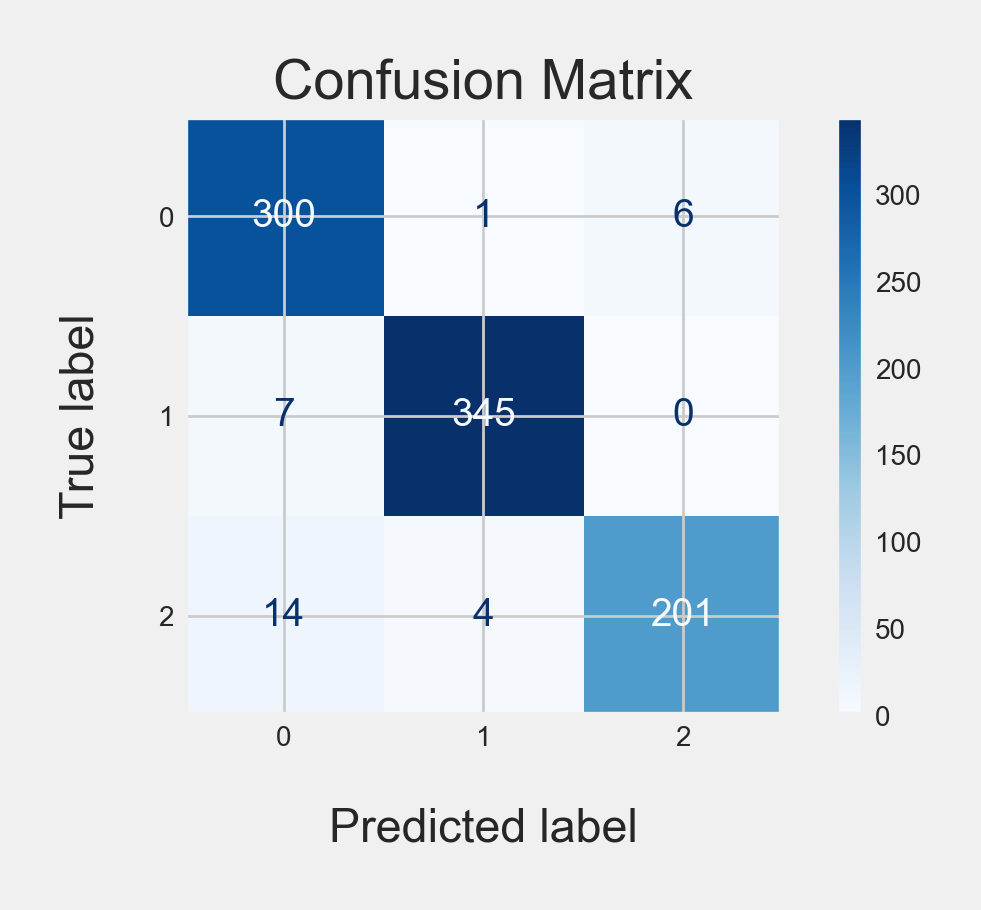

In [63]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [64]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình
dtc.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dtc.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.39%


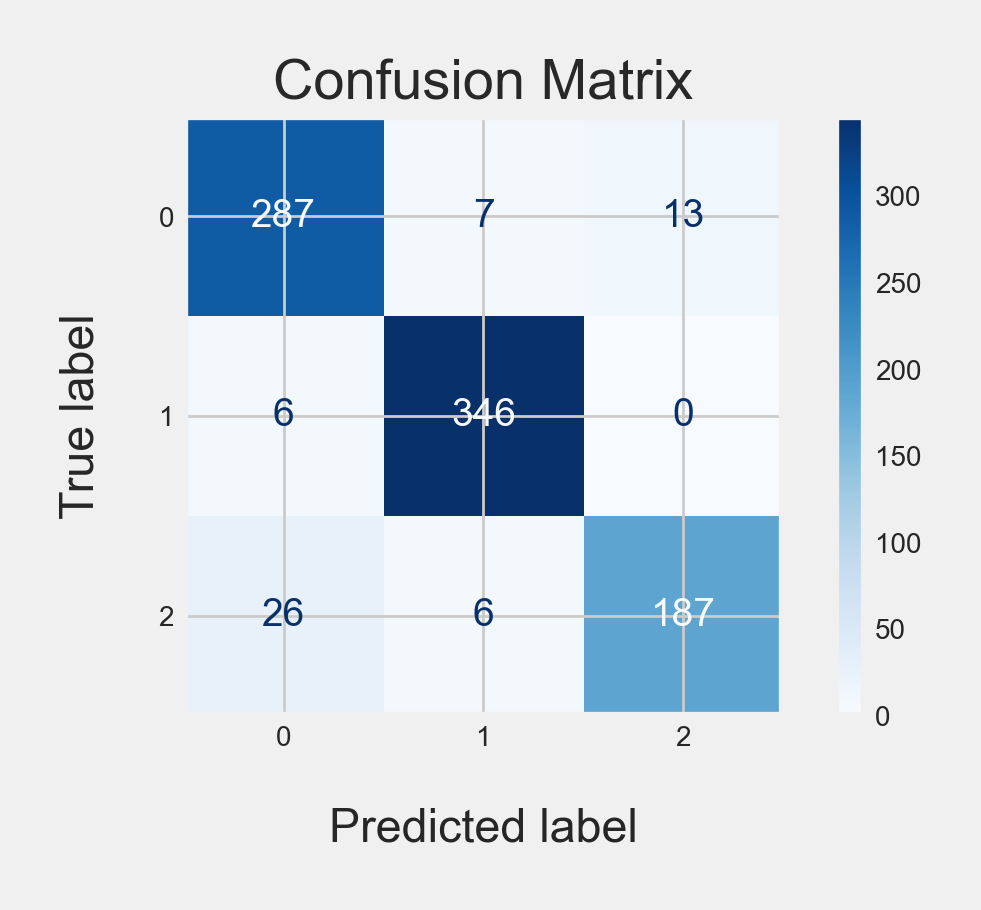

In [65]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Dùng xem chi tiết mỗi cụm

In [66]:
# Định nghĩa hàm để áp dụng cho mỗi cột trong groupby
df1hh = df1.copy()
def sum_numeric(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.sum()
    else:
        return col.count()

# Groupby và áp dụng hàm cho từng cột
result = df1hh.groupby('cluster').agg(sum_numeric)

result.columns.to_list()

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'Overall Qual_p2',
 'Overall Qual_p3',
 'Gr Liv Area_p2',
 'Gr Liv Area_p3',
 'OverallQual_GrLivArea',
 'MS Zoning_A (agr)',
 'MS Zoning_C (all)',
 'MS

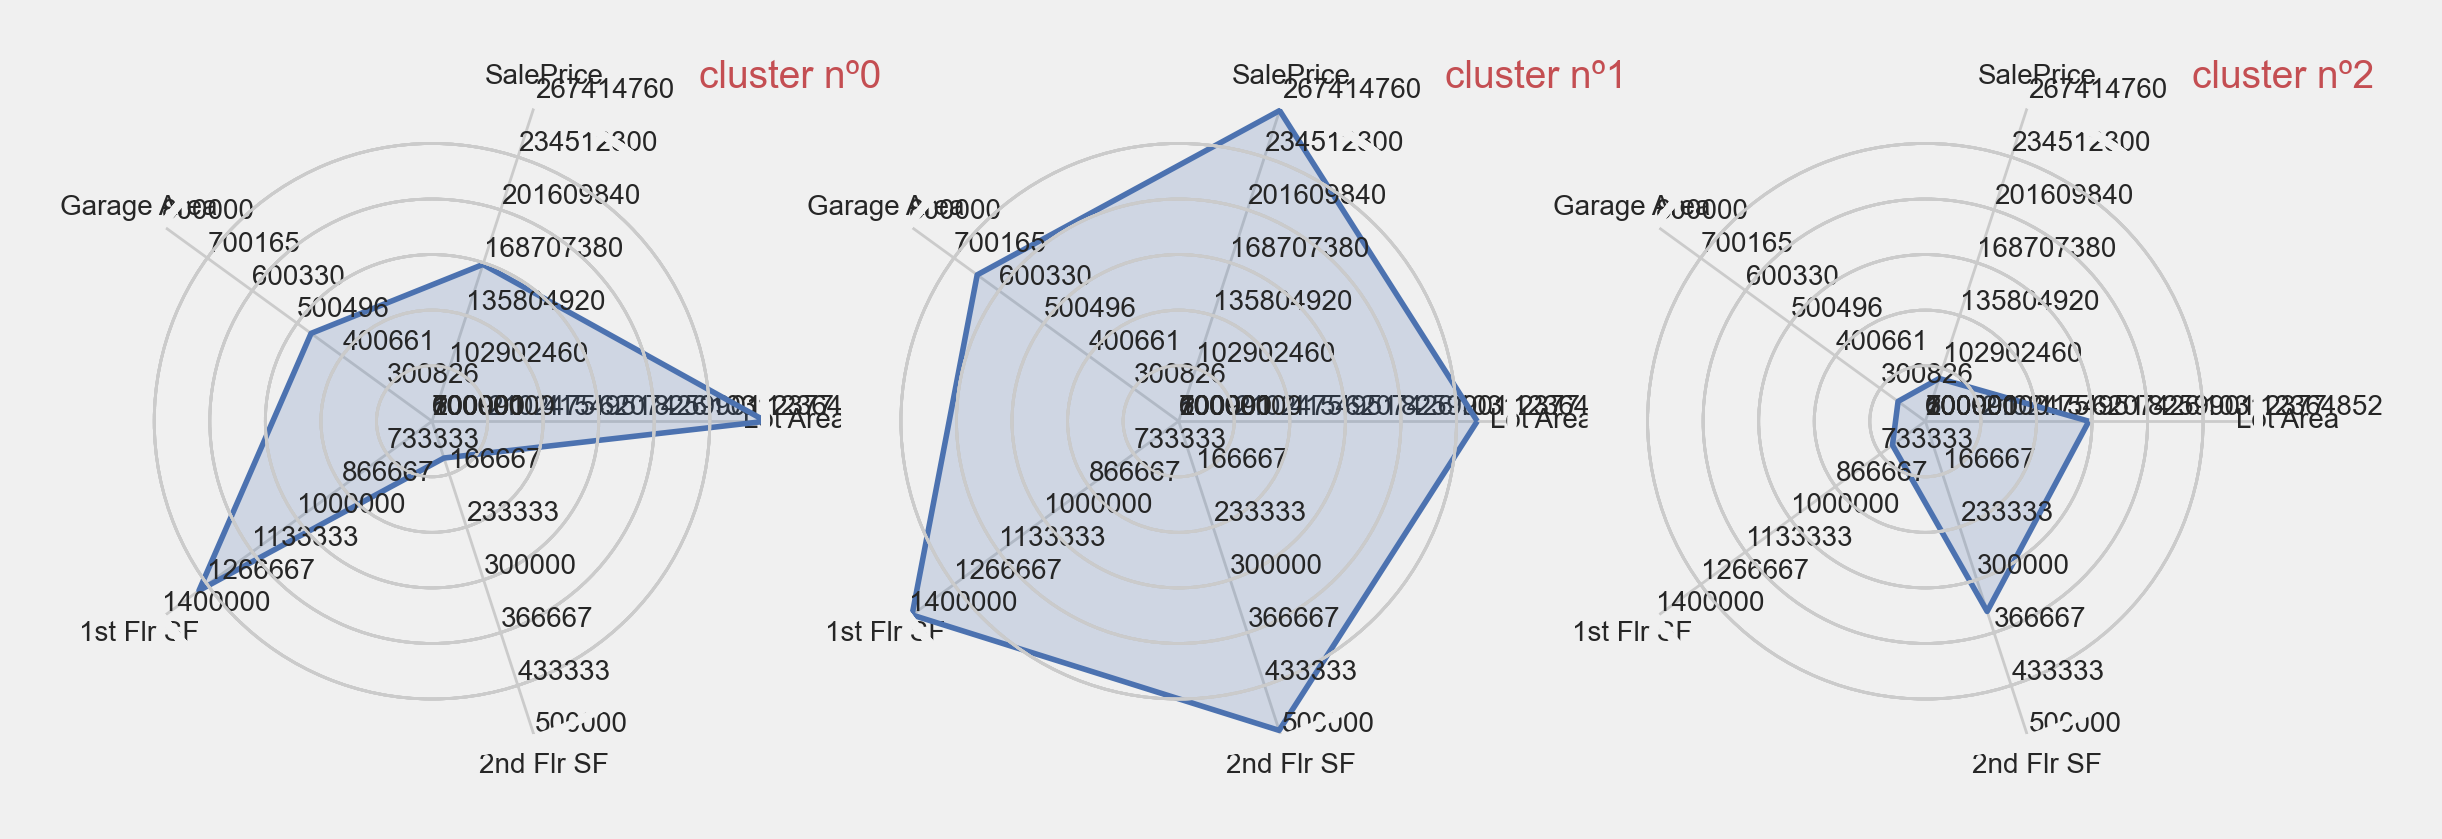

In [67]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]


class RadarChart:
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels=6):
        angles = np.arange(0, 360, 360.0 / len(variables))
        ix, iy = location[:]
        size_x, size_y = sizes[:]

        axes = [
            fig.add_axes([ix, iy, size_x, size_y], polar=True, label="axes{}".format(i))
            for i in range(len(variables))
        ]

        _, text = axes[0].set_thetagrids(angles, labels=variables)

        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)

        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")

        for i, ax in enumerate(axes):
            grid = np.linspace(
                *ranges[i], num=n_ordinate_levels + 1
            )  # Tăng số lượng vị trí lên 1
            grid_label = [
                "{:.0f}".format(x) for x in grid
            ]  # Không cần thêm hoặc bớt nhãn
            ax.set_rgrids(grid, labels=grid_label, angle=angles[i])
            ax.set_ylim(*ranges[i])

        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)

    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform=self.ax.transAxes, *args, **kw)


fig = plt.figure(figsize=(10, 12))

attributes = [
    "Lot Area",
    "SalePrice",
    "Garage Area",
    "1st Flr SF",
    "2nd Flr SF"
]
ranges = [
    [50000, 12364852],
    [70000000, 267414760],
    [200991, 800000],
    [600000, 1400000],
    [100000,500000]
]
index = [0, 1, 2]

n_groups = 3
i_cols = 3
i_rows = n_groups // i_cols
size_x, size_y = (1 / i_cols), (1 / i_rows)

for ind in range(3):
    ix = ind % 3
    iy = i_rows - ind // 3
    pos_x = ix * (size_x + 0.04)
    pos_y = iy * (size_y + 0.04)
    location = [pos_x, pos_y]
    sizes = [size_x, size_y]

    data = np.array(result.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color="b", linewidth=2.0)
    radar.fill(data, alpha=0.2, color="b")
    radar.title(title="cluster nº{}".format(index[ind]), color="r")
    ind += 1


<h1 id="pred-type">Các Loại Mô Hình Sử Dụng</h1>
Trong phần này, Nhóm chọn loại dự đoán học máy phù hợp với vấn đề của mình. Nhóm muốn xác định xem đây là vấn đề phân loại hay vấn đề phân loại. Trong dự án này, Nhóm muốn dự đoán giá của một ngôi nhà dựa trên thông tin về nó. Giá chúng ta muốn dự đoán là một giá trị liên tục; nó có thể là bất kỳ số thực nào. Có thể thấy điều này bằng cách xem xét giá trị mục tiêu trong tập dữ liệu SalePrice của Nhóm

Điều đó có nghĩa là loại dự đoán phù hợp với vấn đề của chúng ta là **hồi quy**.

Bây giờ chúng ta chuyển sang chọn các kỹ thuật lập mô hình mà chúng ta muốn sử dụng. Có rất nhiều kỹ thuật có sẵn cho các vấn đề hồi quy như Hồi quy tuyến tính, Mạng thần kinh nhân tạo, Cây quyết định, Rừng ngẫu nhiên, v.v. Trong dự án này, Nhóm sẽ thử nghiệm nhiều kỹ thuật lập mô hình và sau đó chọn (các) kỹ thuật mang lại kết quả kết quả tốt nhất. Các kỹ thuật mà Nhóm sẽ thử là:

### 1. Linear Regression

Hồi quy tuyến tính là một kỹ thuật phân tích dữ liệu dự đoán giá trị của dữ liệu không xác định bằng cách sử dụng một giá trị dữ liệu liên quan và đã biết khác. Nó mô hình toán học biến không xác định hoặc phụ thuộc và biến đã biết hoặc độc lập như một phương trình tuyến tính.

### 2. Nearest Neighbors

Thuật toán KNN cho rằng những dữ liệu tương tự nhau sẽ tồn tại gần nhau trong một không gian, từ đó công việc của chúng ta là sẽ tìm k điểm gần với dữ liệu cần kiểm tra nhất.

### 3. Support Vector Regression

Support vector machines (SVM) là một tập hợp các phương pháp có thể được sử dụng cho các vấn đề phân loại và hồi quy. Khi chúng được sử dụng để hồi quy thì gọi là Support Vector Regression.

### 4. Decision Trees

Đối với kỹ thuật này, mục tiêu là tạo ra một mô hình dự đoán giá trị của biến mục tiêu bằng cách tìm hiểu các quy tắc quyết định đơn giản được suy ra từ các đặc điểm dữ liệu. Một ví dụ về cây quyết định đơn giản để dự đoán ai sống sót khi tàu Titanic bị chìm được trình bày trong Hình 8:

![Figure 8: Predicting who survived when the Titanic sank](https://s3.eu-north-1.amazonaws.com/ammar-files/kaggle-kernels/House+Price+Prediction+%7C+An+End-to-End+Machine+Learning+Project/8.png)

### 5. Neural Networks

Mạng lưới thần kinh là một mô hình học máy cố gắng bắt chước cách thức hoạt động của bộ não sinh học. Một mạng lưới thần kinh bao gồm nhiều lớp. Mỗi lớp bao gồm một số nút. Các nút của mỗi lớp được kết nối với các nút của các lớp liền kề. Mỗi nút có thể được kích hoạt hoặc không dựa trên đầu vào và chức năng kích hoạt của nó. Một ví dụ về mạng lưới thần kinh được hiển thị trong Hình 9:

![Figure 9: A neural network](https://s3.eu-north-1.amazonaws.com/ammar-files/kaggle-kernels/House+Price+Prediction+%7C+An+End-to-End+Machine+Learning+Project/9.png)

### 6. Random Forest

Bagging là một phương pháp ensemble, trong đó nhiều mô hình cơ sở được sử dụng với một tập dữ liệu ngẫu nhiên con để giảm phương sai của mô hình cơ sở.

### 7. Gradient Boosting

Tăng cường cũng là một phương pháp tổng hợp trong đó các mô hình cơ sở yếu được sử dụng để tạo ra một mô hình mạnh giúp giảm độ lệch và phương sai của mô hình cơ sở.

<h1 id="model-building">Xây Dựng Mô Hình và Đánh Giá </h1>

Trong phần này, Nhóm sẽ xây dựng mô hình dự đoán của mình: Nhóm sẽ chọn thuật toán cho từng kỹ thuật mà Nhóm đã đề cập ở phần trước. Sau khi xây dựng mô hình, chúng ta sẽ đánh giá hiệu quả và kết quả của nó.

## Feature Scaling

Để làm cho tất cả các thuật toán hoạt động chính xác với dữ liệu của Nhóm, Nhóm cần mở rộng quy mô các tính năng trong tập dữ liệu của mình. Để làm được điều đó, chúng ta sẽ sử dụng một hàm hữu ích có tên `StandardScaler()` từ gói Python Scikit-Learn phổ biến. Hàm này chuẩn hóa các đặc điểm bằng cách trừ giá trị trung bình và chia tỷ lệ thành phương sai đơn vị. Nó hoạt động trên từng tính năng một cách độc lập. Đối với giá trị $x$ của Feature $F$, hàm `StandardScaler()` thực hiện thao tác sau:

\begin{equation*}
z = \frac{x - \mu}{s}
\end{equation*}

trong đó $z$ là kết quả của việc chia tỷ lệ $x$, $\mu$ là giá trị trung bình của Feature $F$, và $s$ là độ lệch chuẩn của $F$.

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
dataset.loc[:, dataset.columns != 'SalePrice'] = scaler.fit_transform(
    dataset.loc[:, dataset.columns != 'SalePrice'])

## Chia tập Train - Test 


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('SalePrice', axis=1), dataset[['SalePrice']], 
    test_size=0.25, random_state=3)

## Phương pháp tiếp cận Mô hình

Đối với mỗi kỹ thuật được đề cập trong phần trước (Hồi quy tuyến tính, Hàng xóm gần nhất, Máy vectơ hỗ trợ, v.v.), Nhóm sẽ làm theo các bước sau để xây dựng mô hình:

- Chọn thuật toán thực hiện kỹ thuật tương ứng
- Tìm kiếm tổ hợp tham số hiệu quả cho thuật toán đã chọn
- Tạo mô hình sử dụng các tham số tìm được
- Huấn luyện (fit) mô hình trên tập dữ liệu huấn luyện
- Kiểm thử mô hình trên tập dữ liệu thử nghiệm và nhận kết quả

### Searching for Effective Parameters

Sử dụng Scikit-Learn, Nhóm có thể xây dựng mô hình ví dụ như cây quyết định chẳng hạn như sau:

```py
model = DecisionTreeRegressor(max_depth=14, min_samples_split=5, max_features=20)
```

Có thể làm điều này nhưng có thể đạt được hiệu suất tốt hơn nếu chọn các giá trị tốt hơn cho các tham số `max_deep`, `min_samples_split` và `max_features`. Để làm như vậy, Nhóm sẽ kiểm tra nhiều kết hợp tham số và chọn kết hợp mang lại điểm cao nhất. Scikit-Learn cung cấp một chức năng hữu ích cho mục đích đó: `GridSearchCV()`. Vì vậy, với ví dụ trên, chúng ta sẽ làm như sau:

```py
parameter_space = {
    "max_depth": [7, 15],
    "min_samples_split": [5, 10],
    "max_features": [30, 45]
}

clf = GridSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                   scoring="neg_mean_absolute_error")
                   
clf.fit(X_train, y_train)
```

Đôi khi, khi số lượng kết hợp tham số lớn, `GridSearchCV()` có thể mất rất nhiều thời gian để chạy. Vì vậy, ngoài `GridSearchCV()`, đôi khi sẽ sử dụng `RandomizedSearchCV()` tương tự như `GridSearchCV()` nhưng thay vì sử dụng tất cả các kết hợp tham số, nó chọn một số kết hợp ngẫu nhiên được chỉ định bởi `n_iter`. Đối với ví dụ trên, chúng ta có thể sử dụng `RandomizedSearchCV()` như sau:

```py
clf = RandomizedSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                         scoring="neg_mean_absolute_error", n_iter=100)
```
Điều này sẽ làm cho `RandomizedSearchCV()` chọn ngẫu nhiên 100 kết hợp tham số.

## Đánh giá Hiệu Suất

Để đánh giá hiệu suất của các mô hình ,Nhóm sẽ sử dụng sai số tuyệt đối trung bình (MAE). Nếu $\hat{y}_i$ là giá trị dự đoán của phần tử $i$-th và $y$ là giá trị thực tương ứng, thì đối với tất cả các phần tử $n$, RMSE được tính như sau:

\begin{equation*}
\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|.
\end{equation*}

## Mô Hình 

### Linear Regression
Đối với Hồi quy tuyến tính, Nhóm sẽ chọn 2 cách triển khai thuật toán: Ridge Regression và Elastic Net. Nhóm sẽ sử dụng các triển khai được cung cấp trong gói Scikit-Learn của các thuật toán này.

#### 1. Ridge Regression



```py
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
      max_iter=None, tol=0.001, solver=’auto’, random_state=None)
```


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 290, 'fit_intercept': True, 'solver': 'svd'}


In [71]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

In [72]:
ridge_model.fit(X_train, y_train);

In [73]:
from sklearn.metrics import mean_absolute_error

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 15261.347583183118


#### 2. Elastic Net


```py
ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, 
           precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
           warm_start=False, positive=False, random_state=None, selection=’cyclic’)
```

In [74]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 280, 'fit_intercept': True, 'l1_ratio': 1}


In [75]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

In [76]:
elasticNet_model.fit(X_train, y_train);

In [77]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 14807.15310288377


### K- Nearest Neighbors



```py
KNeighborsRegressor(n_neighbors=5, weights=’uniform’, algorithm=’auto’, 
                    leaf_size=30, p=2, metric=’minkowski’, metric_params=None, 
                    n_jobs=None, **kwargs)
```


In [78]:
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [9, 10, 11,50],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1,2,20,50,200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3, 
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 11, 'weights': 'distance'}


In [79]:
knn_model = KNeighborsRegressor(**clf.best_params_)

In [80]:
knn_model.fit(X_train, y_train);

In [81]:
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

K-Nearest Neighbors MAE = 22692.807404301642


### Support Vector Regression



```py
SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, 
    C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
```

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

parameter_space = \
    {
        "kernel": ["poly", "linear", "rbf", "sigmoid"],
        "degree": [3, 5],
        "coef0": [0, 3, 7],
        "gamma":[1e-3, 1e-1, 1/X_train.shape[1]],
        "C": [1, 10, 100],
    }

clf = GridSearchCV(SVR(), parameter_space, cv=3, n_jobs=4,
                   scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'C': 100, 'coef0': 3, 'degree': 5, 'gamma': 0.00411522633744856, 'kernel': 'poly'}


In [83]:
svr_model = SVR(**clf.best_params_)

In [84]:
svr_model.fit(X_train, y_train);

In [85]:
y_pred = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, y_pred)
print("Support Vector Regression MAE =", svr_mae)

Support Vector Regression MAE = 12872.619053326105


### Decision Tree


```py
DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=None, 
                      random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, presort=False)
```



In [86]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'friedman_mse', 'max_features': 150, 'min_samples_leaf': 7, 'min_samples_split': 18}


In [87]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [88]:
dt_model.fit(X_train, y_train);

In [89]:
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 19794.354065647447


### Neural Network


```py
MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, 
             alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, 
             learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
             random_state=None, tol=0.0001, verbose=False, warm_start=False, 
             momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
             n_iter_no_change=10)
```




In [90]:
from sklearn.neural_network import MLPRegressor

parameter_space = \
    {
        "hidden_layer_sizes": [(7,)*3, (19,), (100,), (154,)],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs"],
        "alpha": [1, 10, 100],
    }

clf = GridSearchCV(MLPRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'activation': 'identity', 'alpha': 1, 'hidden_layer_sizes': (7, 7, 7), 'solver': 'lbfgs'}


In [91]:
nn_model = MLPRegressor(**clf.best_params_)

In [92]:
nn_model.fit(X_train, y_train);

In [93]:
y_pred = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, y_pred)
print("Neural Network MAE =", nn_mae)

Neural Network MAE = 15402.028608283004


### Random Forest



```py
RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=’auto’, 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, oob_score=False, 
                      n_jobs=None, random_state=None, verbose=0, warm_start=False)
```


In [94]:
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["squared_error", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 254, 'criterion': 'squared_error', 'bootstrap': False}


In [95]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [96]:
rf_model.fit(X_train, y_train);

In [97]:
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 14556.627709471766


### Gradient Boosting



```py
XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
             objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, 
             gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
             colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
             missing=None, importance_type='gain', **kwargs)
```


In [98]:
from xgboost import XGBRegressor

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 25, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [99]:
xgb_model = XGBRegressor(**clf.best_params_)

In [100]:
xgb_model.fit(X_train, y_train);

In [101]:
y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

XGBoost MAE = 12542.71438481899


<h1 id="analysis-comparison">Đánh Giá và So Sánh</h1>

Ở phần trước, chúng ta đã tạo nhiều mô hình: với mỗi mô hình, chúng ta tìm kiếm các tham số tốt sau đó chúng ta xây dựng mô hình bằng các tham số đó, sau đó huấn luyện (lắp) mô hình vào dữ liệu huấn luyện (X_train và y_train), sau đó thử nghiệm mô hình trên dữ liệu thử nghiệm của Nhóm (X_test) và cuối cùng, Nhóm đã đánh giá hiệu suất của mô hình bằng cách so sánh các dự đoán của mô hình với các giá trị thực trong y_test. Nhóm đã sử dụng sai số tuyệt đối trung bình (MAE) để đánh giá hiệu suất của mô hình.

Sử dụng các kết quả thu được ở phần trước, Nhóm trình bày một bảng hiển thị sai số tuyệt đối trung bình (MAE) cho mỗi mô hình khi áp dụng cho tập kiểm tra X_test. Bảng được sắp xếp tăng dần theo điểm MAE.

|Model                            |MAE      |
|---------------------------------|---------|
|XGBoost                          |12556.68 |
|Support Vector Regression (SVR)  |12874.93 |
|Random Forest                    |14506.46 |
|Elastic Net                      |14767.91 |
|Ridge                            |15270.46 |
|Neural Network                   |15656.38 |
|Decision Tree                    |20873.95 |
|K-Nearest Neighbors (KNN)        |22780.14 |



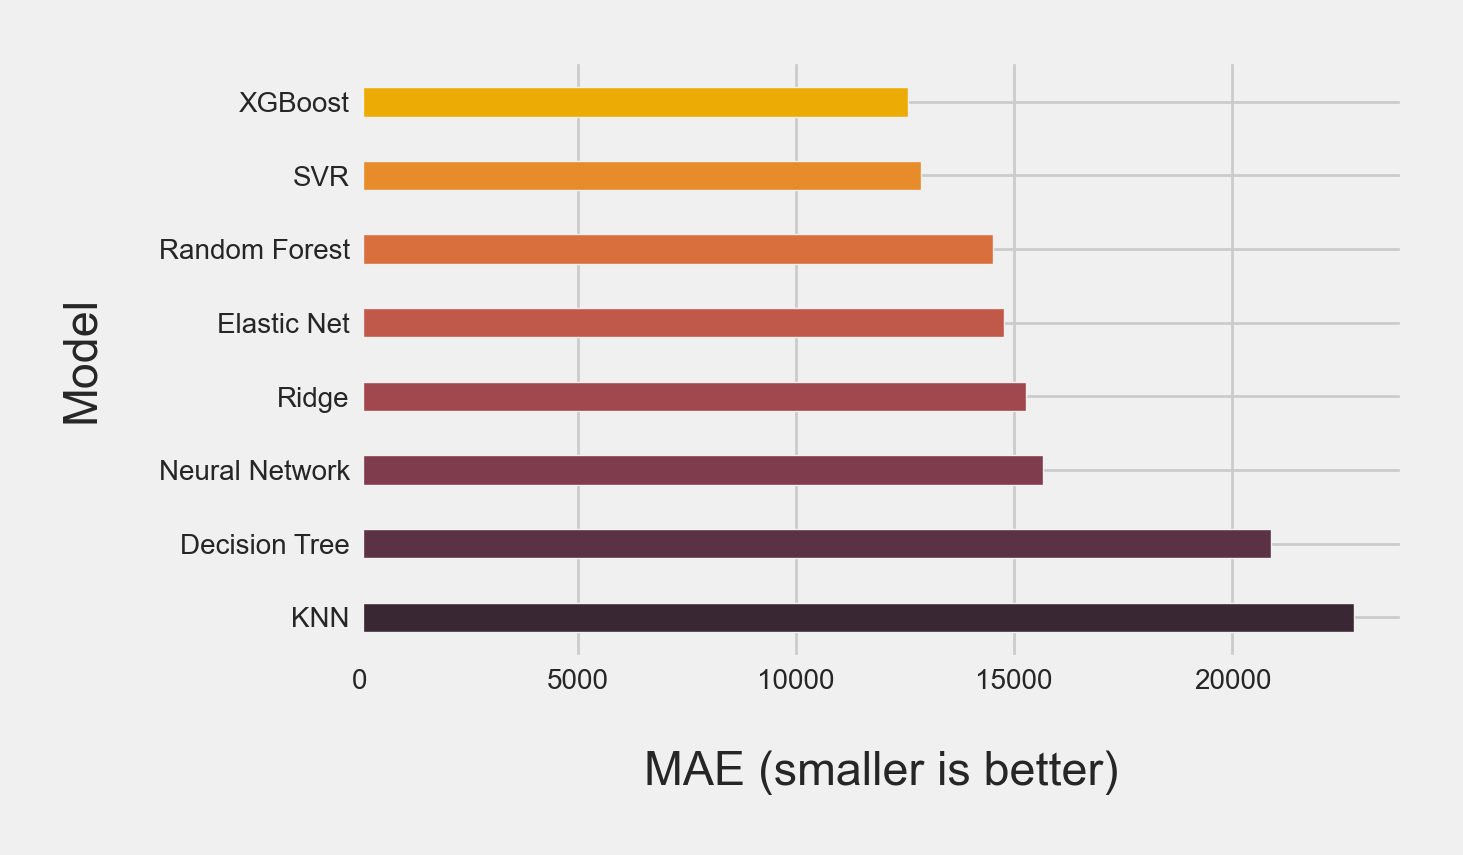

In [102]:
x = ['KNN', 'Decision Tree', 'Neural Network', 'Ridge', 
     'Elastic Net', 'Random Forest', 'SVR', 'XGBoost']
y = [22780.14, 20873.95, 15656.38, 15270.46, 14767.91,
     14506.46, 12874.93, 12556.68]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

Bằng cách nhìn vào bảng và biểu đồ, chúng ta có thể thấy rằng mô hình XGBoost có MAE nhỏ nhất, `12556,68`, tiếp theo là mô hình Hồi quy Vector hỗ trợ với sai số lớn hơn một chút là `12974,93`. Sau đó, các mô hình Rừng ngẫu nhiên và Lưới đàn hồi cũng mắc lỗi tương tự: lần lượt là `14506.46` và `14767.91`. Sau đó đến các mô hình Ridge và Neural Network có lỗi gần tương ứng: `15270.46` và `15656.38`. Sau đó là mô hình Cây Quyết định với MAE là `20873.95` và cuối cùng là mô hình K-Nearest Neighbors có lỗi `22780.14`.

Vì vậy, trong thử nghiệm của Nhóm, mô hình tốt nhất là XGBoost và mô hình tệ nhất là K-Nearest Neighbors. Chúng ta có thể thấy rằng sự khác biệt về MAE giữa mô hình tốt nhất và mô hình kém nhất là rất đáng kể; mô hình tốt nhất có gần một nửa sai số của mô hình tồi nhất.

## Đánh giá Hiệu Suất

Chúng tôi đã chọn sai số tuyệt đối trung bình (MAE) làm thước đo hiệu suất để đánh giá và so sánh các mô hình. MAE trình bày một giá trị dễ hiểu; nó hiển thị giá trị trung bình của lỗi mô hình. Ví dụ: đối với mô hình XGBoost của chúng tôi, MAE của nó là `12556,68`, nghĩa là trung bình, XGBoost sẽ dự đoán một giá trị lớn hơn hoặc nhỏ hơn giá trị thực bằng `12556,68`. Bây giờ để hiểu MAE này tốt như thế nào, chúng ta cần biết phạm vi và phân bổ dữ liệu. Trong trường hợp của chúng tôi, chúng tôi cần xem các giá trị của biến mục tiêu `SalePrice` chứa giá nhà thực tế. Hãy xem biểu đồ violin, biểu đồ hình hộp và biểu đồ của `SalePrice` trong tập dữ liệu của chúng tôi:

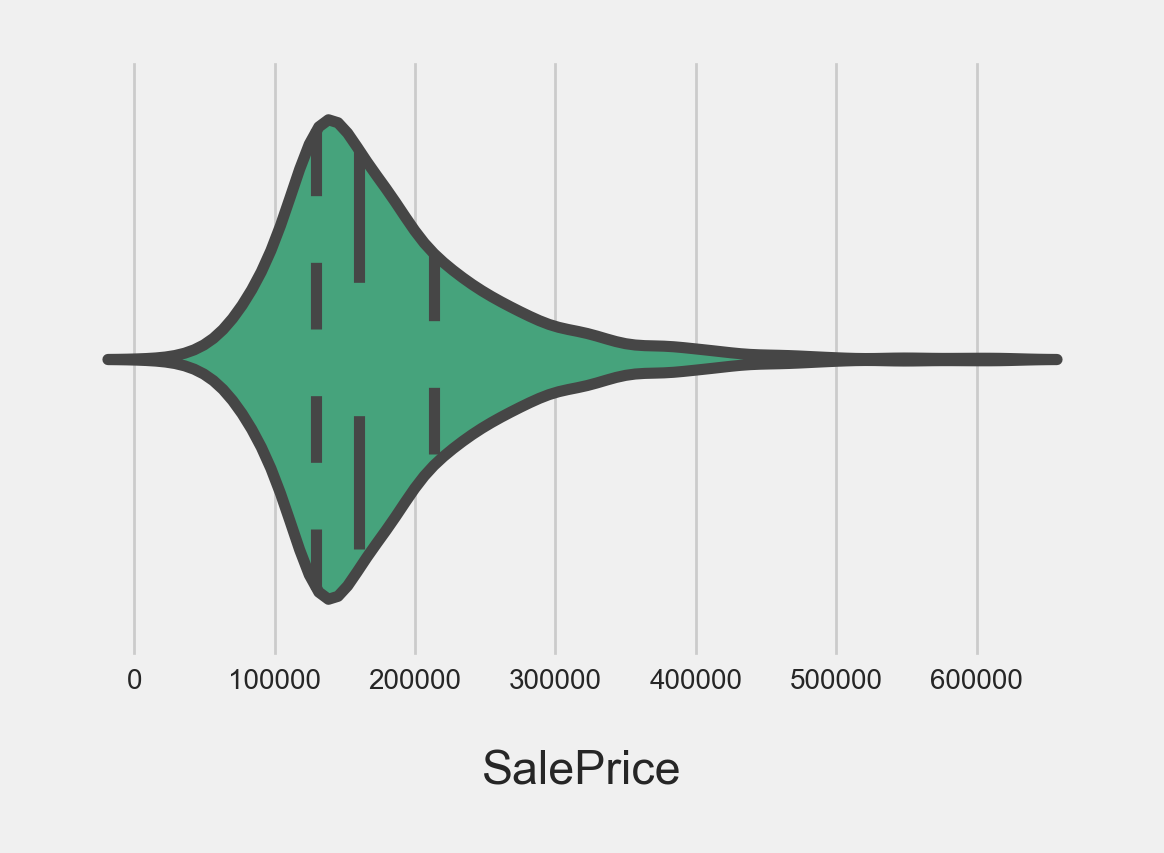

In [103]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

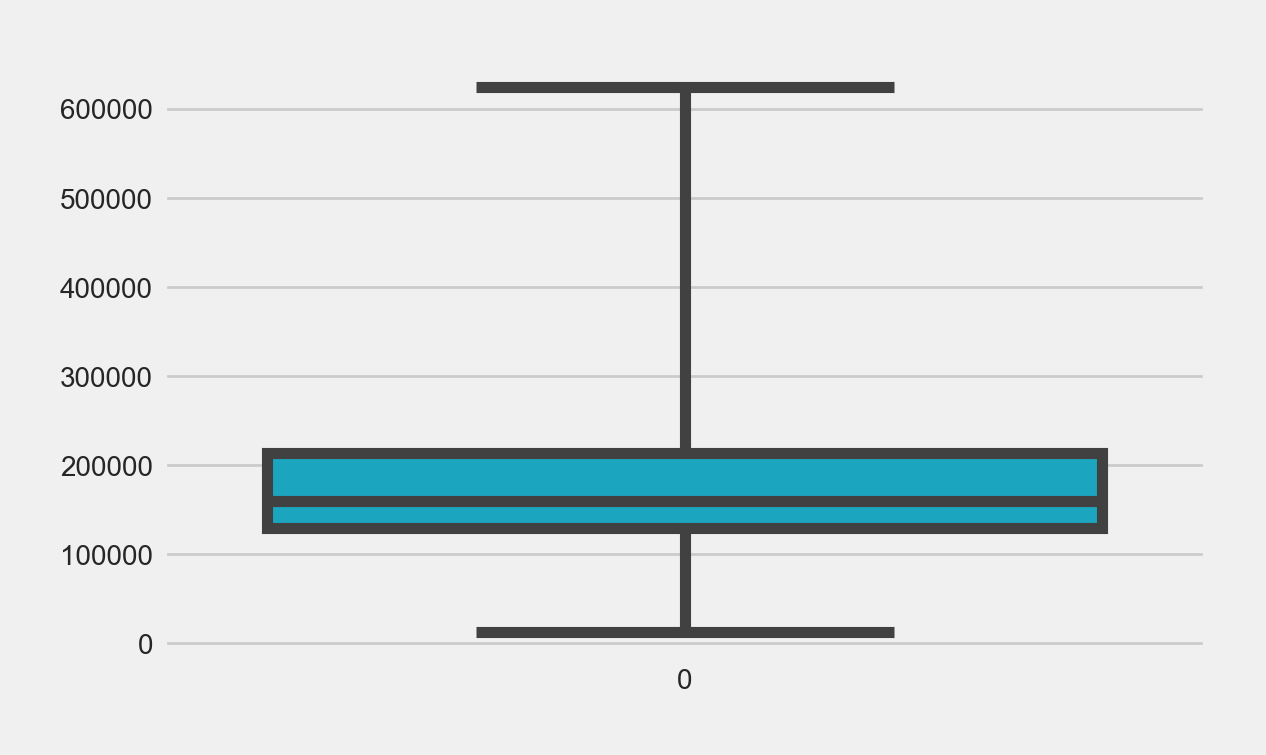

In [104]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

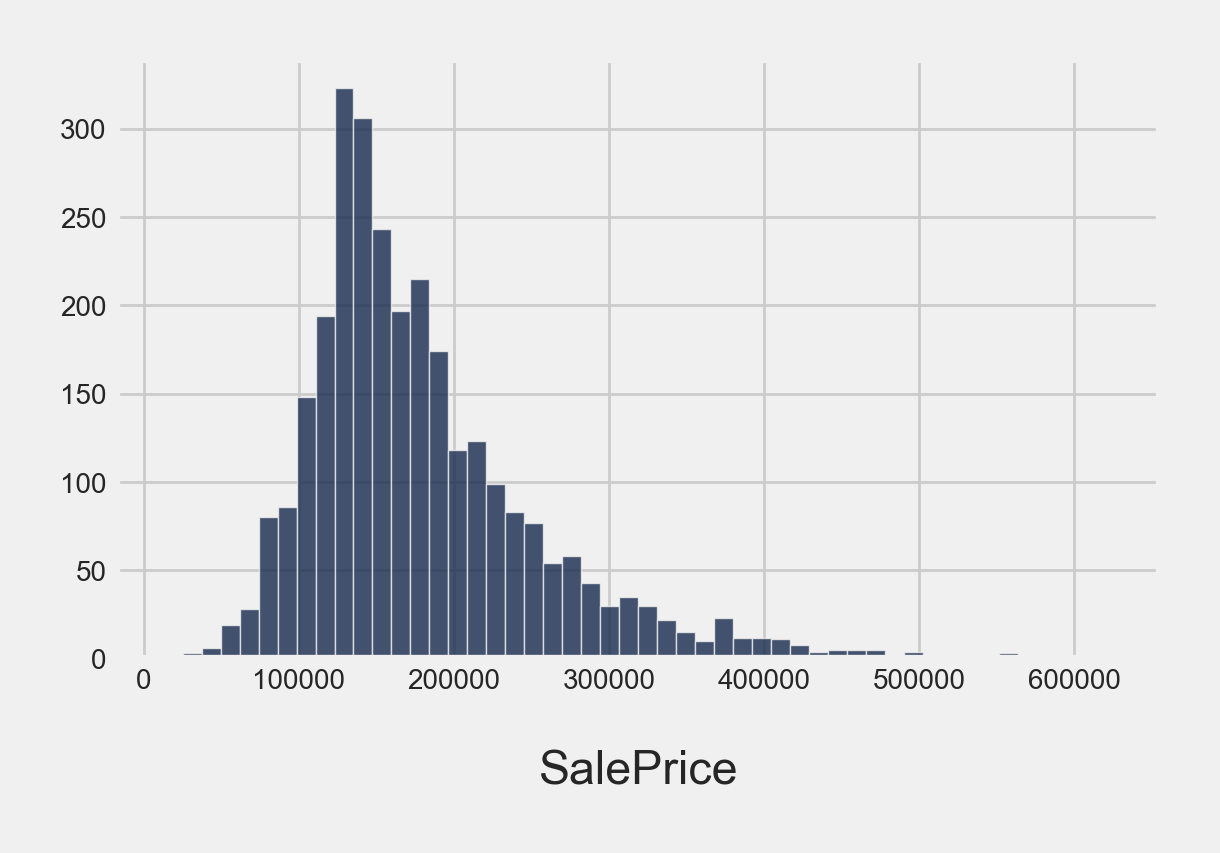

In [105]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});

Từ ba ô trên, chúng ta có thể hiểu được sự phân bổ của `SalePrice`. Bây giờ chúng ta hãy lấy một số thông tin thống kê bằng số về nó:

In [106]:
y_train.describe(include=[np.number])

SalePrice
count              2193.00
mean             179846.69
std               79729.38
min               12789.00
25%              128500.00
50%              159895.00
75%              214000.00
max              625000.00

Chúng ta có thể thấy rằng giá trị trung bình là `179.846,69` và trung vị là `159.895`. Chúng ta cũng có thể thấy rằng tứ phân vị đầu tiên là `128.500`; điều này có nghĩa là 75% dữ liệu lớn hơn con số này. Bây giờ nhìn vào lỗi XGBoost là `12.556,68`, chúng ta có thể nói rằng lỗi khoảng `12.000` là phù hợp với dữ liệu có giá trị trung bình là `159.895` và có 75% trong số đó lớn hơn `128.500`.

## Các thuộc tính quan trọng

Một số mô hình chúng tôi sử dụng cung cấp khả năng xem tầm quan trọng của từng tính năng trong tập dữ liệu sau khi khớp mô hình. Chúng ta sẽ xem xét tầm quan trọng của tính năng được cung cấp bởi cả hai mô hình XGBoost và Random Forest. Có 242 tính năng trong dữ liệu của mình, đây là một con số lớn, vì vậy chúng tôi sẽ xem xét 15 tính năng quan trọng nhất.

### XGBoost

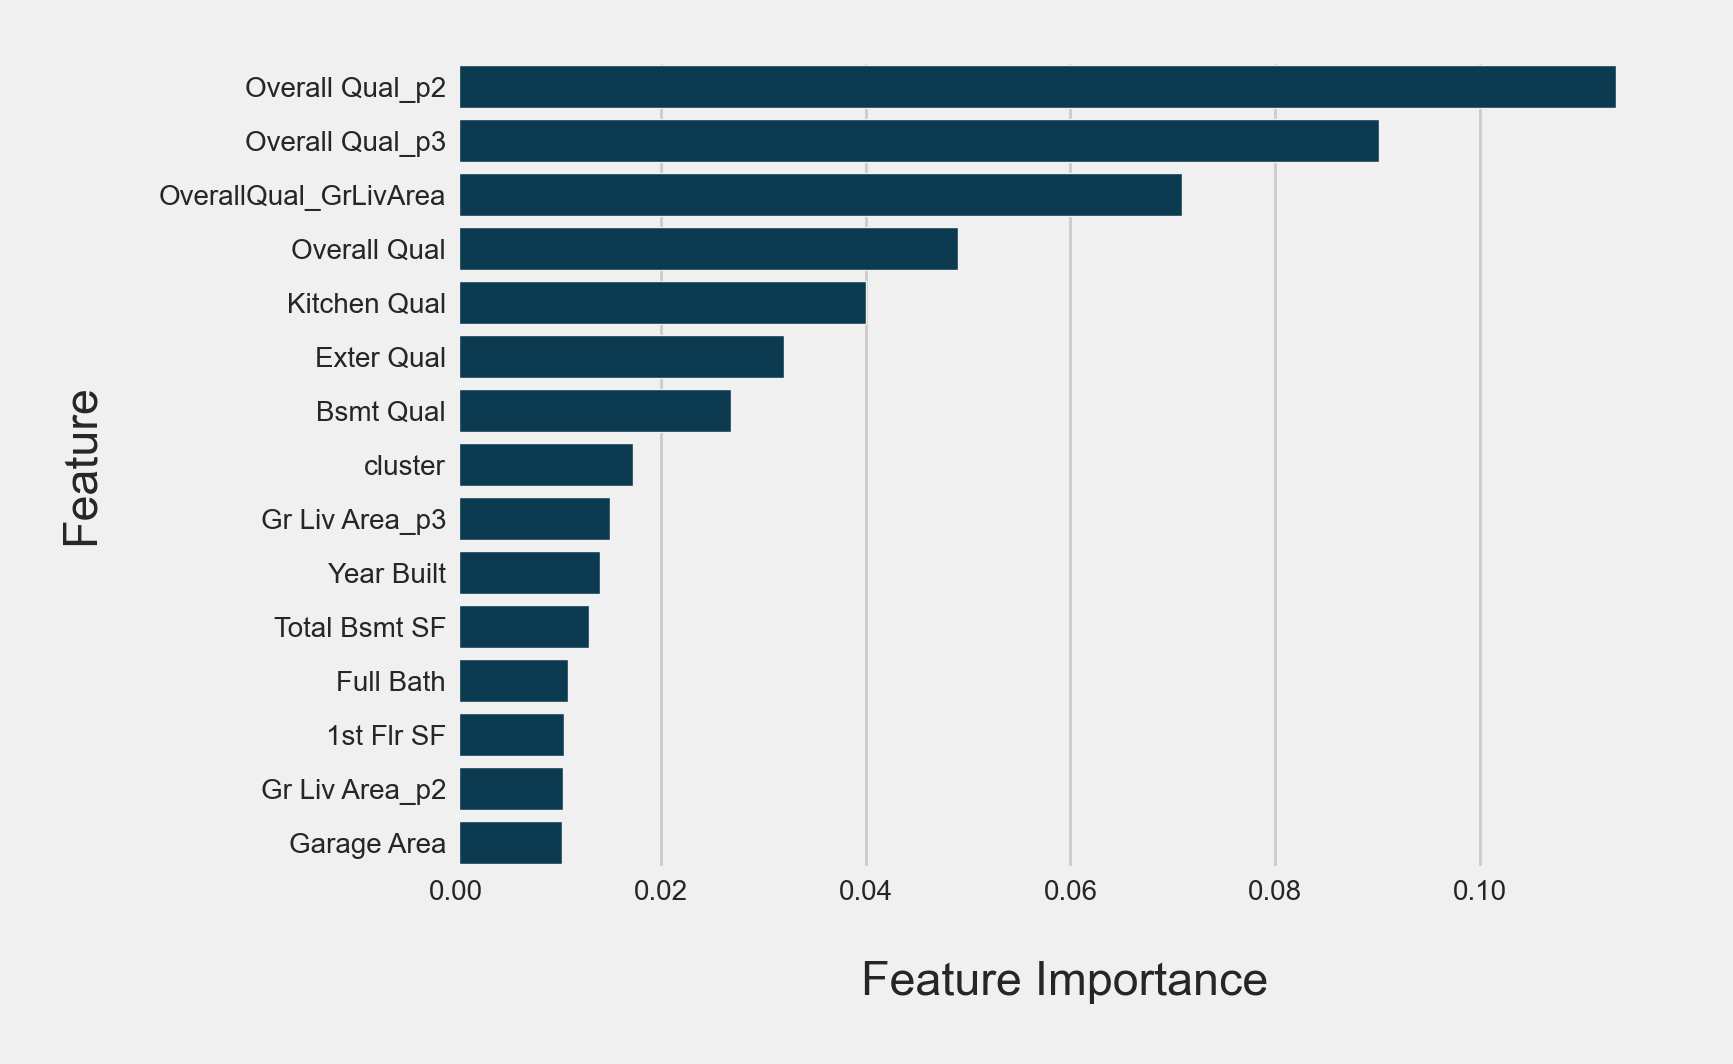

In [107]:
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances, 
            y=xgb_feature_importances.index, 
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

### Random Forest



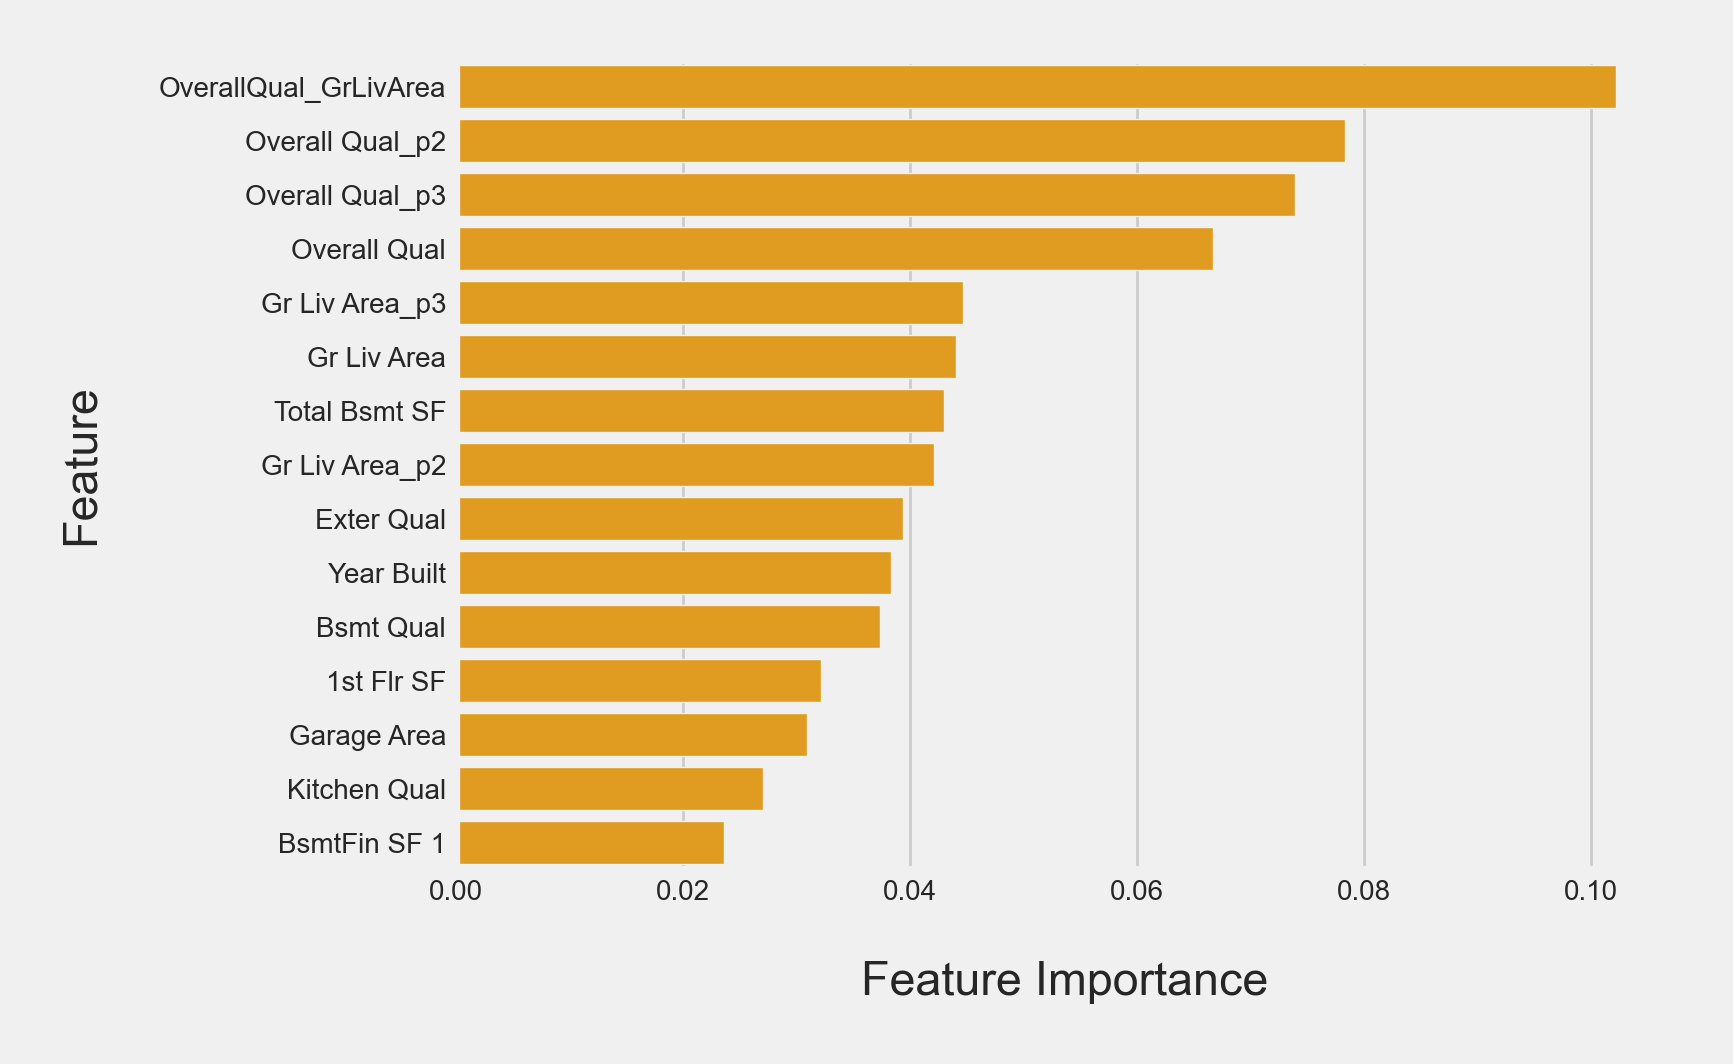

In [108]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

### Tính năng quan trọng Chung

Bây giờ, chúng ta hãy xem những tính năng nào là một trong những tính năng quan trọng nhất đối với cả hai mô hình XGBoost và Random Forest, đồng thời hãy tìm hiểu sự khác biệt về tầm quan trọng của chúng đối với hai mô hình:

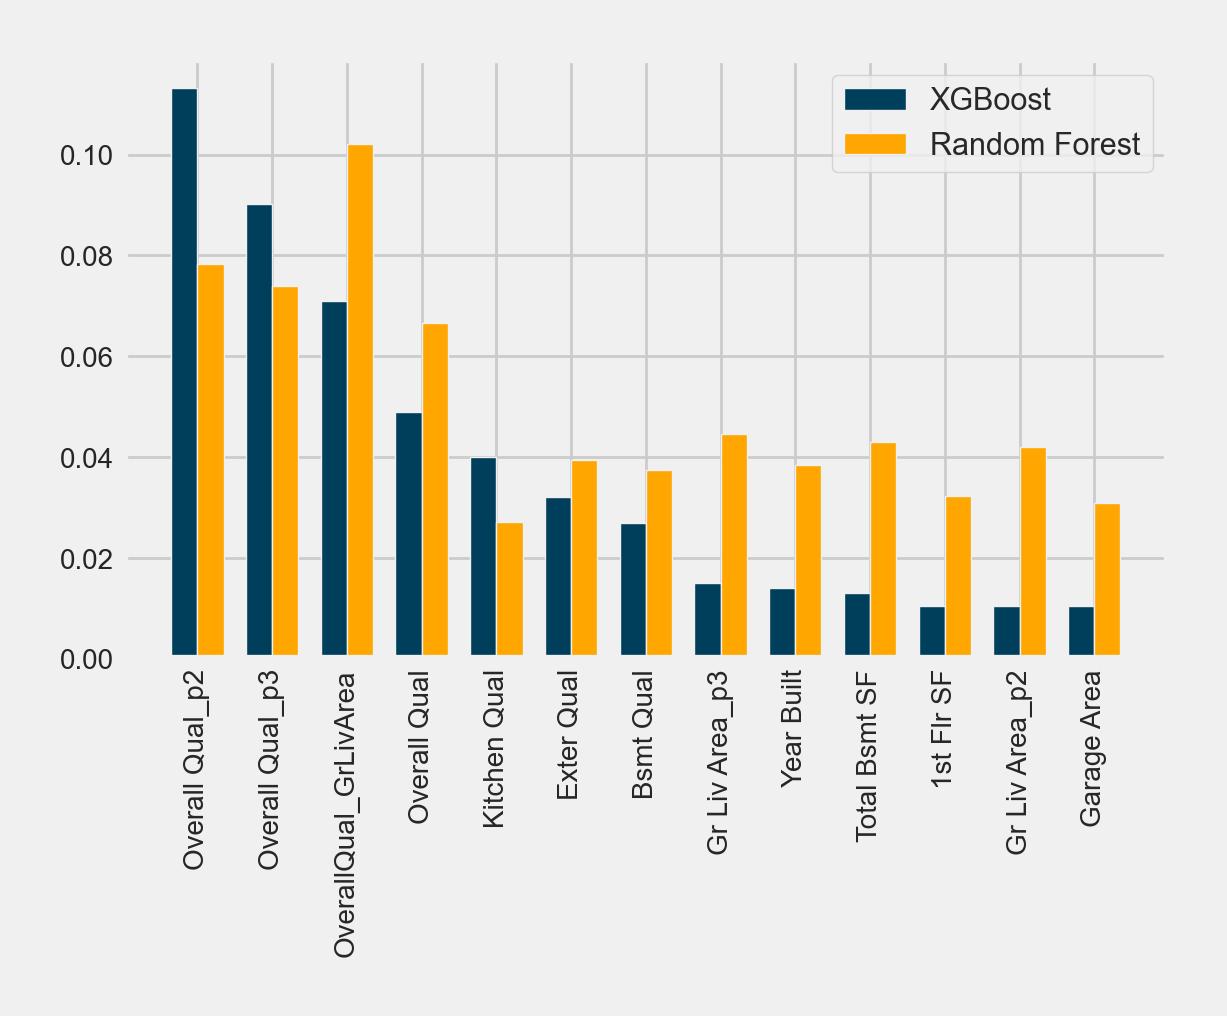

In [109]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rf_feature_importances.index]
commImpFeat_xgb_scores = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rf_scores = [rf_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
       color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width, 
       color='#ffa600', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);

### Kết Luận

Trong bài báo này, chúng tôi đã xây dựng các mô hình dự đoán giá nhà và so sánh chúng để tìm ra mô hình hiệu quả nhất. Chúng tôi cũng xác định các tính năng quan trọng nhất để mô hình có thể đưa ra ước tính giá nhà chính xác hơn. Chúng tôi khuyên người mua nhà trong khu vực có dữ liệu nên sử dụng mô hình của chúng tôi để đánh giá giá nhà thực tế và cân nhắc các tính năng quan trọng nhất để tăng độ chính xác của ước tính.

Theo khuyến nghị, chúng tôi khuyên những người muốn mua nhà trong khu vực được bao phủ bởi tập dữ liệu nên sử dụng mô hình này (hoặc một phiên bản của nó được đào tạo với dữ liệu gần đây hơn) để biết về giá thực tế. Mô hình này cũng có thể được sử dụng với các bộ dữ liệu bao gồm các thành phố và khu vực khác nhau miễn là chúng có cùng các tính năng. Chúng tôi cũng khuyên mọi người nên cân nhắc các tính năng được coi là quan trọng nhất như đã thấy trong phần trước; điều này có thể giúp họ ước tính giá nhà tốt hơn.
viết lại ngắn gọn dễ hiểu
